---
---

#**EXAMEN TRANSVERSAL MINERIA DE DATOS: WeatherAUS**


<img src='https://images.unsplash.com/photo-1523482580672-f109ba8cb9be?q=80&w=1000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Mnx8YXVzdHJhbGlhfGVufDB8fDB8fHww' width=75%>

#Augusto Alonso

---
---



#**ETAPA I: COMPRENSIÓN DEL NEGOCIO**

##**Contexto del caso:**






---


##**Diccionario de variables:**

* Fecha: Fecha de la observación.
* Ubicacion: Ubicación de la estación meteorológica.
* MinTemp: Temperatura mínima en grados Celsius.
* MaxTemp: Temperatura máxima en grados Celsius.
* Lluvia: Cantidad de lluvia registrada ese día en milímetros.
* Evaporacion: Evaporación en milímetros durante las 24 horas.
* Sol: Número de horas de sol brillante en el día.
* DirRafaga: Dirección de la ráfaga de viento más fuerte en 24 horas.
* VelRafaga: Velocidad en km/h de la ráfaga de viento más fuerte en 24 horas.
* Dir9am: Dirección del viento a las 9am.
* Dir3pm: Dirección del viento a las 3pm.
* Vel9am: Velocidad en km/h del viento a las 9am.
* Vel3pm: Velocidad en km/h del viento a las 3pm.
* Hum9am: Porcentaje de humedad a las 9am.
* Hum3pm: Porcentaje de humedad a las 3pm.
* Pres9am: Presión atmosférica a nivel del mar a las 9am en hPa.
* Pre3pm: Presión atmosférica a nivel del mar a las 3pm en hPa.
* Nub9am: Fracción del cielo cubierto por nubes a las 9am (medido en octavos).
* Nub3pm: Fracción del cielo cubierto por nubes a las 3pm (medido en octavos).
* Temp9am: Temperatura en grados Celsius a las 9am.
* Temp3pm: Temperatura en grados Celsius a las 3pm.
* LluviaHoy: Indicador si la precipitación en las últimas 24 horas excede 1 mm (1 si sí, 0 si no).
* RISK_MM: La cantidad de lluvia en milímetros, medida de "riesgo".
* LluviaMan: Indicador si al día siguiente llovió (1 si sí, 0 si no).


---





---


##Clasificación de Variables del Dataset



###Variables Cualitativas (Categóricas):

* Date - Fecha de la observación. (Aunque es una fecha, a menudo se maneja como categórica en  análisis temporales).
* Location - Ubicación de la estación meteorológica.
* WindGustDir - Dirección de la ráfaga de viento más fuerte en 24 horas.
* WindDir9am - Dirección del viento a las 9am.
* WindDir3pm - Dirección del viento a las 3pm.
* RainToday - Indicador si la precipitación en las últimas 24 horas excede 1 mm (categórico; Sí/No).
* RainTomorrow - Indicador si al día siguiente llovió (categórico; Sí/No).
###Variables Cuantitativas (Numéricas):

* MinTemp - Temperatura mínima en grados Celsius.
* MaxTemp - Temperatura máxima en grados Celsius.
* Rainfall - Cantidad de lluvia registrada ese día en milímetros.
* Evaporation - Evaporación en milímetros durante las 24 horas.
* Sunshine - Número de horas de sol brillante en el día.
* WindGustSpeed - Velocidad en km/h de la ráfaga de viento más fuerte en 24 horas.
* WindSpeed9am - Velocidad en km/h del viento a las 9am.
* WindSpeed3pm - Velocidad en km/h del viento a las 3pm.
* Humidity9am - Porcentaje de humedad a las 9am.
* Humidity3pm - Porcentaje de humedad a las 3pm.
* Pressure9am - Presión atmosférica a nivel del mar a las 9am en hPa.
* Pressure3pm - Presión atmosférica a nivel del mar a las 3pm en hPa.
* Cloud9am - Fracción del cielo cubierto por nubes a las 9am (medido en octavos).
* Cloud3pm - Fracción del cielo cubierto por nubes a las 3pm (medido en octavos).
* Temp9am - Temperatura en grados Celsius a las 9am.
* Temp3pm - Temperatura en grados Celsius a las 3pm.
* RISK_MM - La cantidad de lluvia en milímetros, medida de "riesgo".







---






---


##**Objetivos para un Notebook Jupyter**
1. **Predicción de Maximas Temperaturas, y prediccion de dias de lluvia al dia siguiente (Foco en Machine Learning)
Objetivo:**El objetivo es construir un modelo de regresión que pueda predecir la temperatura máxima diaria (MaxTemp) en función de varias características meteorológicas.

  **Selección de Características (Features)**
- Las características relevantes que podemos usar para predecir la temperatura máxima diaria incluyen:

  - Humedad: Humidity9am y Humidity3pm
  - Velocidad del viento: WindSpeed9am, WindSpeed3pm, WindGustSpeed
  - Presión atmosférica: Pressure9am, Pressure3pm
  - Temperatura previa: MinTemp, Temp9am

  Otras posibles características: Sunshine, Cloud9am, Cloud3pm, Rainfall

2. **Segmentación y Etiquetado de Condiciones Climáticas Extremas (Foco en Clustering y Etiquetado)
Objetivo:** Identificar y etiquetar días con condiciones climáticas extremas, como altas temperaturas, vientos fuertes o alta precipitación, que pueden indicar riesgos de fenómenos naturales como incendios forestales o inundaciones.

  **Variables Clave:**

  - **Input Variables:** 'MaxTemp', 'WindGustSpeed', 'Rainfall', 'Pressure9am', 'Humidity3pm'.

##**Objetivos descartados a evaluar a futuro**
1. **Impacto climatico en zonas urbanas**
Se dejo de lado debido a la incertidumbre de si las variables con las que cuenta este dataset sirvan realmente para este objetivo.
su reincorporacion en el proyecto se evaluara al momento de la creacion de los modelos predictivos.
---



#**ETAPA II: COMPRENSIÓN DE LOS DATOS**

**Pre-procesamiento**

✅ Importar librerías básicas

In [ ]:
#Librerías de Python

import numpy as np #Programación vectorial
import pandas as pd #Estructura y manipulación de datos
import matplotlib.pyplot as plt #Visualización

import seaborn as sb #Gráficos
from seaborn import kdeplot
from seaborn import lmplot
from seaborn import boxplot

import warnings #Advertencias
warnings.filterwarnings('ignore')

✅ Cargar archivo

In [ ]:
from google.colab import files #Importar archivo
uploaded = files.upload()

for fn in uploaded.keys():
    name=fn
data = pd.read_csv(name, sep=",")

Saving weatherAUS.csv to weatherAUS.csv


##**1. Exploración inicial**

Primero revisamos cuantos registros (filas) y cuántas variables (columnas) tiene el set de datos:

In [ ]:
#Cantidad de filas x cantidad de columnas
print(data.shape)

(142193, 24)


Revisamos los nombres de las variables, es decir, de cada columna:

In [ ]:
list(data.columns.values)

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RISK_MM',
 'RainTomorrow']

Visualización del dataset:

In [ ]:
#Primeros registros
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8.0       NaN     16.9     21.8         No      0.0   
1       1007.8       NaN       NaN     17.2     24.3         No      0.0   
2       1008.7       NaN       2.0     21.0     23.2         No      0.0   
3       1012.8       NaN       NaN     18.1     26.5         No      1.0   
4       1006.0       7.0       8.0     17.8     29.7         No      0.2   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 24 columns]

In [ ]:
#Ultimos registros
data.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
142188  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
142189  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
142190  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
142191  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
142192  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
142188       NaN           E           31.0        ESE  ...        27.0   
142189       NaN           E           31.0         SE  ...        24.0   
142190       NaN         NNW           22.0         SE  ...        21.0   
142191       NaN           N           37.0         SE  ...        24.0   
142192       NaN          SE           28.0        SSE  ...        24.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
142188       1024.7       1021.2       NaN       NaN      9.4     20.9   
142189       1024.6       1020.3       NaN       NaN     10.1     22.4   
142190       1023.5       1019.1       NaN       NaN     10.9     24.5   
142191       1021.0       1016.8       NaN       NaN     12.5     26.1   
142192       1019.4       1016.5       3.0       2.0     15.1     26.0   

        RainToday  RISK_MM  RainTomorrow  
142188         No      0.0            No  
142189         No      0.0            No  
142190         No      0.0            No  
142191         No      0.0            No  
142192         No      0.0            No  

[5 rows x 24 columns]

In [ ]:
#Registro aleatorio
data.sample(5)

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
77474   2013-12-18      Watsonia     12.8     28.8       0.0          5.6   
124601  2011-02-17       Walpole     17.6     21.5       0.0          NaN   
12825   2011-09-03         Moree      8.3     23.3       0.0          4.6   
105445  2016-01-10       Woomera     25.3     41.1       0.0         14.2   
135820  2017-03-13  AliceSprings     18.8     35.1       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
77474        9.8          SW           48.0          E  ...        46.0   
124601       NaN         ESE           39.0          E  ...        77.0   
12825       11.0           E           33.0          E  ...        34.0   
105445       4.7         NNW           44.0        NNE  ...         6.0   
135820       NaN         ESE           33.0        ESE  ...        18.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
77474        1022.6       1018.4       8.0       1.0     14.7     28.2   
124601       1015.1       1012.2       NaN       NaN     19.3     20.9   
12825        1028.9       1024.1       0.0       4.0     15.1     22.7   
105445       1014.8       1012.4       4.0       5.0     30.9     39.2   
135820       1012.4       1008.6       2.0       NaN     25.0     33.1   

        RainToday  RISK_MM  RainTomorrow  
77474          No      0.0            No  
124601         No      0.0            No  
12825          No      0.0            No  
105445         No      0.0            No  
135820         No      0.0            No  

[5 rows x 24 columns]

Transformamos el set de datos en un `dataframe` de Pandas para poder realizar modificaciones a los datos:

In [ ]:
#Transformacion a Data Frame
df = pd.DataFrame(data)

In [ ]:
list(df.columns.values)

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RISK_MM',
 'RainTomorrow']

In [ ]:
#Primeros registros
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8.0       NaN     16.9     21.8         No      0.0   
1       1007.8       NaN       NaN     17.2     24.3         No      0.0   
2       1008.7       NaN       2.0     21.0     23.2         No      0.0   
3       1012.8       NaN       NaN     18.1     26.5         No      1.0   
4       1006.0       7.0       8.0     17.8     29.7         No      0.2   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 24 columns]

Inspeccionamos el tipo de variable:

In [ ]:
#Tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

**Variables de Tipo object** (Categóricas o Textuales)
* Date: Fecha de la observación.
* Location: Ubicación de la estación meteorológica.
* WindGustDir: Dirección de la ráfaga de viento más fuerte en 24 horas.
* WindDir9am: Dirección del viento a las 9am.
* WindDir3pm: Dirección del viento a las 3pm.
* RainToday: Indicador si la precipitación en las últimas 24 horas excede 1 mm (Sí/No).
* RainTomorrow: Indicador si al día siguiente llovió (Sí/No).

**Variables de Tipo float64** (Numéricas)

* MinTemp: Temperatura mínima en grados Celsius.
* MaxTemp: Temperatura máxima en grados Celsius.
* Rainfall: Cantidad de lluvia registrada ese día en milímetros.
* Evaporation: Evaporación en milímetros durante las 24 horas.
* Sunshine: Número de horas de sol brillante en el día.
* WindGustSpeed: Velocidad en km/h de la ráfaga de viento más fuerte en 24 horas.
* WindSpeed9am: Velocidad en km/h del viento a las 9am.
* WindSpeed3pm: Velocidad en km/h del viento a las 3pm.
* Humidity9am: Porcentaje de humedad a las 9am.
* Humidity3pm: Porcentaje de humedad a las 3pm.
* Pressure9am: Presión atmosférica a nivel del mar a las 9am en hPa.
* Pressure3pm: Presión atmosférica a nivel del mar a las 3pm en hPa.
* Cloud9am: Fracción del cielo cubierto por nubes a las 9am (medido en octavos).
* Cloud3pm: Fracción del cielo cubierto por nubes a las 3pm (medido en octavos).
* Temp9am: Temperatura en grados Celsius a las 9am.
* Temp3pm: Temperatura en grados Celsius a las 3pm.
* RISK_MM: La cantidad de lluvia en milímetros, medida de "riesgo".



---



##**2. Análisis Estadístico**

####**2.1. Variables Numéricas**

Resumen estadístico de las variables numéricas:

In [ ]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.000000      13.000000   
50%        8.500000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140419.000000  138583.000000  128179.000000  128212.000000   
mean       68.843810      51.482606    1017.653758    1015.258204   
std        19.051293      20.797772       7.105476       7.036677   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1012.900000    1010.400000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm        RISK_MM  
count  88536.000000  85099.000000  141289.000000  139467.000000  142193.000000  
mean       4.437189      4.503167      16.987509      21.687235       2.360682  
std        2.887016      2.720633       6.492838       6.937594       8.477969  
min        0.000000      0.000000      -7.200000      -5.400000       0.000000  
25%        1.000000      2.000000      12.300000      16.600000       0.000000  
50%        5.000000      5.000000      16.700000      21.100000       0.000000  
75%        7.000000      7.000000      21.600000      26.400000       0.800000  
max        9.000000      9.000000      40.200000      46.700000     371.000000

A pesar de que todos los datos sean numeros, debido a que fueron registrados como otro tipo de datos no aparecen, sin embargo se graficara las variables mas relevantes para el caso y algunas mas para dar mas contexto de la situacion.

Distribución de las variables numéricas:

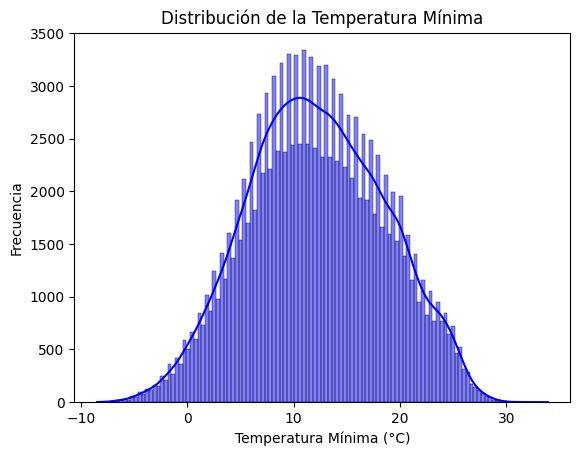

In [ ]:
# Histograma para MinTemp
sb.histplot(data['MinTemp'], color='blue', kde=True)
plt.title('Distribución de la Temperatura Mínima')
plt.xlabel('Temperatura Mínima (°C)')
plt.ylabel('Frecuencia')
plt.show()

El gráfico que analizamos muestra la distribución de las temperaturas mínimas diarias, aproximadamente centrada alrededor de los 10°C y extendiéndose desde cerca de -5°C hasta más de 20°C. Esta distribución, que parece seguir una distribución normal, refleja una variabilidad significativa en las condiciones nocturnas, indicativa de diferencias estacionales o geográficas. Las temperaturas bajo cero sugieren noches frías que pueden impactar la agricultura, mientras que las temperaturas superiores a 20°C se asocian con noches tropicales o calurosas que afectan el consumo de energía y la salud pública. La comprensión de estos patrones es crucial para el pronóstico meteorológico y puede ayudar en estudios climáticos más amplios, particularmente en investigaciones sobre el cambio climático.

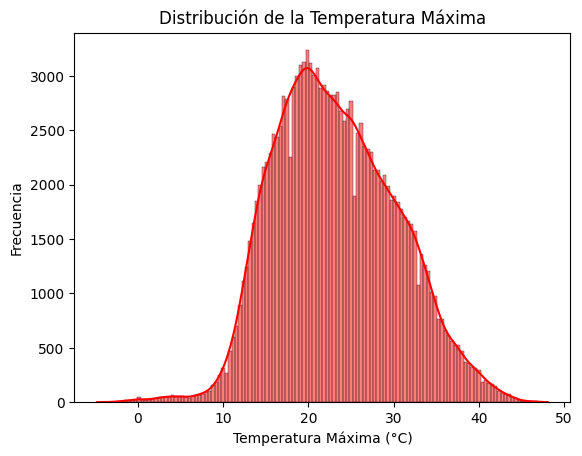

In [ ]:
# Histograma para MaxTemp
sb.histplot(data['MaxTemp'], color='red', kde=True)
plt.title('Distribución de la Temperatura Máxima')
plt.xlabel('Temperatura Máxima (°C)')
plt.ylabel('Frecuencia')
plt.show()

Este gráfico muestra la distribución de las temperaturas máximas diarias, que se concentra principalmente **alrededor de 20°C y se extiende hasta más de 40°C**, reflejando la variabilidad en las condiciones diurnas. La distribución sigue una curva aproximadamente normal, con la mayoría de los datos agrupados en un rango central y con extremos que sugieren días de calor intenso. Las temperaturas altas, especialmente aquellas que superan los 35°C, son críticas porque pueden llevar a condiciones de estrés térmico y tienen un impacto directo en la salud pública, la demanda de energía para refrigeración y la agricultura. Este análisis ayuda a comprender mejor la dinámica del clima local y regional, proporcionando información valiosa para la planificación de recursos y estrategias de mitigación frente a olas de calor, un aspecto esencial dado el contexto actual de cambio climático.

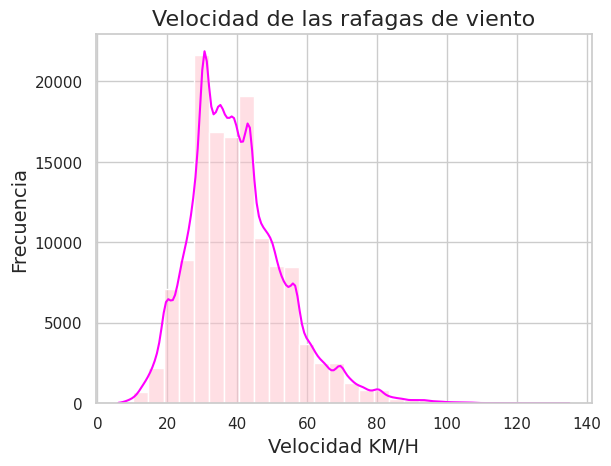

In [ ]:
# Establecer el estilo del gráfico
sb.set(style="whitegrid")

# Crear el histograma con función de densidad
sb.histplot(data['WindGustSpeed'], kde=True, color="pink", bins=30)

# Añadir títulos y etiquetas
plt.xlabel("Velocidad KM/H", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.title("Velocidad de las rafagas de viento", fontsize=16)

# Establecer el color de la línea de la función de densidad en un tono rosado más oscuro
plt.gca().get_lines()[0].set_color('magenta')

# Mostrar el gráfico
plt.show()

El gráfico muestra la distribución de las velocidades de ráfagas de viento, con una concentración principal alrededor de **40 km/h y una extensión hacia velocidades superiores a 100 km/h**, evidenciando una cola larga hacia las altas velocidades. Esto indica que, aunque las ráfagas extremadamente rápidas son menos frecuentes, son posibles y pueden tener impactos significativos, como daños a infraestructuras y desafíos para la planificación de emergencias. La comprensión de esta distribución es crucial para múltiples aplicaciones, incluyendo la optimización de la ubicación y diseño de turbinas eólicas, así como para ajustar normativas de construcción y estrategias de manejo agrícola y forestal frente a eventos de viento fuerte.








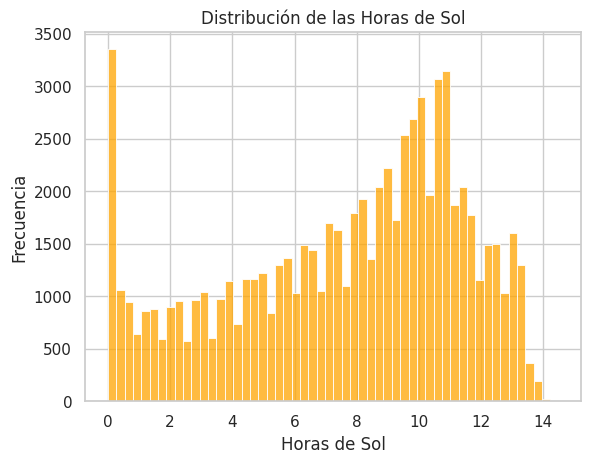

In [ ]:
# Histograma para Sunshine
sb.histplot(data['Sunshine'], color='orange', kde=False)
plt.title('Distribución de las Horas de Sol')
plt.xlabel('Horas de Sol')
plt.ylabel('Frecuencia')
plt.show()

El gráfico muestra la distribución de las horas de sol diarias, con una concentración notable de días que tienen entre 8 y 12 horas de sol, y un pico alrededor de las 10 horas. La forma de la distribución es asimétrica, con menos días registrando extremadamente pocas o muchas horas de sol. Este patrón puede indicar variaciones estacionales típicas o las características climáticas de la región observada. La comprensión de esta distribución es esencial para actividades que dependen de la luz solar, como la agricultura, la generación de energía solar, y la planificación turística, destacando la importancia de estas horas de sol en la planificación energética y ambiental.

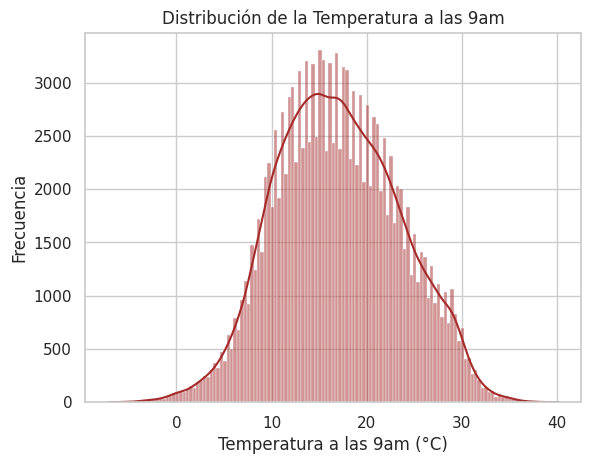

In [ ]:
# Histograma para Temp9am
sb.histplot(data['Temp9am'], color='brown', kde=True)
plt.title('Distribución de la Temperatura a las 9am')
plt.xlabel('Temperatura a las 9am (°C)')
plt.ylabel('Frecuencia')
plt.show()


El gráfico muestra la distribución de las temperaturas a las 9 am, destacando un pico claro alrededor de los 20°C y una distribución que sigue de cerca una curva normal. Esto indica que la temperatura más común a las 9 am en la región estudiada es alrededor de los 20°C, con variaciones que se extienden desde cerca de 0°C hasta alrededor de 40°C. La presencia de temperaturas más extremas es menos común, como lo muestra la forma de campana del gráfico. Este análisis es crucial para entender los patrones climáticos diurnos, permitiendo una mejor planificación para actividades dependientes de la temperatura matutina, como la agricultura, la construcción y el transporte, además de ser un dato valioso para estudios climáticos y meteorológicos.








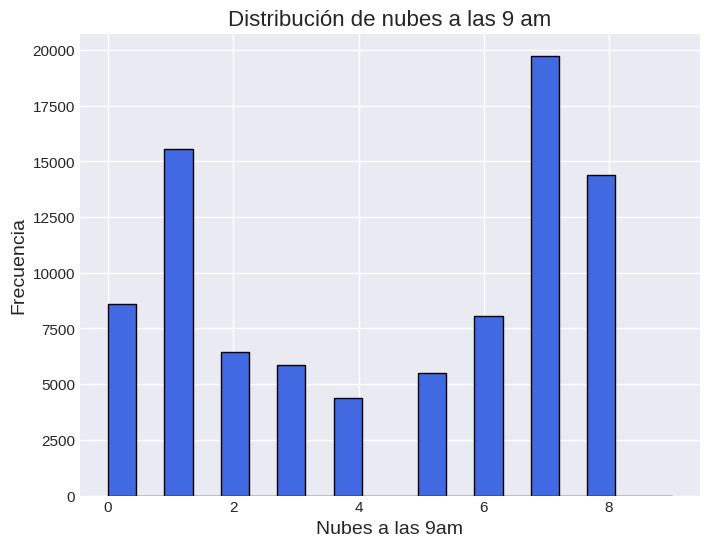

In [ ]:
# Establecer el estilo del gráfico
plt.style.use('seaborn-darkgrid')

# Crear el histograma
plt.figure(figsize=(8, 6))
plt.hist(x=df['Cloud9am'], bins=20, color='royalblue', edgecolor='black')

# Añadir títulos y etiquetas
plt.xlabel("Nubes a las 9am", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.title("Distribución de nubes a las 9 am", fontsize=16)

# Añadir líneas de cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()

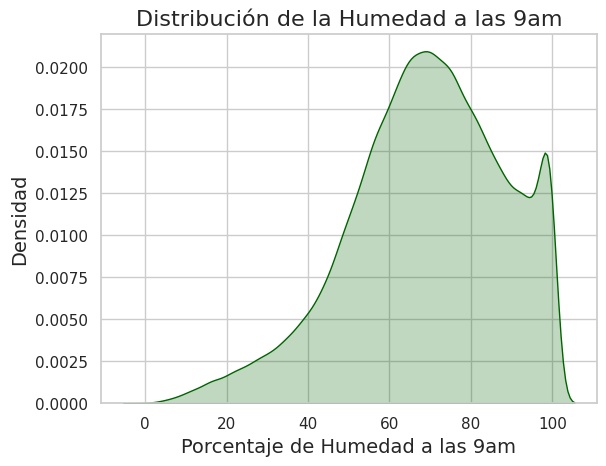

In [ ]:
# Establecer el estilo del gráfico
sb.set(style="whitegrid")

# Crear la función de densidad
sb.kdeplot(df['Humidity9am'], shade=True, color="darkgreen")

# Añadir títulos y etiquetas
plt.xlabel("Porcentaje de Humedad a las 9am", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.title("Distribución de la Humedad a las 9am", fontsize=16)

# Mostrar el gráfico
plt.show()


El gráfico muestra la distribución del porcentaje de humedad a las 9 am, con una forma bimodal significativa, indicando dos picos predominantes en torno al 60% y cerca del 100%. Esto sugiere variaciones notables en las condiciones de humedad matutina. Un pico cerca del 100% puede indicar días con neblina o rocío pesado, especialmente en áreas donde la saturación se alcanza fácilmente durante las mañanas. El otro pico alrededor del 60% representa condiciones más típicas y moderadamente húmedas. Esta distribución es esencial para entender las condiciones ambientales locales, influyendo en actividades como la agricultura y la planificación urbana, donde la humedad puede afectar desde el crecimiento de las plantas hasta el confort térmico urbano.

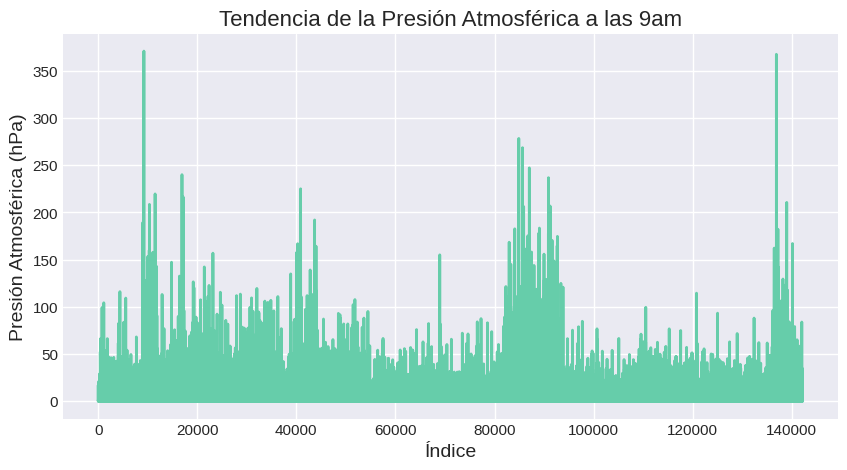

In [ ]:
# Establecer el estilo del gráfico
plt.style.use('seaborn-darkgrid')

# Crear el gráfico de líneas
data['RISK_MM'].plot(kind='line', figsize=(10, 5), color= '#66CDAA', linewidth=2, title='Presión Atmosférica a las 9am')

# Personalizar las etiquetas y el título
plt.xlabel("Índice", fontsize=14)  # Se mantiene "Índice" si los datos están indexados por fecha u otro indicador numérico
plt.ylabel("Presión Atmosférica (hPa)", fontsize=14)
plt.title("Tendencia de la Presión Atmosférica a las 9am", fontsize=16)

# Ocultar los bordes superior y derecho
plt.gca().spines[['top', 'right']].set_visible(False)

# Añadir líneas de cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()

####**2.2. Variables Categóricas**

Proporción de las clases de las variables categóricas:

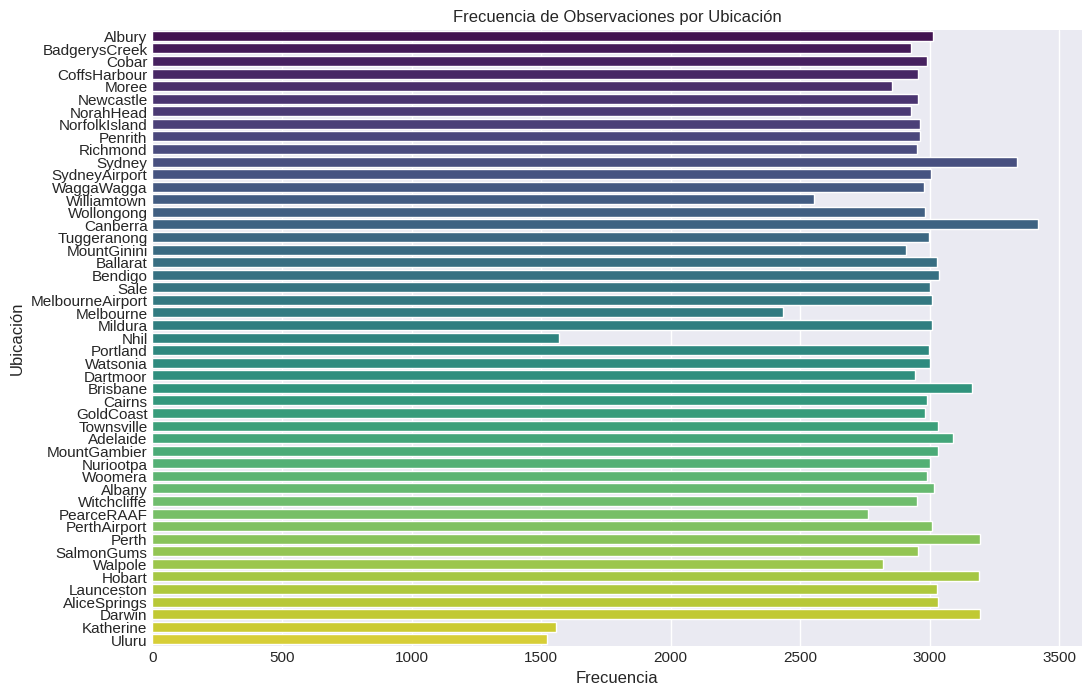

In [ ]:
# Gráfico de barras para Location
plt.figure(figsize=(12, 8))
sb.countplot(y='Location', data=data, palette='viridis')
plt.title('Frecuencia de Observaciones por Ubicación')
plt.xlabel('Frecuencia')
plt.ylabel('Ubicación')
plt.show()

In [ ]:
print(df.groupby('Location').size())

Location
Adelaide            3090
Albany              3016
Albury              3011
AliceSprings        3031
BadgerysCreek       2928
Ballarat            3028
Bendigo             3034
Brisbane            3161
Cairns              2988
Canberra            3418
Cobar               2988
CoffsHarbour        2953
Dartmoor            2943
Darwin              3192
GoldCoast           2980
Hobart              3188
Katherine           1559
Launceston          3028
Melbourne           2435
MelbourneAirport    3009
Mildura             3007
Moree               2854
MountGambier        3030
MountGinini         2907
Newcastle           2955
Nhil                1569
NorahHead           2929
NorfolkIsland       2964
Nuriootpa           3002
PearceRAAF          2762
Penrith             2964
Perth               3193
PerthAirport        3009
Portland            2996
Richmond            2951
Sale                3000
SalmonGums          2955
Sydney              3337
SydneyAirport       3005
Townsville      

  Ciudades con más registros:
  - Adelaide - 3090 registros
  - Brisbane - 3161 registros
  - Canberra - 3418 registros
  - Perth - 3193 registros
  - Sydney - 3337 registros
  
Ciudades con menos registros:
  - Katherine - 1559 registros
  - Nhulunbuy - 1569 registros
  - Walpole - 2819 registros
  - PearceRAAF - 2762 registros
  - Uluru - 1521 registros

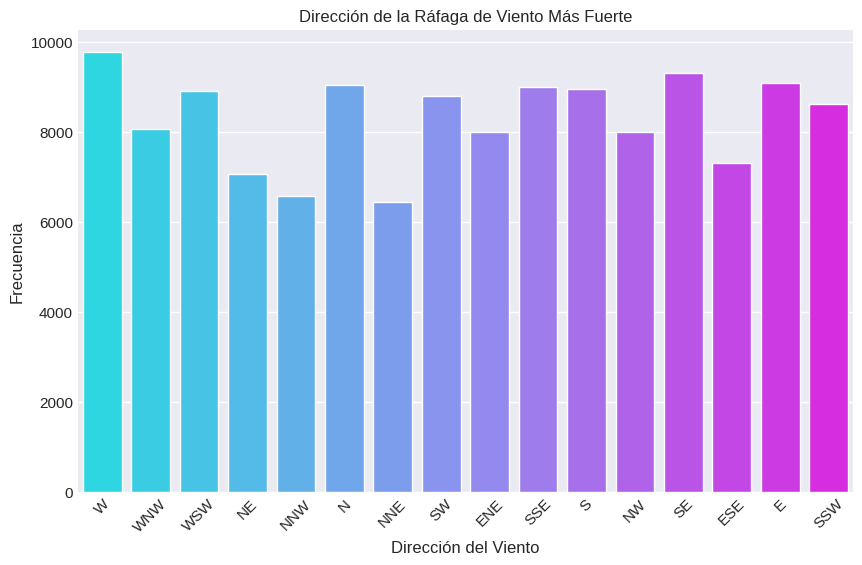

In [ ]:
# Gráfico de barras para WindGustDir
plt.figure(figsize=(10, 6))
sb.countplot(x='WindGustDir', data=data, palette='cool')
plt.title('Dirección de la Ráfaga de Viento Más Fuerte')
plt.xlabel('Dirección del Viento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar las etiquetas para mejor visualización
plt.show()


El gráfico muestra la distribución de la dirección de las ráfagas de viento más fuertes registradas. La dirección más común es el Oeste (W), seguida por Noroeste (WNW) y Norte (N). Las ráfagas de viento fuertes provienen de varias direcciones, con una mayor frecuencia desde el Oeste y el Norte, lo que puede estar relacionado con patrones climáticos predominantes en la región. Esta información es crucial para la planificación urbana, la construcción de infraestructuras resistentes al viento y la gestión de recursos naturales.

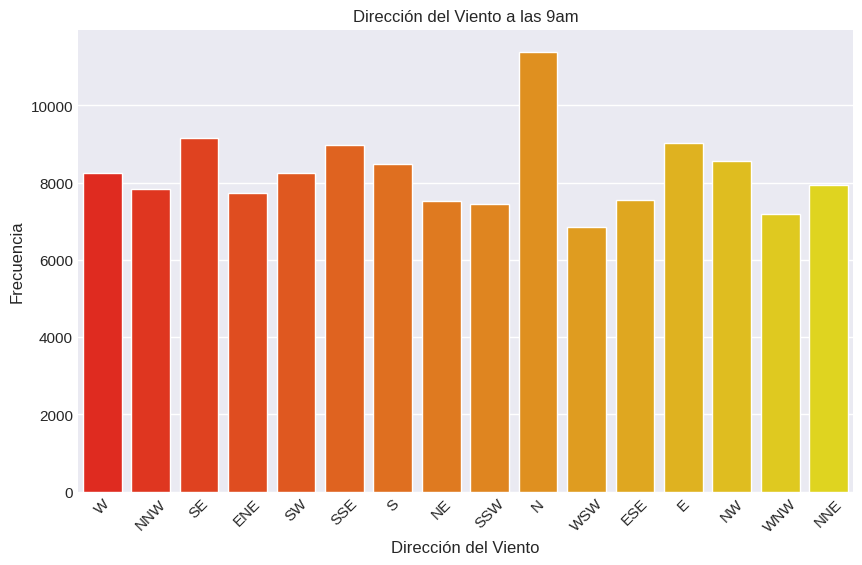

In [ ]:
# Gráfico de barras para WindDir9am
plt.figure(figsize=(10, 6))
sb.countplot(x='WindDir9am', data=data, palette='autumn')
plt.title('Dirección del Viento a las 9am')
plt.xlabel('Dirección del Viento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

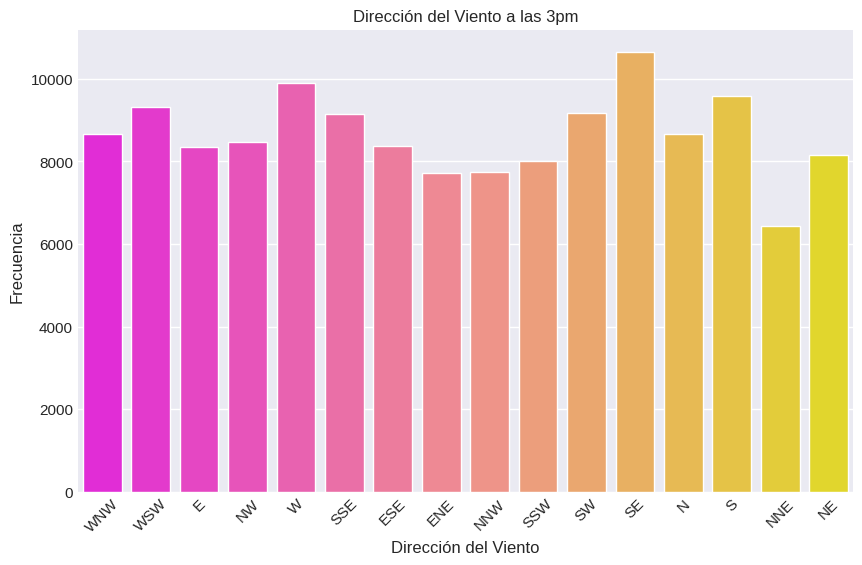

In [ ]:
# Gráfico de barras para WindDir3pm
plt.figure(figsize=(10, 6))
sb.countplot(x='WindDir3pm', data=data, palette='spring')
plt.title('Dirección del Viento a las 3pm')
plt.xlabel('Dirección del Viento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


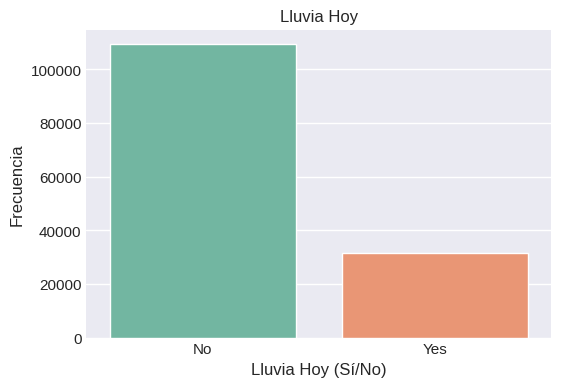

In [ ]:
# Gráfico de barras para RainToday
plt.figure(figsize=(6, 4))
sb.countplot(x='RainToday', data=data, palette='Set2')
plt.title('Lluvia Hoy')
plt.xlabel('Lluvia Hoy (Sí/No)')
plt.ylabel('Frecuencia')
plt.show()


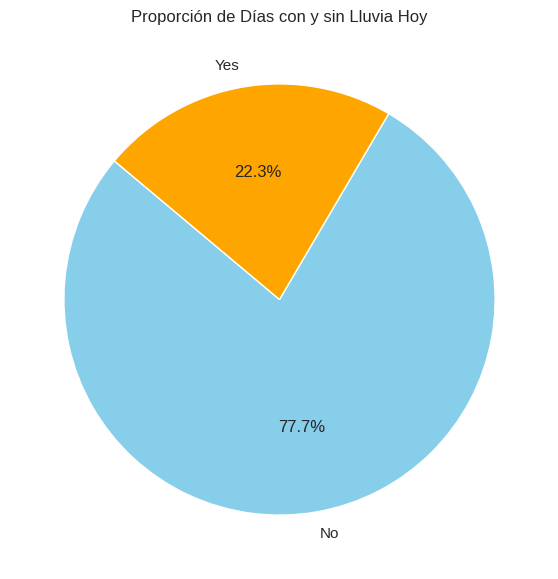

In [ ]:
# Contar las frecuencias de los valores en 'RainToday'
rain_today_counts = data['RainToday'].value_counts()

# Crear el gráfico de torta para 'RainToday'
plt.figure(figsize=(7, 7))
plt.pie(rain_today_counts, labels=rain_today_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title('Proporción de Días con y sin Lluvia Hoy')
plt.show()

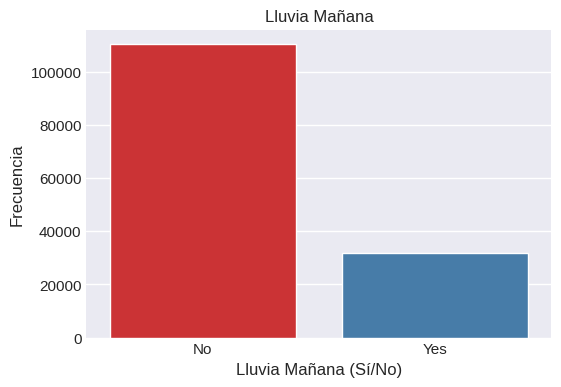

In [ ]:
# Gráfico de barras para RainTomorrow
plt.figure(figsize=(6, 4))
sb.countplot(x='RainTomorrow', data=data, palette='Set1')
plt.title('Lluvia Mañana')
plt.xlabel('Lluvia Mañana (Sí/No)')
plt.ylabel('Frecuencia')
plt.show()


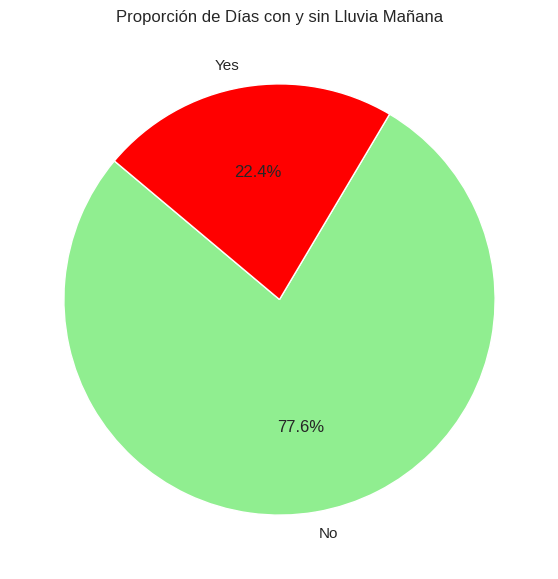

In [ ]:
# Contar las frecuencias de los valores en 'RainTomorrow'
rain_tomorrow_counts = data['RainTomorrow'].value_counts()

# Crear el gráfico de torta para 'RainTomorrow'
plt.figure(figsize=(7, 7))
plt.pie(rain_tomorrow_counts, labels=rain_tomorrow_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'red'])
plt.title('Proporción de Días con y sin Lluvia Mañana')
plt.show()


poco mas de 3 mil registros con lluvias en el dia o siguiente cuando mas de 10 mil registros sin lluiva lo cual no es de sorprender, australia es un pais con un clima mayormente arido


---

####**2.3. Medidas de Tendencia Central**

Tenemos que filtrar los datos debido a que el dataset esta con datos registrados como objeto

In [ ]:
#Filtramos las columnas del DataFrame para quedarnos solo con las de tipo int64 y float64
colum_numeric = df.select_dtypes(include=['int64', 'float64'])

In [ ]:
#Calculamos el promedio de estas columnas
promedio = colum_numeric.mean()

promedio  # Esto mostrará una Serie con el promedio de las columnas numéricas
mediana_valores = df.select_dtypes(include=['int64', 'float64']).median()

print(mediana_valores)

MinTemp            12.0
MaxTemp            22.6
Rainfall            0.0
Evaporation         4.8
Sunshine            8.5
WindGustSpeed      39.0
WindSpeed9am       13.0
WindSpeed3pm       19.0
Humidity9am        70.0
Humidity3pm        52.0
Pressure9am      1017.6
Pressure3pm      1015.2
Cloud9am            5.0
Cloud3pm            5.0
Temp9am            16.7
Temp3pm            21.1
RISK_MM             0.0
dtype: float64


---

###**2.4. Medidas de Dispersión**

In [ ]:
#Filtramos las columnas del DataFrame para quedarnos solo con las de tipo int64 y float64
colum_numeric = df.select_dtypes(include=['int64', 'float64'])

In [ ]:
#Desviación Estandar
desviacion_estandar = df.select_dtypes(include=['int64', 'float64']).std()
print(desviacion_estandar)

MinTemp           6.403283
MaxTemp           7.117618
Rainfall          8.465173
Evaporation       4.188537
Sunshine          3.781525
WindGustSpeed    13.588801
WindSpeed9am      8.893337
WindSpeed3pm      8.803345
Humidity9am      19.051293
Humidity3pm      20.797772
Pressure9am       7.105476
Pressure3pm       7.036677
Cloud9am          2.887016
Cloud3pm          2.720633
Temp9am           6.492838
Temp3pm           6.937594
RISK_MM           8.477969
dtype: float64


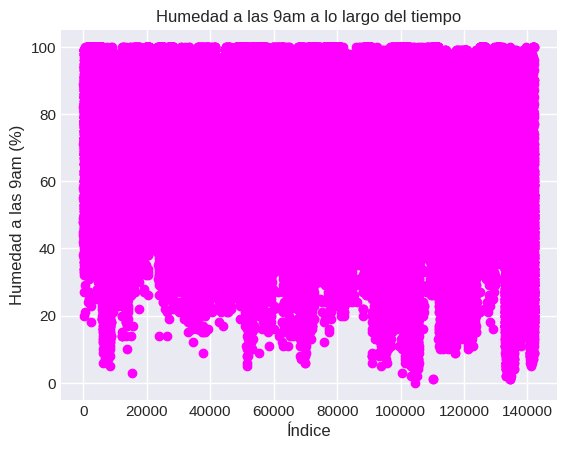

In [ ]:
# Diagrama de dispersión para Humidity9am
plt.scatter(data.index, data['Humidity9am'], color='magenta')
plt.title('Humedad a las 9am a lo largo del tiempo')
plt.xlabel('Índice')
plt.ylabel('Humedad a las 9am (%)')
plt.show()


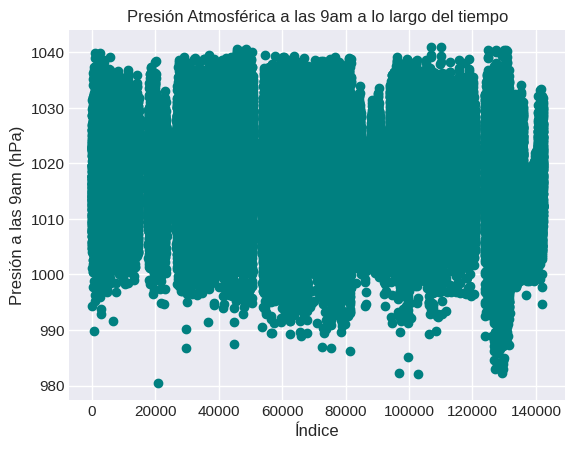

In [ ]:
# Diagrama de dispersión para Pressure9am
plt.scatter(data.index, data['Pressure9am'], color='teal')
plt.title('Presión Atmosférica a las 9am a lo largo del tiempo')
plt.xlabel('Índice')
plt.ylabel('Presión a las 9am (hPa)')
plt.show()


---

###**2.5. Medidas de Tendencia no central**

Diagrama de caja y bigotes (boxplot)

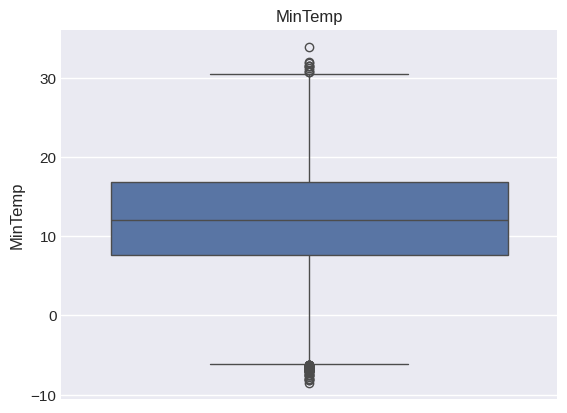

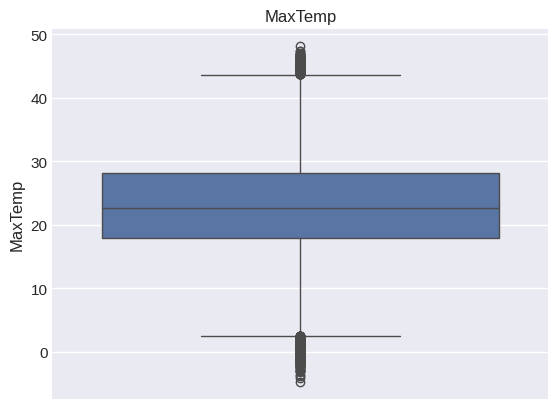

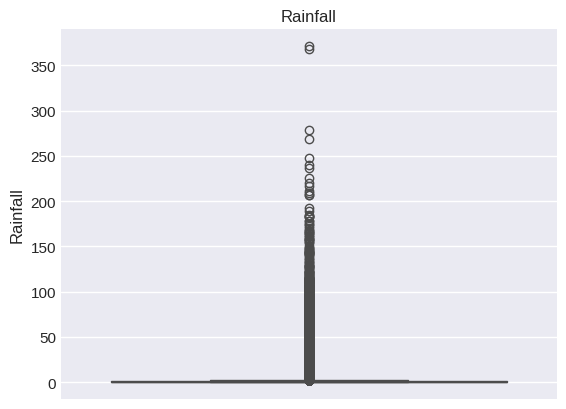

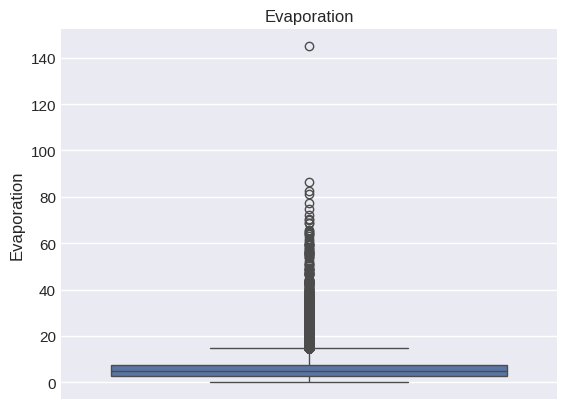

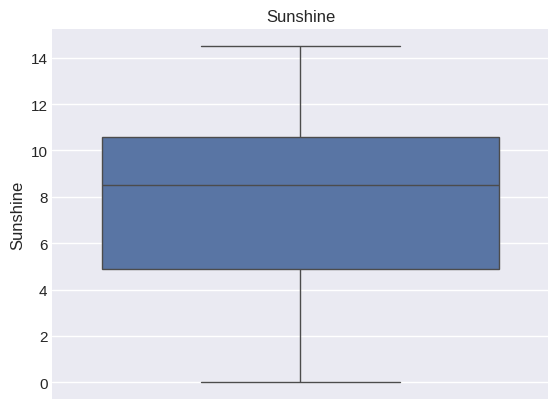

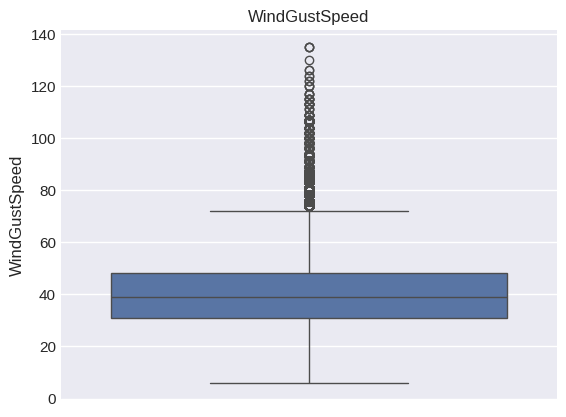

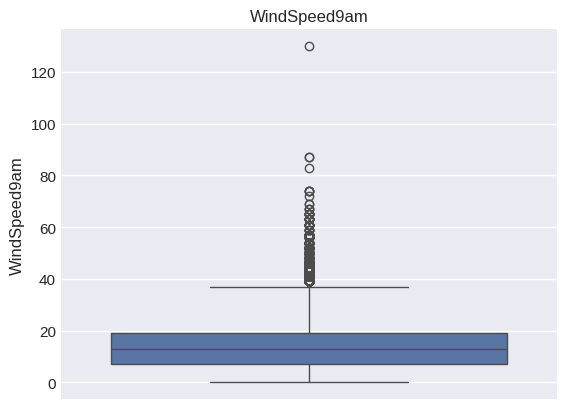

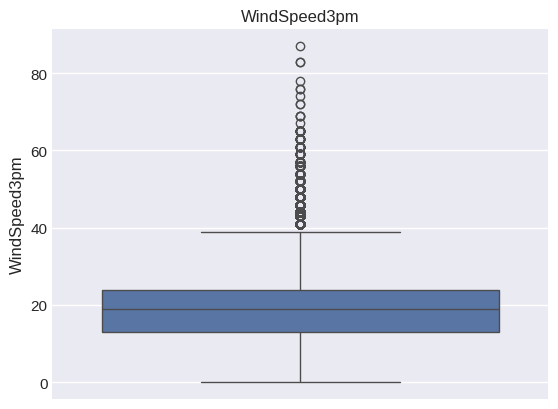

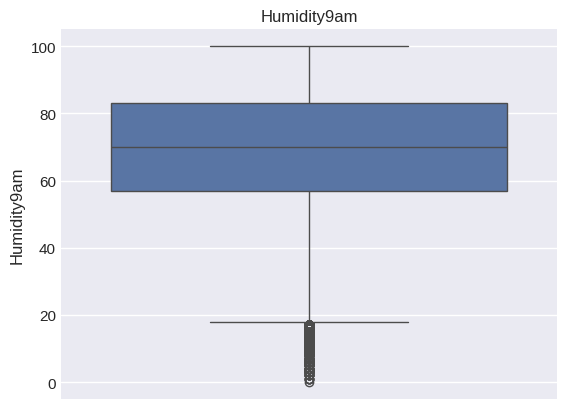

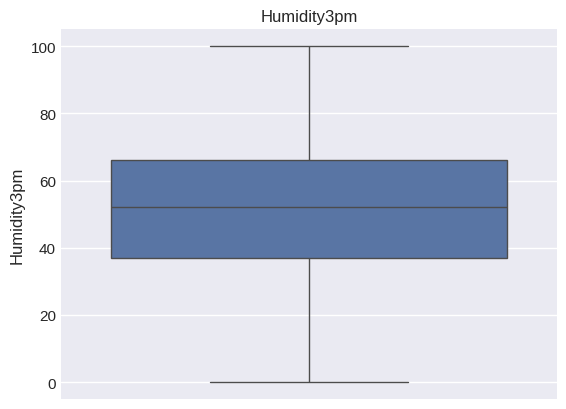

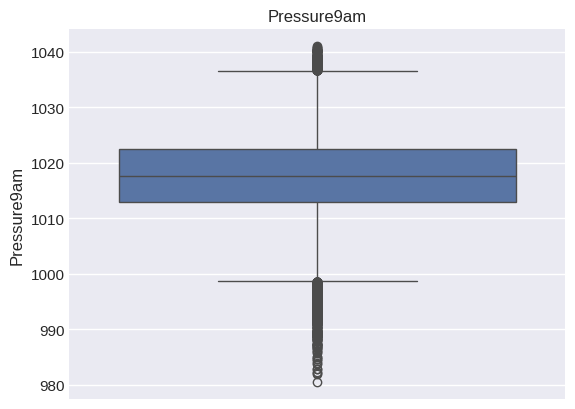

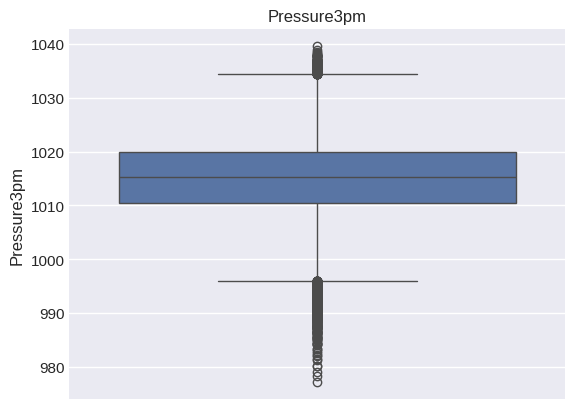

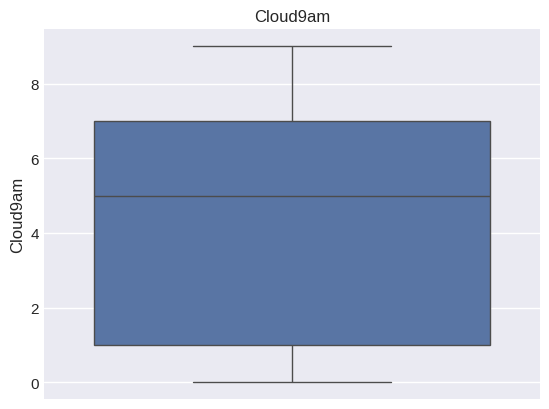

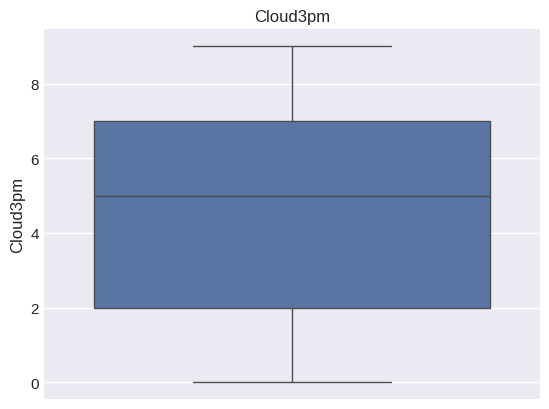

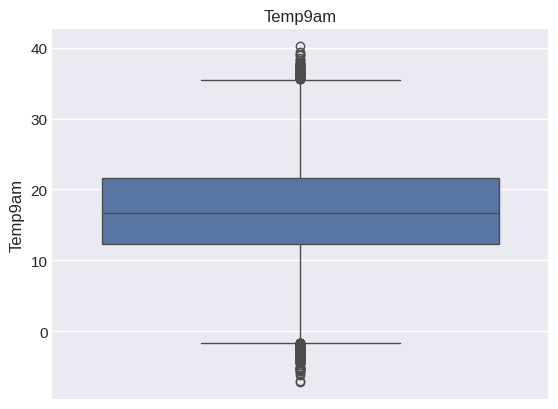

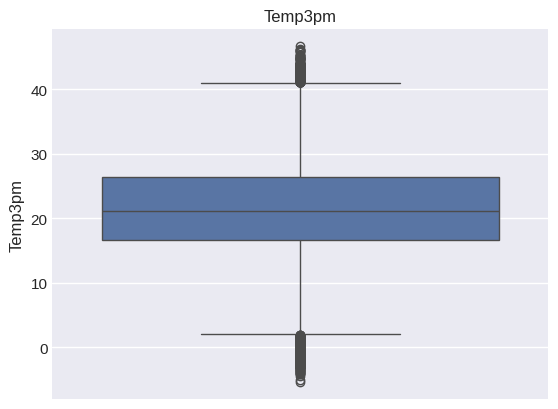

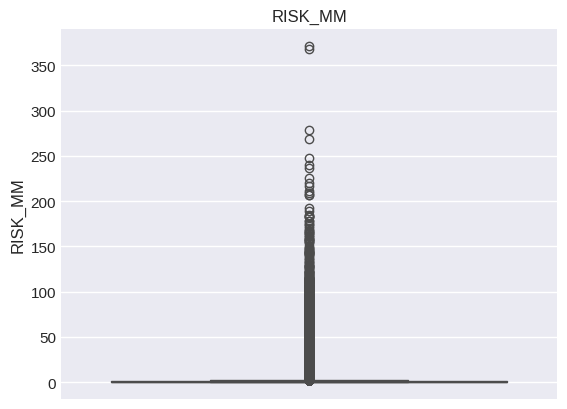

In [ ]:
num_vars = df.select_dtypes(include=['float64', 'int64'])
for col in num_vars.columns:
    plt.figure()
    plt.title(col)
    sb.boxplot(num_vars[col])
    plt.show()

Se presentan datos atipicos en los boxplot, en siguientes fases se realizadan pruebas para verificar si la eliminacion de estos es necesaria.

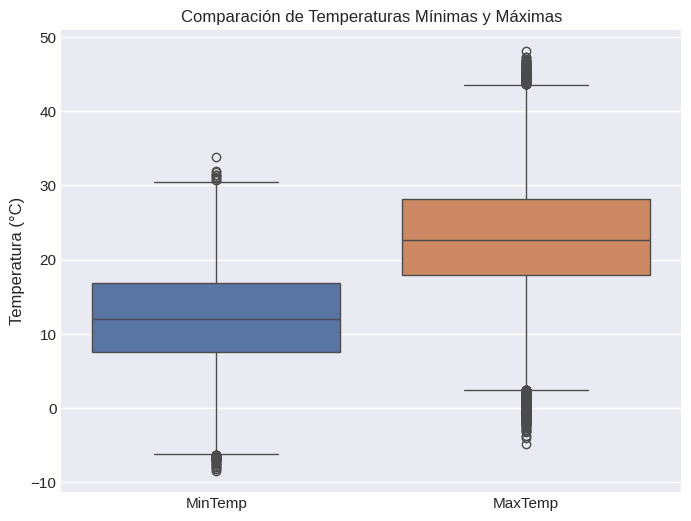

In [ ]:
# Crear un DataFrame con solo las columnas que nos interesan
temp_data = data[['MinTemp', 'MaxTemp']]

# Crear un boxplot comparativo
plt.figure(figsize=(8, 6))
sb.boxplot(data=temp_data)
plt.title('Comparación de Temperaturas Mínimas y Máximas')
plt.ylabel('Temperatura (°C)')
plt.show()

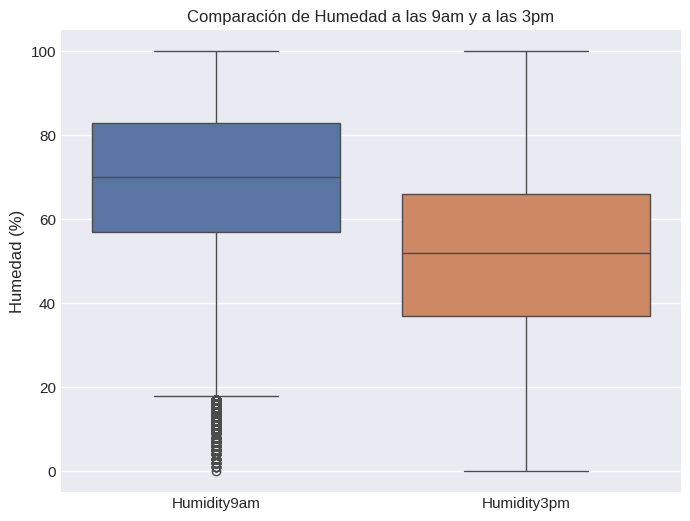

In [ ]:
# Crear un DataFrame con solo las columnas que nos interesan
humidity_data = data[['Humidity9am', 'Humidity3pm']]

# Crear un boxplot comparativo
plt.figure(figsize=(8, 6))
sb.boxplot(data=humidity_data)
plt.title('Comparación de Humedad a las 9am y a las 3pm')
plt.ylabel('Humedad (%)')
plt.show()




---



#**ETAPA III: PREPARACIÓN**

En esta etapa se corrigen los errores de registro encontrados en el dataset.

##**1. Limpieza**


###**1.1. Eliminación de variables**

⚠️ **NOTA** ⚠️

Para este caso la unica variable que seria eliminada seria la de date, la cual son las fechas de los regristros, se evaluara al momento de la creacion de los modelos predicctivos si esta sera eliminada o no, de momento prefiero no realizar esta eliminacion ya que estas pueden ser de utilidad mas adelante.

###**1.2. Tratamiento de datos nulos (missing)**

▶ Identificacion de datos nulos.

In [ ]:
#Datos nulos
df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [ ]:
# Datos nulos proporcionados, este codigo es para verificar el porcentaje de natos
#nulos de cada variable en funcion a la cantidad total de registros del dataset
datos_nulos = {
    'Date': 0,
    'Location': 0,
    'MinTemp': 637,
    'MaxTemp': 322,
    'Rainfall': 1406,
    'Evaporation': 60843,
    'Sunshine': 67816,
    'WindGustDir': 9330,
    'WindGustSpeed': 9270,
    'WindDir9am': 10013,
    'WindDir3pm': 3778,
    'WindSpeed9am': 1348,
    'WindSpeed3pm': 2630,
    'Humidity9am': 1774,
    'Humidity3pm': 3610,
    'Pressure9am': 14014,
    'Pressure3pm': 13981,
    'Cloud9am': 53657,
    'Cloud3pm': 57094,
    'Temp9am': 904,
    'Temp3pm': 2726,
    'RainToday': 1406,
    'RISK_MM': 0,
    'RainTomorrow': 0
}

# Total de registros en el dataset
total_registros = 142193

# Calcular el porcentaje de datos nulos
porcentajes_nulos = {k: (v / total_registros) * 100 for k, v in datos_nulos.items()}

# Crear y mostrar un DataFrame con la información
df_nulos = pd.DataFrame(list(porcentajes_nulos.items()), columns=['Variable', 'Porcentaje de Datos Nulos (%)'])
print(df_nulos)


         Variable  Porcentaje de Datos Nulos (%)
0            Date                       0.000000
1        Location                       0.000000
2         MinTemp                       0.447983
3         MaxTemp                       0.226453
4        Rainfall                       0.988797
5     Evaporation                      42.789026
6        Sunshine                      47.692924
7     WindGustDir                       6.561504
8   WindGustSpeed                       6.519308
9      WindDir9am                       7.041838
10     WindDir3pm                       2.656952
11   WindSpeed9am                       0.948007
12   WindSpeed3pm                       1.849599
13    Humidity9am                       1.247600
14    Humidity3pm                       2.538803
15    Pressure9am                       9.855619
16    Pressure3pm                       9.832411
17       Cloud9am                      37.735332
18       Cloud3pm                      40.152469
19        Temp9am   

▶ Imputación de datos faltantes de las variables con mayor cantidad de nulos (más del 10% de los registros), reemplazando por la medida de tendencia central más significativa para cada caso:

**Uso de KNN para la prediccion y el relleno de los datos nulos de las variables con mas null dentro del dataset, esto para las variables con mas datos nulos (igual o mas al 40% ) **

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
# Convertir 'Date' a formato de fecha si se usa como variable explicativa
data['Date'] = pd.to_datetime(data['Date'])

# Seleccionar columnas relevantes, incluyendo algunas que servirán para el imputer
columns = ['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am', 'Temp3pm', 'Humidity3pm', 'Rainfall', 'Temp9am', 'WindSpeed9am']
data_filtered = data[columns]



In [ ]:
# Seleccionar columnas relevantes y manejar valores nulos
columns_needed = ['Temp3pm', 'Humidity3pm', 'Rainfall', 'Temp9am', 'Location', 'Date']
data_filtered = data[columns_needed]
data_filtered['Date'] = pd.to_datetime(data_filtered['Date'])
data_filtered_non_null = data_filtered.dropna(subset=['Location', 'Date'])

# Inicializar y aplicar KNN Imputer para columnas numéricas
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
numeric_columns = data_filtered_non_null.select_dtypes(include=['float64']).columns
data_numeric = data_filtered_non_null[numeric_columns]
imputed_data = imputer.fit_transform(data_numeric)
data_imputed = pd.DataFrame(imputed_data, columns=numeric_columns)

# Combinar datos imputados con columnas no numéricas
data_final = pd.concat([data_imputed, data_filtered_non_null[['Location', 'Date']]], axis=1)


Uso de LinearImputer para imputar los datos predecidos usando la regresion linear

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Asumiendo que df es tu DataFrame
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns.remove('Sunshine')  # Asegurándonos de que 'Sunshine' no está en las variables predictoras

# Imputar los valores NaN en las columnas numéricas
imputer = SimpleImputer(strategy='mean')  # Puedes elegir otra estrategia como 'median' si es más adecuado
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Ahora separamos el conjunto de datos en entrenamiento y prueba
train_df = df[df['Sunshine'].notnull()]
test_df = df[df['Sunshine'].isnull()]

# Verifica que test_df no esté vacío
if not test_df.empty:
    # Entrenar el modelo
    model = LinearRegression()
    model.fit(train_df[numeric_columns], train_df['Sunshine'])

    # Predicción de los valores nulos, solo si hay datos en test_df
    predicted_sunshine = model.predict(test_df[numeric_columns])
    df.loc[df['Sunshine'].isnull(), 'Sunshine'] = predicted_sunshine
else:
    print("No hay datos nulos en 'Sunshine' para imputar.")


ejecutando el KNN Imputer para la variable sunshine aplica tambien para el resto de las variables dentro de las que el algoritmo contemplaba por lo que se necesita ejecutar este unico codigo para que el resto tambien se llene.

In [ ]:
from sklearn.impute import SimpleImputer

# Cargar el DataFrame, si no está ya cargado
# df = pd.read_csv('ruta_del_archivo.csv')

# Crear imputadores
imputer_moda = SimpleImputer(strategy='most_frequent')  # Para datos categóricos y binarios

# Lista de columnas categóricas y binarias
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
binary_column = ['RainToday']

# Aplicar imputación
df[categorical_columns] = imputer_moda.fit_transform(df[categorical_columns])
df[binary_column] = imputer_moda.fit_transform(df[binary_column])

# Verificar si aún hay valores nulos
print(df.isna().sum())


Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64


Ya no hay datos nulos


##**2. Transformación**

Transformación de las variables categóricas a numéricas discretas. Se reemplazan las clases de cada variable por una etiqueta numérica.

###**2.1. Variables Categóricas Ordinales**

En los casos donde el orden de las clases tenga una lógica dentro de la variable categórica, es recomendable hacer el reemplazo de cada clase de forma manual para mantener dicho orden lógico.

In [ ]:
# Mostrar valores únicos para 'Date'
unique_dates = df['Date'].unique()
print(f"Valores únicos en 'Date': {unique_dates}")

Valores únicos en 'Date': ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']


In [ ]:
# Mostrar valores únicos para 'Location'
unique_locations = df['Location'].unique()
print(f"Valores únicos en 'Location': {unique_locations}")

Valores únicos en 'Location': ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


In [ ]:
# Mostrar valores únicos para 'WindGustDir'
unique_wind_gust_dir = df['WindGustDir'].unique()
print(f"Valores únicos en 'WindGustDir': {unique_wind_gust_dir}")

Valores únicos en 'WindGustDir': ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']


In [ ]:
# Mostrar valores únicos para 'WindDir9am'
unique_wind_dir_9am = df['WindDir9am'].unique()
print(f"Valores únicos en 'WindDir9am': {unique_wind_dir_9am}")

Valores únicos en 'WindDir9am': ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'N' 'SSW' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']


In [ ]:
# Mostrar valores únicos para 'WindDir3pm'
unique_wind_dir_3pm = df['WindDir3pm'].unique()
print(f"Valores únicos en 'WindDir3pm': {unique_wind_dir_3pm}")

Valores únicos en 'WindDir3pm': ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']


###**2.2. Variables Categóricas Nominales**

Para variables con pocas clases (por lo general binarias) o donde sea importante controlar la etiqueta numérica de la clase, se recomienda hacer el reemplazo de forma manual.

In [ ]:
# Mostrar valores únicos para 'RainToday'
unique_rain_today = df['RainToday'].unique()
print(f"Valores únicos en 'RainToday': {unique_rain_today}")

Valores únicos en 'RainToday': ['No' 'Yes']


In [ ]:
# Mostrar valores únicos para 'RainTomorrow'
unique_rain_tomorrow = df['RainTomorrow'].unique()
print(f"Valores únicos en 'RainTomorrow': {unique_rain_tomorrow}")

Valores únicos en 'RainTomorrow': ['No' 'Yes']


In [ ]:
#Reemplazando valores binarios
df['RainToday'].replace({
    "No":0,"Yes":1
    }, inplace=True)

In [ ]:
#Reemplazando valores binarios
df['RainTomorrow'].replace({
    "No":0,"Yes":1
    }, inplace=True)

➡️ `Label Encoding`: Creación de etiquetas numéricas dentro de la misma columna. Sólo sirve para variables categóricas nominales ya que las etiquetas perderían el orden para variables categoricas ordinales. Se recomienda para variables con muchas clases.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Selecciona las columnas categóricas que se van a codificar
categorical_cols = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

#Itera sobre las columnas categóricas y aplica LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

#Muestra los valores originales y los valores codificados
for col in categorical_cols:
    original_values = df[col]
    encoded_values = df[col]
    le = label_encoders[col]

    unique_values = original_values.unique()
    unique_encoded_values = le.inverse_transform(unique_values)

    mapping = dict(zip(unique_values, unique_encoded_values))
    print(f"Columna: {col}")
    print("Valor Codificado - Clase")
    for value, encoded_value in mapping.items():
        print(f"{value} - {encoded_value}")
    print("------------------------")

Columna: Date
Valor Codificado - Clase
396 - 2008-12-01
397 - 2008-12-02
398 - 2008-12-03
399 - 2008-12-04
400 - 2008-12-05
401 - 2008-12-06
402 - 2008-12-07
403 - 2008-12-08
404 - 2008-12-09
405 - 2008-12-10
406 - 2008-12-11
407 - 2008-12-12
408 - 2008-12-13
409 - 2008-12-14
411 - 2008-12-16
412 - 2008-12-17
413 - 2008-12-18
414 - 2008-12-19
415 - 2008-12-20
416 - 2008-12-21
417 - 2008-12-22
418 - 2008-12-23
419 - 2008-12-24
420 - 2008-12-25
421 - 2008-12-26
422 - 2008-12-27
423 - 2008-12-28
424 - 2008-12-29
425 - 2008-12-30
426 - 2008-12-31
427 - 2009-01-01
428 - 2009-01-02
429 - 2009-01-03
430 - 2009-01-04
431 - 2009-01-05
432 - 2009-01-06
433 - 2009-01-07
434 - 2009-01-08
435 - 2009-01-09
436 - 2009-01-10
437 - 2009-01-11
438 - 2009-01-12
439 - 2009-01-13
440 - 2009-01-14
441 - 2009-01-15
442 - 2009-01-16
443 - 2009-01-17
444 - 2009-01-18
445 - 2009-01-19
446 - 2009-01-20
447 - 2009-01-21
448 - 2009-01-22
449 - 2009-01-23
450 - 2009-01-24
451 - 2009-01-25
452 - 2009-01-26
453 - 200

Las fechas son pasadas por la transformacion de datos para posibles futuros modelos en los que se implementaran

---




⚠️ **NOTA** ⚠️

Tras varias pruebas con la aplicacion del algoritmo de IQR se tomo la decision de no eliminar los datos atipicos o outliers para este caso ya que son muchas las variables que en su gran mayoria son atipicos aunque posterior a la etapa 3 los datos poseen mayor densidad de datos en en los quartiles con mas informacion por lo que se espera la presencia de estos outliers no sea negativo para los modelos predictivos.



---



##**3. Análisis**

###**3.1. Nuevo Dataframe**

Se visualiza el Dataframe resultante del proceso de limpieza y transformación, corroborando la corrección de los errores previamente identificados:

In [ ]:
#Unificación del formato de las variables decimales
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
df.sample(10)

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
37941   2529        42    10.60    35.20      0.00        10.60     13.10   
71747   2424        25     3.20    16.00      0.20         5.47      7.68   
34055   1648        38     9.20    16.50      0.00         4.20      4.00   
122040  1613        36     3.60    19.60      0.40         5.47      8.25   
38593   3182        42     4.60    22.20      0.00         5.47      8.43   
9319     820        11    20.60    27.60      2.60         5.40      5.40   
61313   2004        35    -0.30    12.60      0.00         1.20      5.20   
92446   2020        39    11.50    25.10      0.00         6.40     10.90   
54512   1241         5     9.00    14.60      0.20         5.47      3.31   
22386   2196        27    18.40    24.20      0.00         5.80     11.40   

        WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity3pm  Pressure9am  \
37941            12          41.00           0  ...        12.00      1013.10   
71747            11          30.00          15  ...        43.00      1025.50   
34055             8         104.00          14  ...        70.00      1000.50   
122040            8          26.00           2  ...        47.00      1017.65   
38593             3          31.00           0  ...        34.00      1023.10   
9319              6          35.00           8  ...        62.00      1007.80   
61313             6          17.00          14  ...        62.00      1028.50   
92446             4          35.00          10  ...        49.00      1018.30   
54512             8          44.00           8  ...        74.00      1023.60   
22386             0          43.00           0  ...        61.00      1012.10   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
37941       1010.40      1.00      6.00    22.80    33.50          0     0.00   
71747       1023.70      4.44      4.50    10.40    14.10          0     0.00   
34055       1000.80      5.00      8.00    12.40    12.00          0    20.20   
122040      1015.26      4.44      4.50    13.80    17.60          0     0.00   
38593       1018.00      4.44      4.50    12.60    21.50          0     0.00   
9319        1008.60      7.00      7.00    23.60    26.70          1     0.00   
61313       1024.60      4.00      6.00     3.30    11.60          0     0.00   
92446       1016.10      1.00      1.00    21.00    23.70          0     0.00   
54512       1023.60      8.00      8.00     9.70    12.90          0     0.00   
22386       1012.60      3.00      3.00    22.40    23.40          0     0.00   

        RainTomorrow  
37941              0  
71747              0  
34055              1  
122040             0  
38593              0  
9319               0  
61313              0  
92446              0  
54512              0  
22386              0  

[10 rows x 24 columns]

In [ ]:
print(df.shape)

(142193, 24)


Se eliminaron 77 registros (filas).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  int64  
 1   Location       142193 non-null  int64  
 2   MinTemp        142193 non-null  float64
 3   MaxTemp        142193 non-null  float64
 4   Rainfall       142193 non-null  float64
 5   Evaporation    142193 non-null  float64
 6   Sunshine       142193 non-null  float64
 7   WindGustDir    142193 non-null  int64  
 8   WindGustSpeed  142193 non-null  float64
 9   WindDir9am     142193 non-null  int64  
 10  WindDir3pm     142193 non-null  int64  
 11  WindSpeed9am   142193 non-null  float64
 12  WindSpeed3pm   142193 non-null  float64
 13  Humidity9am    142193 non-null  float64
 14  Humidity3pm    142193 non-null  float64
 15  Pressure9am    142193 non-null  float64
 16  Pressure3pm    142193 non-null  float64
 17  Cloud9am       142193 non-nul

Ya no hay datos de tipo object.

In [ ]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

Ya no existen datos nulos.

In [ ]:
df.describe()

Date  Location   MinTemp   MaxTemp  Rainfall  Evaporation  \
count 142193.00 142193.00 142193.00 142193.00 142193.00    142193.00   
mean    1924.78     23.74     12.19     23.23      2.35         5.47   
std      886.17     14.24      6.39      7.11      8.42         3.17   
min        0.00      0.00     -8.50     -4.80      0.00         0.00   
25%     1162.00     11.00      7.60     17.90      0.00         4.00   
50%     1945.00     24.00     12.00     22.70      0.00         5.47   
75%     2691.00     36.00     16.80     28.20      0.80         5.47   
max     3435.00     48.00     33.90     48.10    371.00       145.00   

       Sunshine  WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity3pm  \
count 142193.00    142193.00      142193.00   142193.00  ...    142193.00   
mean       7.43         8.06          39.98        7.00  ...        51.48   
std        3.19         4.69          13.14        4.51  ...        20.53   
min       -5.77         0.00           6.00        0.00  ...         0.00   
25%        5.53         4.00          31.00        3.00  ...        37.00   
50%        7.66         9.00          39.00        7.00  ...        51.48   
75%        9.80        13.00          46.00       11.00  ...        65.00   
max       16.94        15.00         135.00       15.00  ...       100.00   

       Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  \
count    142193.00    142193.00 142193.00 142193.00 142193.00 142193.00   
mean       1017.65      1015.26      4.44      4.50     16.99     21.69   
std           6.75         6.68      2.28      2.10      6.47      6.87   
min         980.50       977.10      0.00      0.00     -7.20     -5.40   
25%        1013.50      1011.00      3.00      4.00     12.30     16.70   
50%        1017.65      1015.26      4.44      4.50     16.80     21.30   
75%        1021.80      1019.40      6.00      6.00     21.50     26.30   
max        1041.00      1039.60      9.00      9.00     40.20     46.70   

       RainToday   RISK_MM  RainTomorrow  
count  142193.00 142193.00     142193.00  
mean        0.22      2.36          0.22  
std         0.42      8.48          0.42  
min         0.00      0.00          0.00  
25%         0.00      0.00          0.00  
50%         0.00      0.00          0.00  
75%         0.00      0.80          0.00  
max         1.00    371.00          1.00  

[8 rows x 24 columns]

###**3.2. Análisis Estadístico**

---




⚠️ **NOTA** ⚠️

Para este analisis simpletemente se grafiacaran algunas de las variables mas relevantes y las que me dieron mas batalla al momento de transformarlas, esto es debido a que el analisis ya se llevo acabo en la mayoria de los graficos anteriores y en este punto solo se realizaran observaciones respecto a su cambio y no a su contenido ya que el contexto se realizo



---





Nuevo resumen estadístico con datos corregidos:




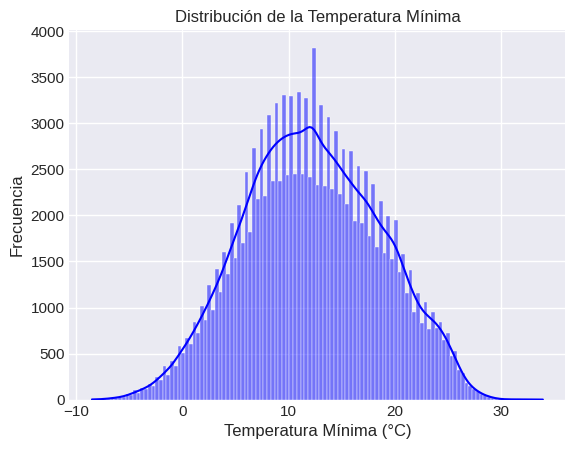

In [ ]:
# Histograma para MinTemp
sb.histplot(df['MinTemp'], color='blue', kde=True)
plt.title('Distribución de la Temperatura Mínima')
plt.xlabel('Temperatura Mínima (°C)')
plt.ylabel('Frecuencia')
plt.show()

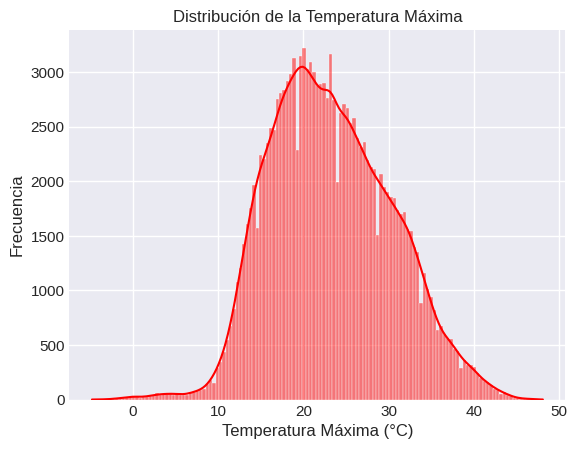

In [ ]:
# Histograma para MaxTemp
sb.histplot(df['MaxTemp'], color='red', kde=True)
plt.title('Distribución de la Temperatura Máxima')
plt.xlabel('Temperatura Máxima (°C)')
plt.ylabel('Frecuencia')
plt.show()

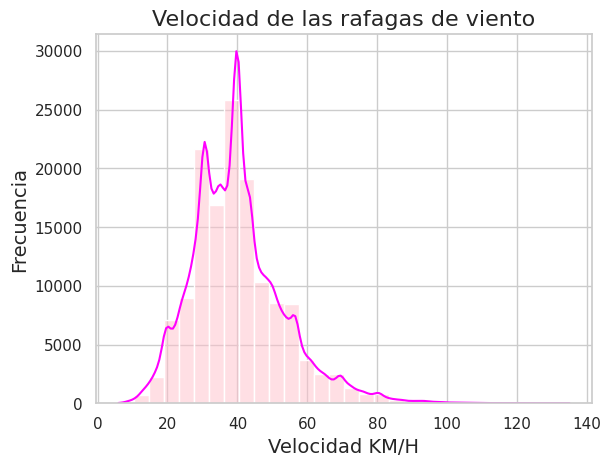

In [ ]:
# Establecer el estilo del gráfico
sb.set(style="whitegrid")

# Crear el histograma con función de densidad
sb.histplot(df['WindGustSpeed'], kde=True, color="pink", bins=30)

# Añadir títulos y etiquetas
plt.xlabel("Velocidad KM/H", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.title("Velocidad de las rafagas de viento", fontsize=16)

# Establecer el color de la línea de la función de densidad en un tono rosado más oscuro
plt.gca().get_lines()[0].set_color('magenta')

# Mostrar el gráfico
plt.show()

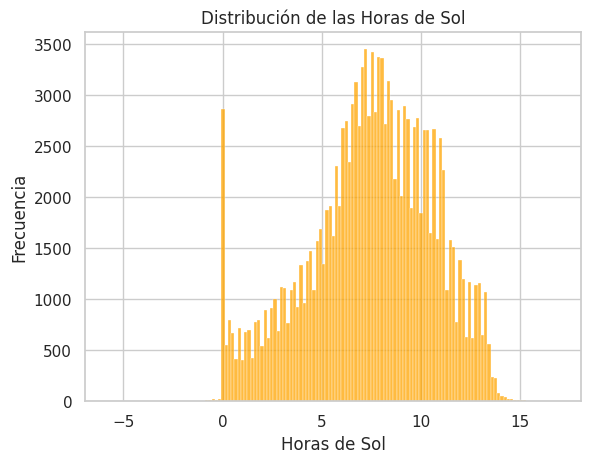

In [ ]:
# Histograma para Sunshine
sb.histplot(df['Sunshine'], color='orange', kde=False)
plt.title('Distribución de las Horas de Sol')
plt.xlabel('Horas de Sol')
plt.ylabel('Frecuencia')
plt.show()

Ahora esta variable cuenta con una distribucion de datos mas normal teniendo mas datos en 0 y llegando a tener nuevos datos que registran datos negativos a 0 lo cual es algo a tratar en el apartado de outliers

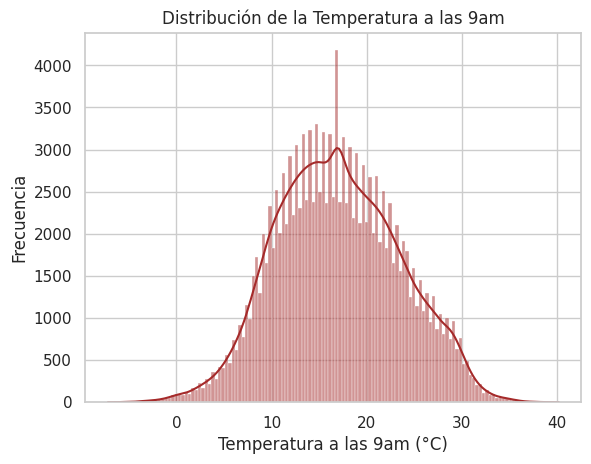

In [ ]:
# Histograma para Temp9am
sb.histplot(df['Temp9am'], color='brown', kde=True)
plt.title('Distribución de la Temperatura a las 9am')
plt.xlabel('Temperatura a las 9am (°C)')
plt.ylabel('Frecuencia')
plt.show()

Presenta la misma campana de gaus de distribucion normal pero con algunos datos disparados en el punto mas alto de la curva

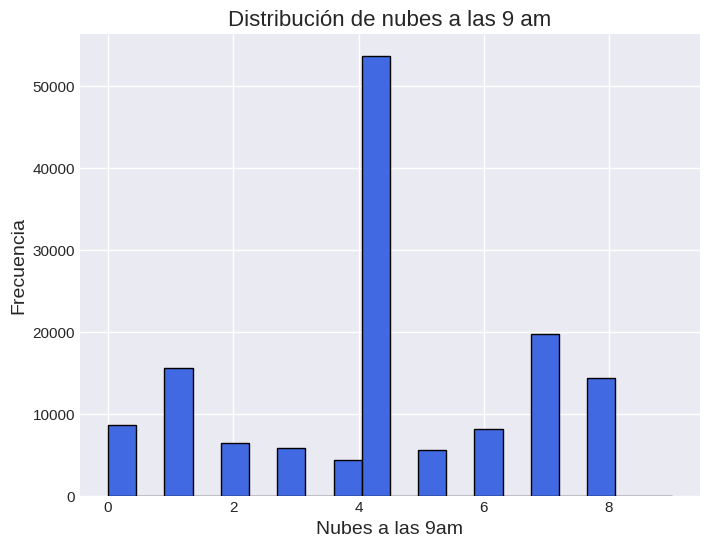

In [ ]:
# Establecer el estilo del gráfico
plt.style.use('seaborn-darkgrid')

# Crear el histograma
plt.figure(figsize=(8, 6))
plt.hist(x=df['Cloud9am'], bins=20, color='royalblue', edgecolor='black')

# Añadir títulos y etiquetas
plt.xlabel("Nubes a las 9am", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.title("Distribución de nubes a las 9 am", fontsize=16)

# Añadir líneas de cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()

se diparan algunos datos pero no son relevantes para la prediccion de los modelos


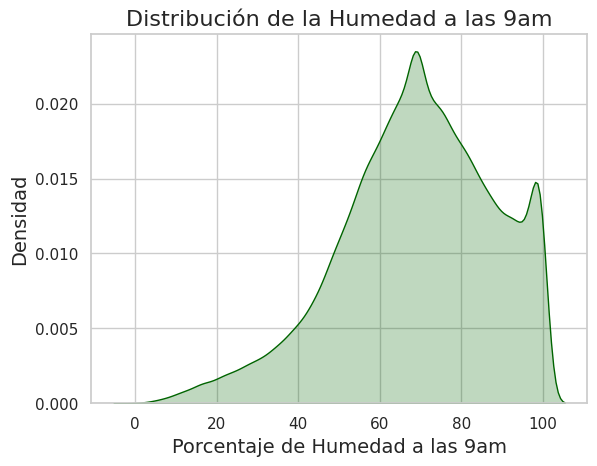

In [ ]:
# Establecer el estilo del gráfico
sb.set(style="whitegrid")

# Crear la función de densidad
sb.kdeplot(df['Humidity9am'], shade=True, color="darkgreen")

# Añadir títulos y etiquetas
plt.xlabel("Porcentaje de Humedad a las 9am", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.title("Distribución de la Humedad a las 9am", fontsize=16)

# Mostrar el gráfico
plt.show()

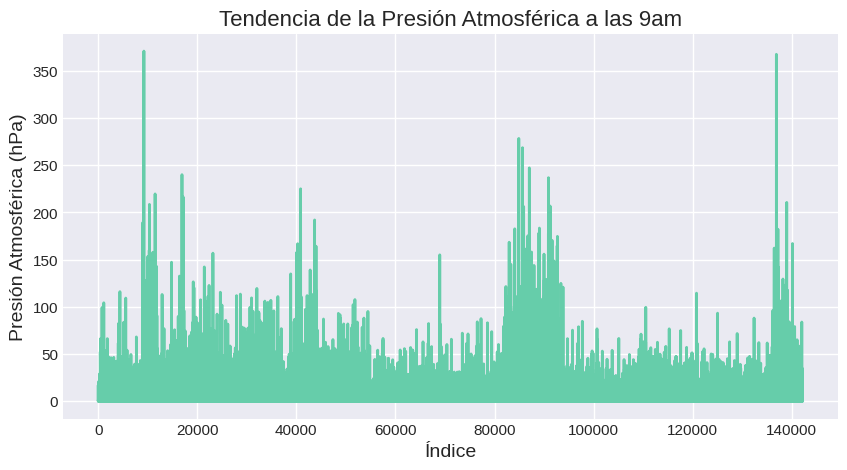

In [ ]:
# Establecer el estilo del gráfico
plt.style.use('seaborn-darkgrid')

# Crear el gráfico de líneas
df['RISK_MM'].plot(kind='line', figsize=(10, 5), color= '#66CDAA', linewidth=2, title='Presión Atmosférica a las 9am')

# Personalizar las etiquetas y el título
plt.xlabel("Índice", fontsize=14)  # Se mantiene "Índice" si los datos están indexados por fecha u otro indicador numérico
plt.ylabel("Presión Atmosférica (hPa)", fontsize=14)
plt.title("Tendencia de la Presión Atmosférica a las 9am", fontsize=16)

# Ocultar los bordes superior y derecho
plt.gca().spines[['top', 'right']].set_visible(False)

# Añadir líneas de cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()

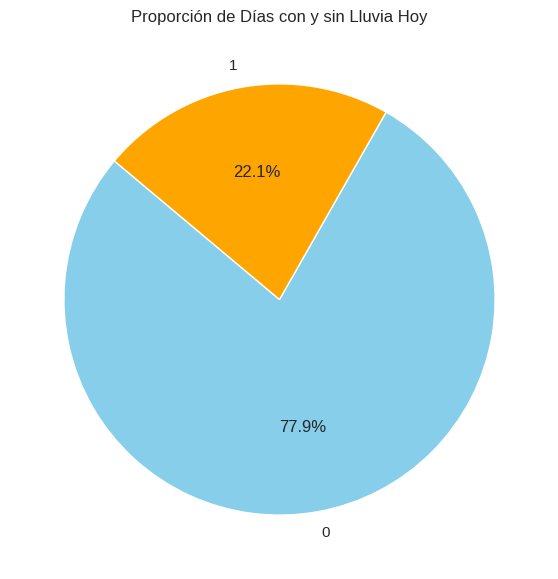

In [ ]:
# Contar las frecuencias de los valores en 'RainToday'
rain_today_counts = df['RainToday'].value_counts()

# Crear el gráfico de torta para 'RainToday'
plt.figure(figsize=(7, 7))
plt.pie(rain_today_counts, labels=rain_today_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title('Proporción de Días con y sin Lluvia Hoy')
plt.show()

Las variables numéricas se ven mucho más simétricas que antes.

▶ Medidas de Tendencia Central:

In [ ]:
#Moda de todas las variables (incluye variables categoricas)
df.mode().iloc[0]

Date            1859.00
Location           9.00
MinTemp            9.60
MaxTemp           20.00
Rainfall           0.00
Evaporation        5.47
Sunshine           0.00
WindGustDir       13.00
WindGustSpeed     39.98
WindDir9am         3.00
WindDir3pm         9.00
WindSpeed9am       9.00
WindSpeed3pm      13.00
Humidity9am       99.00
Humidity3pm       51.48
Pressure9am     1017.65
Pressure3pm     1015.26
Cloud9am           4.44
Cloud3pm           4.50
Temp9am           16.99
Temp3pm           21.69
RainToday          0.00
RISK_MM            0.00
RainTomorrow       0.00
Name: 0, dtype: float64

▶ Medidas de Dispersión:

In [ ]:
#Desviación Estandar
df.std()

Date            886.17
Location         14.24
MinTemp           6.39
MaxTemp           7.11
Rainfall          8.42
Evaporation       3.17
Sunshine          3.19
WindGustDir       4.69
WindGustSpeed    13.14
WindDir9am        4.51
WindDir3pm        4.55
WindSpeed9am      8.85
WindSpeed3pm      8.72
Humidity9am      18.93
Humidity3pm      20.53
Pressure9am       6.75
Pressure3pm       6.68
Cloud9am          2.28
Cloud3pm          2.10
Temp9am           6.47
Temp3pm           6.87
RainToday         0.42
RISK_MM           8.48
RainTomorrow      0.42
dtype: float64

In [ ]:
#Varianza
df.var()

Date            785289.84
Location           202.71
MinTemp             40.82
MaxTemp             50.55
Rainfall            70.95
Evaporation         10.04
Sunshine            10.17
WindGustDir         22.04
WindGustSpeed      172.62
WindDir9am          20.38
WindDir3pm          20.67
WindSpeed9am        78.34
WindSpeed3pm        76.07
Humidity9am        358.42
Humidity3pm        421.57
Pressure9am         45.51
Pressure3pm         44.65
Cloud9am             5.19
Cloud3pm             4.43
Temp9am             41.89
Temp3pm             47.21
RainToday            0.17
RISK_MM             71.88
RainTomorrow         0.17
dtype: float64

La dispersión de las variables math_score, reading_score y writing_score bajó considerablemente.

▶ Medidas de Tendencia no central:

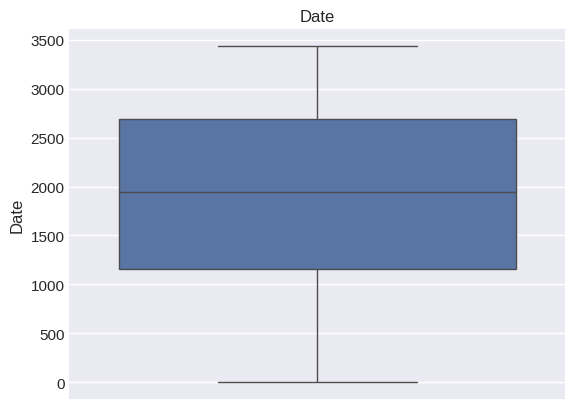

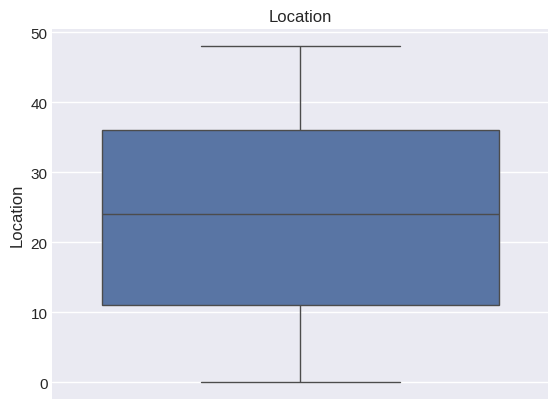

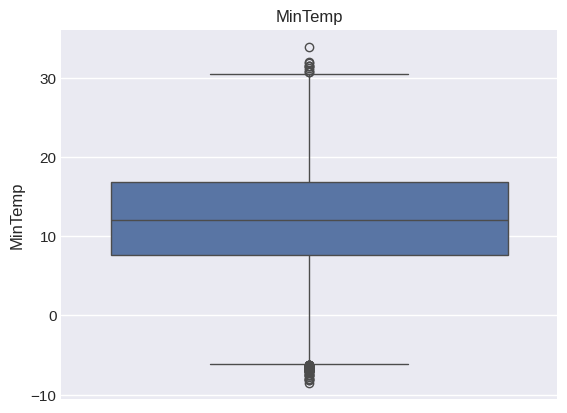

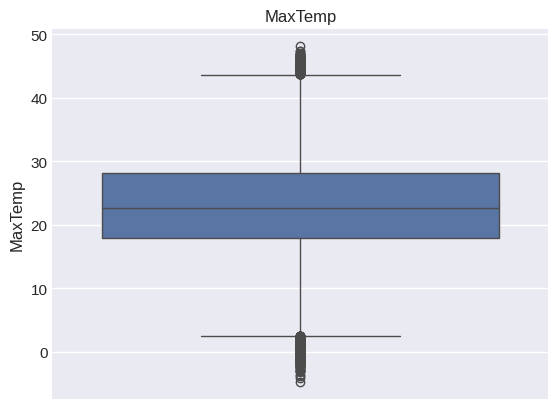

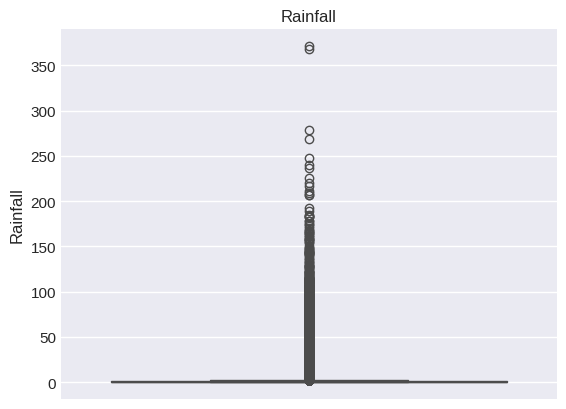

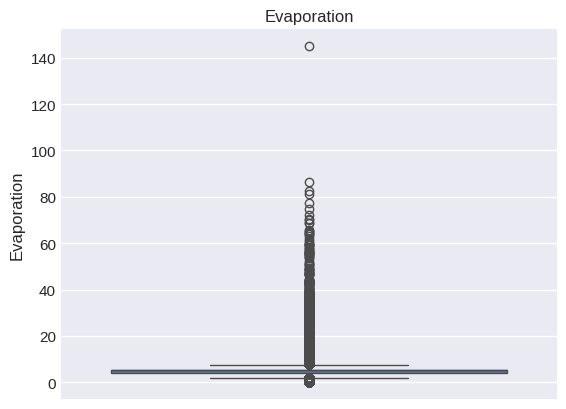

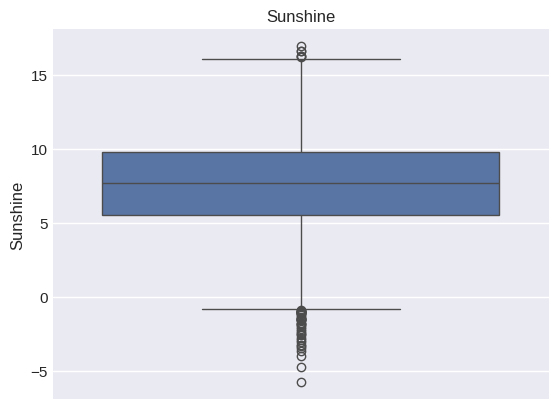

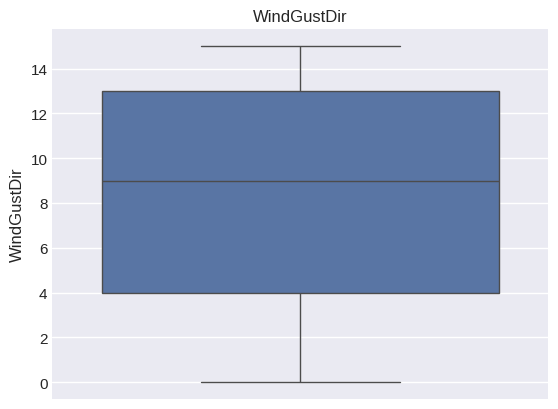

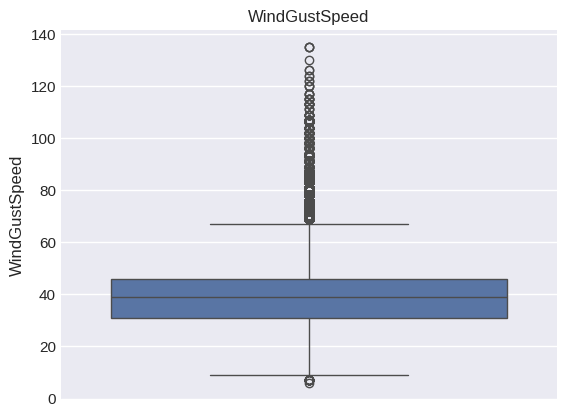

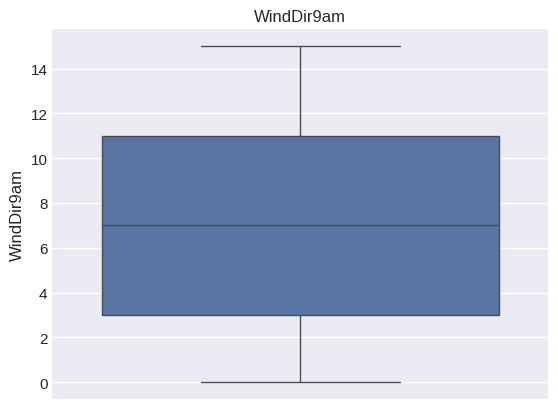

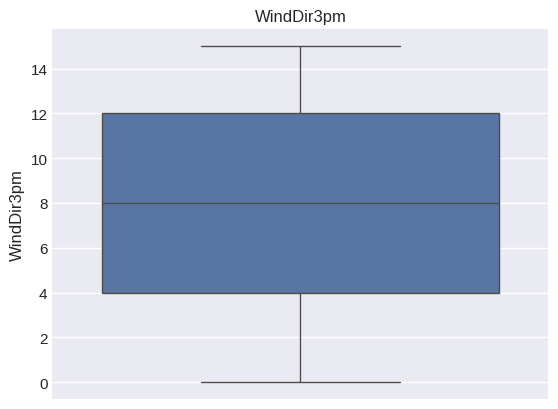

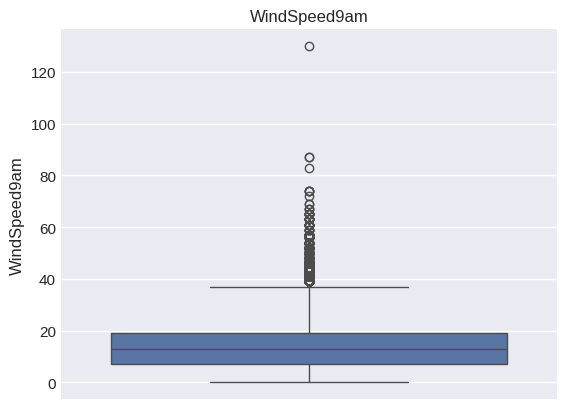

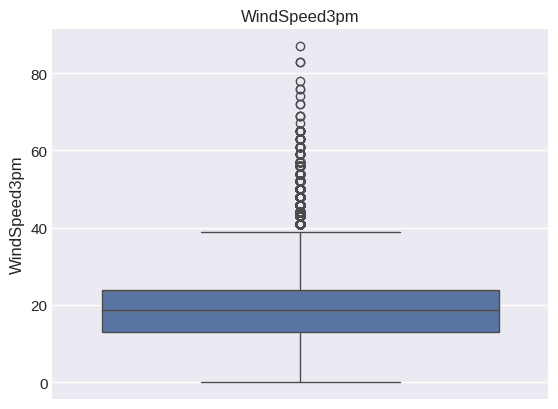

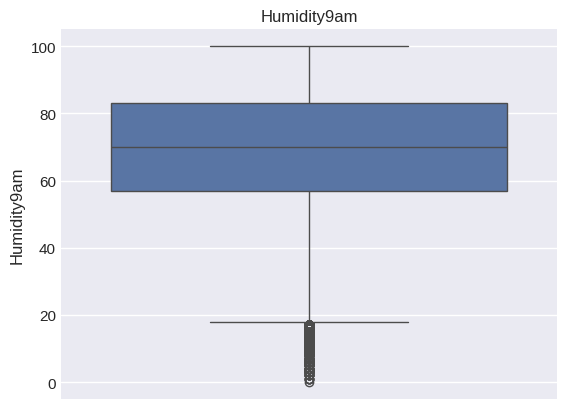

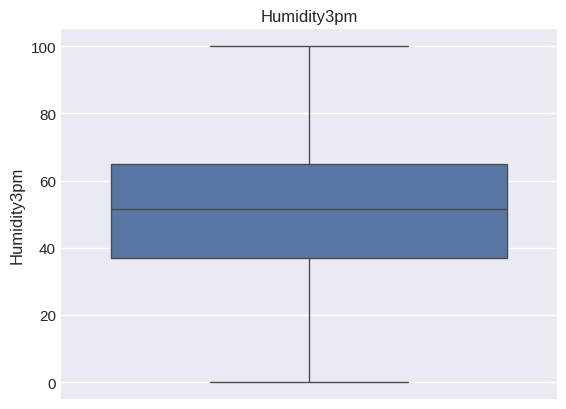

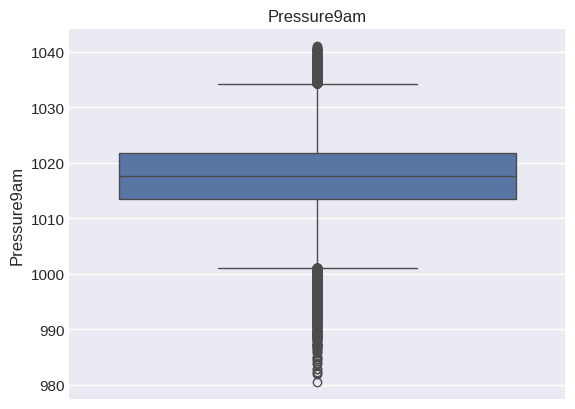

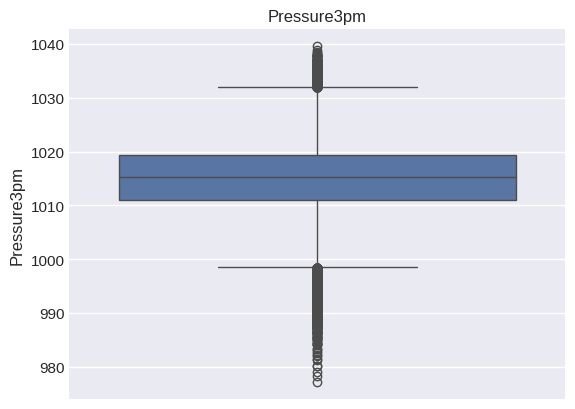

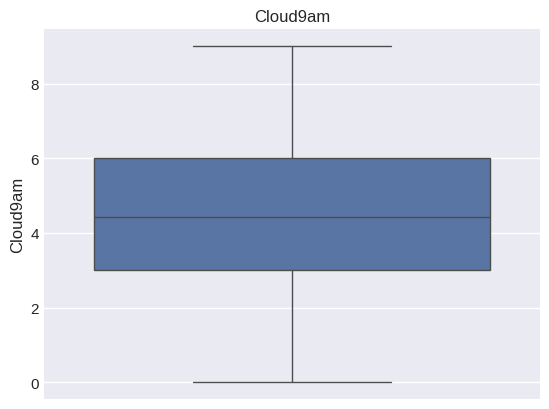

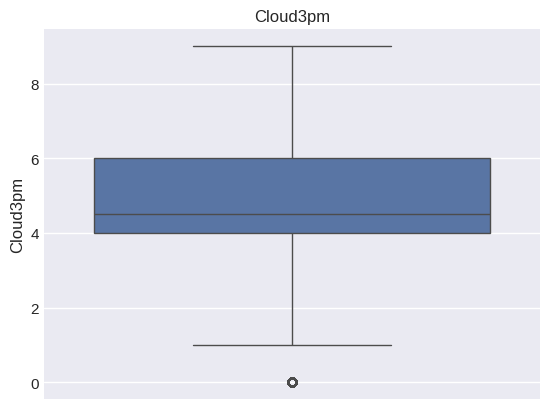

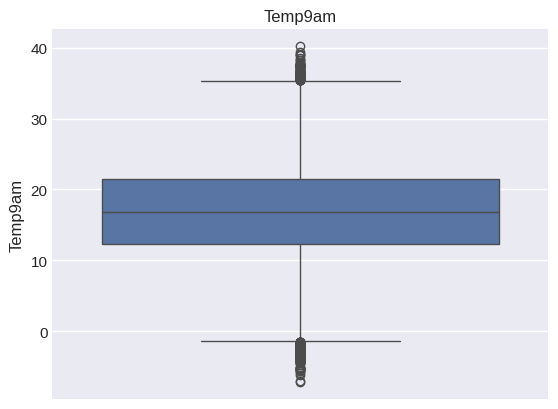

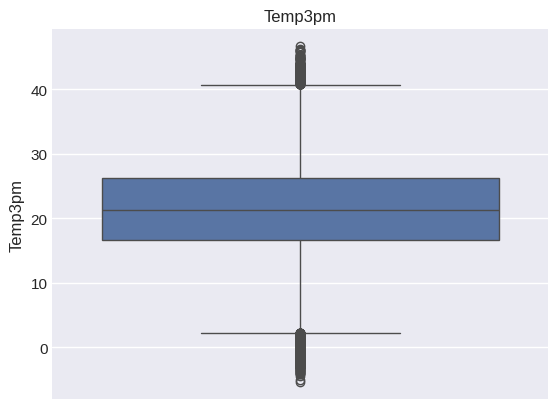

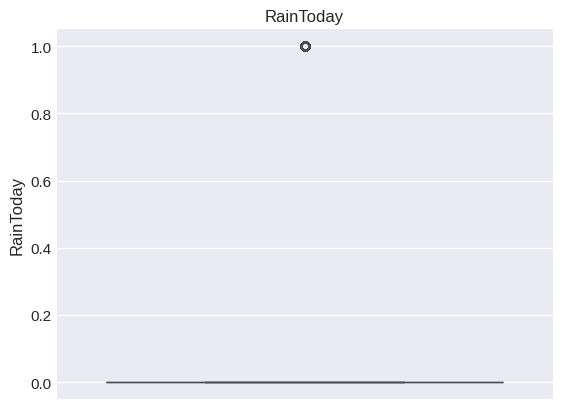

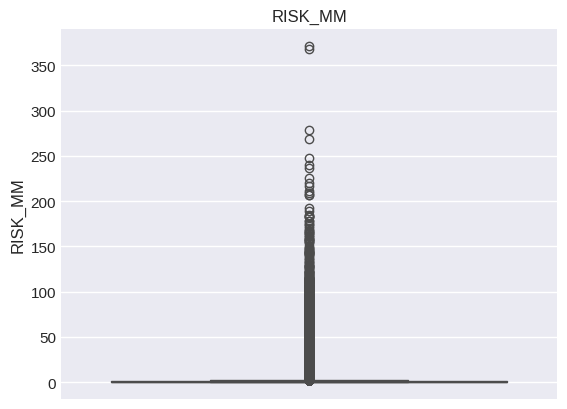

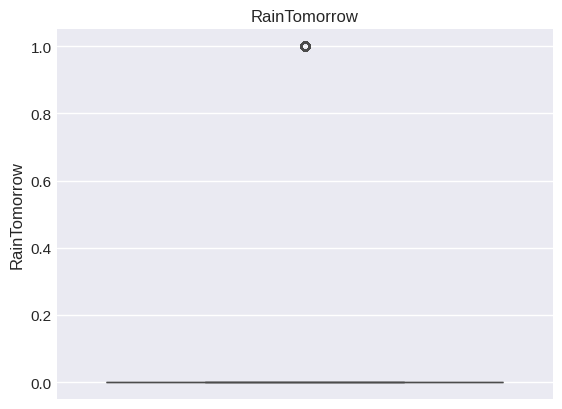

In [ ]:
num_vars = df.select_dtypes(include=['float64', 'int64'])
for col in num_vars.columns:
    plt.figure()
    plt.title(col)
    sb.boxplot(num_vars[col])
    plt.show()

Como los datos a pesar de no ser eliminados con la imputacion KNN y los metodos tradicionales se espera que la densidad de los datos se corrigiera y amotrigue la presencia de outliers para los modelos predictivos.

###**3.3. Correlación**

La correlación indica cuán asociadas se encuentran dos variables entre sí. Esta medida tiene un rango entre 1 y -1, donde:

1 = las variables se relacionan de forma directa.

0 = las variables no se relacionan.

-1 = las variables se relacionan inversamente.

Entre más cercano a cero sea la correlación, más débil es la relación entre las variables, en cambio entre má cercano a 1 (sea positivo o negativo) más fuerte es la relación.

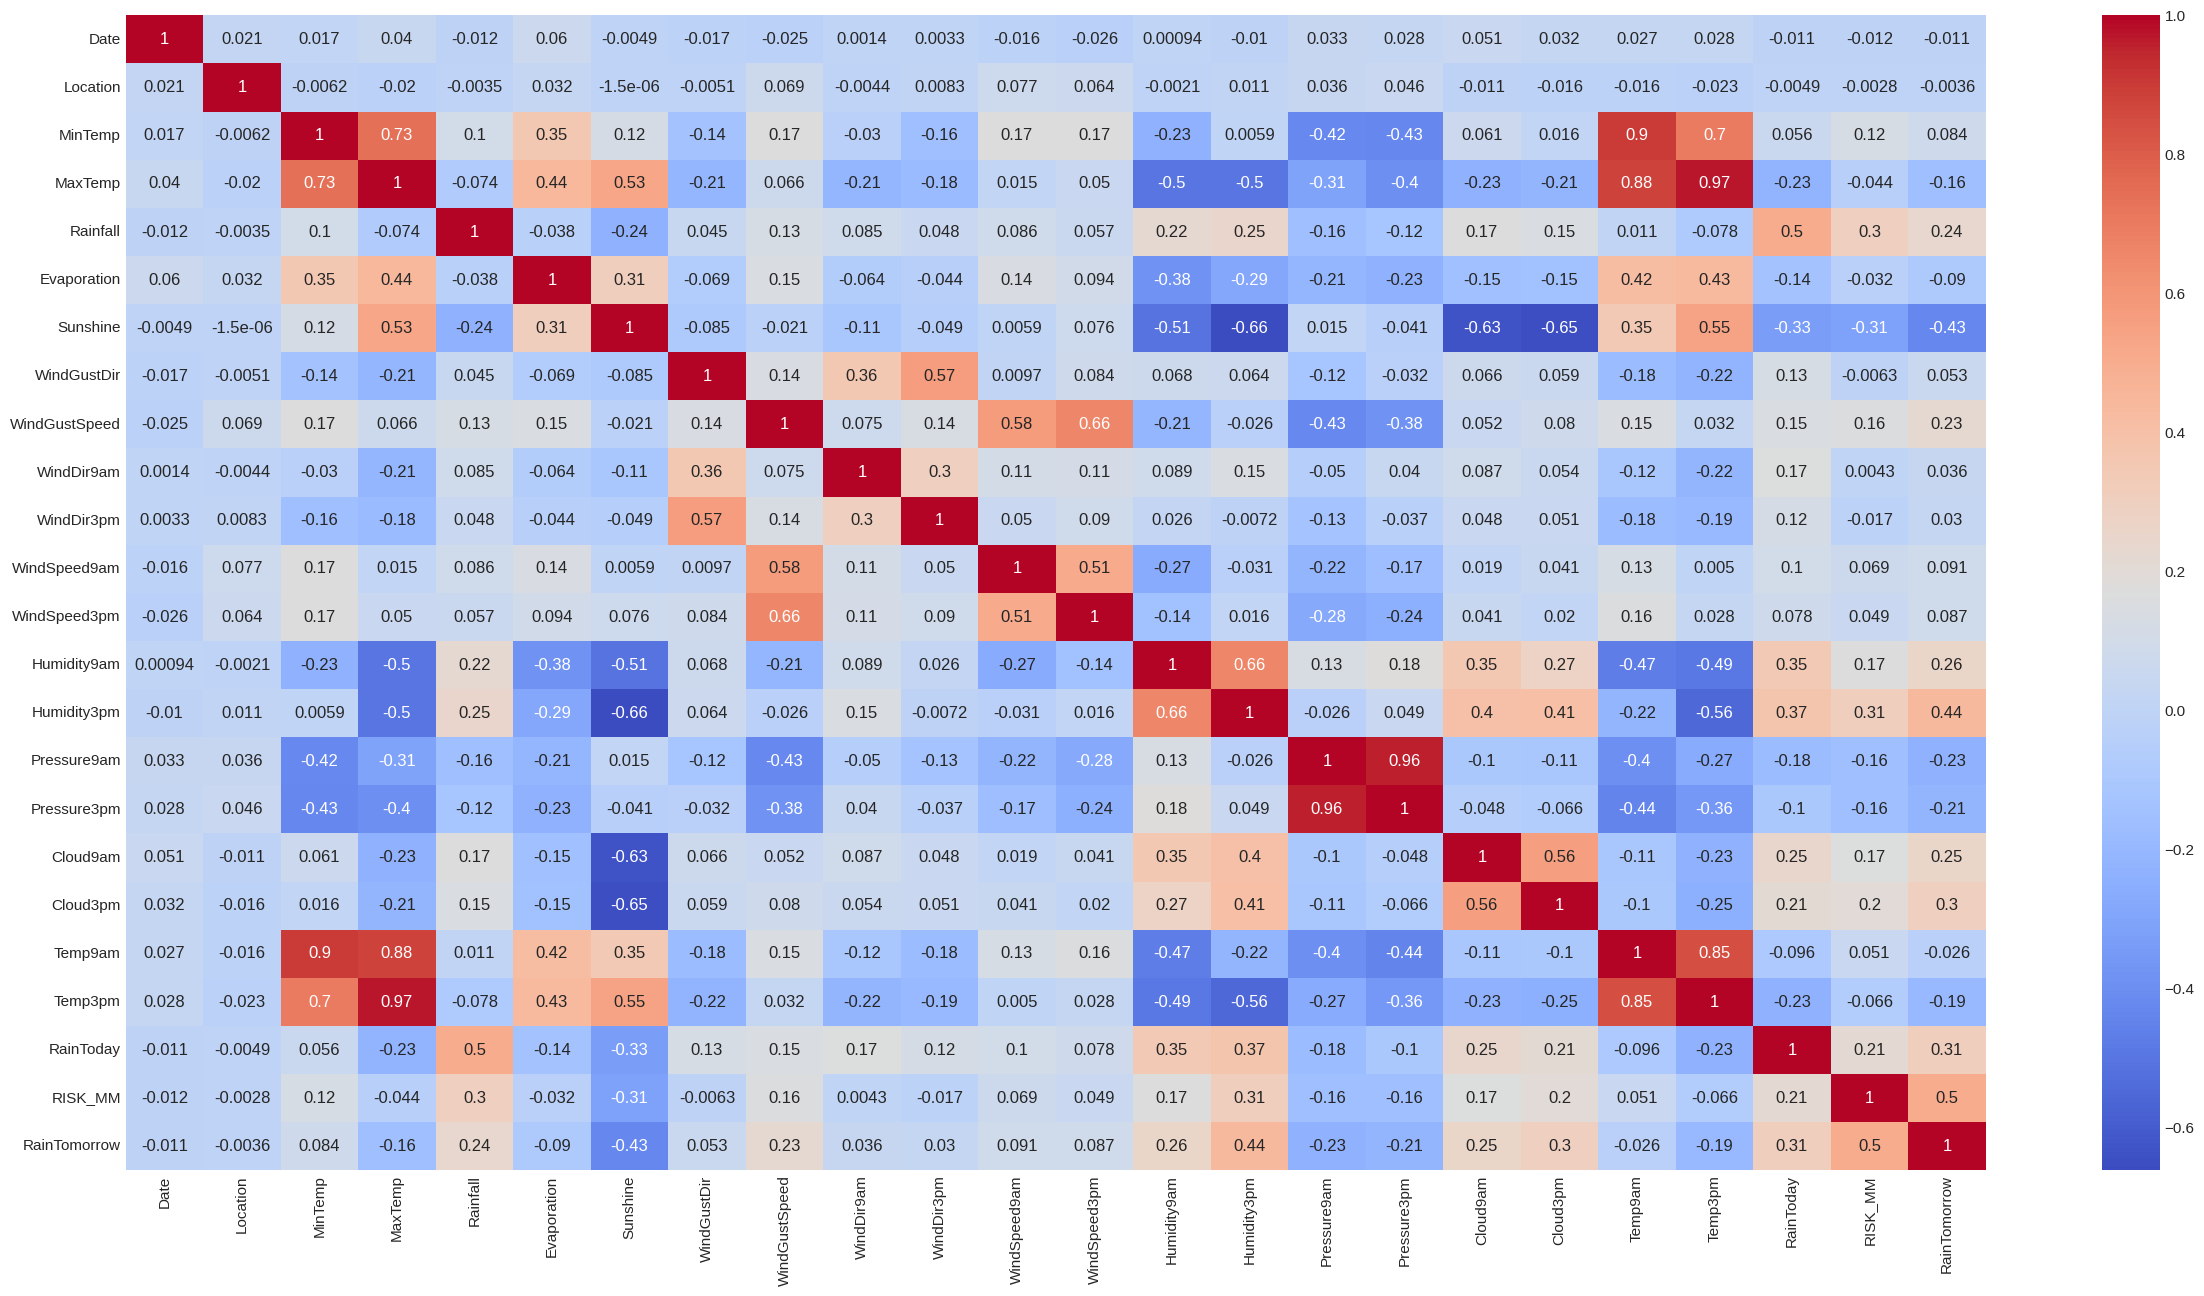

In [ ]:
corr = df.corr()
plt.figure(figsize=(30,15))
sb.heatmap(corr, cmap="coolwarm",annot=True)
plt.show()

Existen correlaciones muy elevadas entre las variables que vamos a utilizar, aqui algunos ejemplos.

In [ ]:
#Correlacion de todas las variables con Temp9am
corr_matrix = df.corr()
corr_matrix["Temp9am"].sort_values(ascending=False)

Temp9am          1.00
MinTemp          0.90
MaxTemp          0.88
Temp3pm          0.85
Evaporation      0.42
Sunshine         0.35
WindSpeed3pm     0.16
WindGustSpeed    0.15
WindSpeed9am     0.13
RISK_MM          0.05
Date             0.03
Rainfall         0.01
Location        -0.02
RainTomorrow    -0.03
RainToday       -0.10
Cloud3pm        -0.10
Cloud9am        -0.11
WindDir9am      -0.12
WindDir3pm      -0.18
WindGustDir     -0.18
Humidity3pm     -0.22
Pressure9am     -0.40
Pressure3pm     -0.44
Humidity9am     -0.47
Name: Temp9am, dtype: float64

In [ ]:
#Correlacion de todas las variables con Temp3pm
corr_matrix = df.corr()
corr_matrix["Temp3pm"].sort_values(ascending=False)

Temp3pm          1.00
MaxTemp          0.97
Temp9am          0.85
MinTemp          0.70
Sunshine         0.55
Evaporation      0.43
WindGustSpeed    0.03
WindSpeed3pm     0.03
Date             0.03
WindSpeed9am     0.01
Location        -0.02
RISK_MM         -0.07
Rainfall        -0.08
RainTomorrow    -0.19
WindDir3pm      -0.19
WindDir9am      -0.22
WindGustDir     -0.22
RainToday       -0.23
Cloud9am        -0.23
Cloud3pm        -0.25
Pressure9am     -0.27
Pressure3pm     -0.36
Humidity9am     -0.49
Humidity3pm     -0.56
Name: Temp3pm, dtype: float64

In [ ]:
#Correlacion de todas las variables con Humidity3pm
corr_matrix = df.corr()
corr_matrix["RainTomorrow"].sort_values(ascending=False)

RainTomorrow     1.00
RISK_MM          0.50
Humidity3pm      0.44
RainToday        0.31
Cloud3pm         0.30
Humidity9am      0.26
Cloud9am         0.25
Rainfall         0.24
WindGustSpeed    0.23
WindSpeed9am     0.09
WindSpeed3pm     0.09
MinTemp          0.08
WindGustDir      0.05
WindDir9am       0.04
WindDir3pm       0.03
Location        -0.00
Date            -0.01
Temp9am         -0.03
Evaporation     -0.09
MaxTemp         -0.16
Temp3pm         -0.19
Pressure3pm     -0.21
Pressure9am     -0.23
Sunshine        -0.43
Name: RainTomorrow, dtype: float64

In [ ]:
#Correlacion de todas las variables con Rainfall
corr_matrix = df.corr()
corr_matrix["Rainfall"].sort_values(ascending=False)

Rainfall         1.00
RainToday        0.50
RISK_MM          0.30
Humidity3pm      0.25
RainTomorrow     0.24
Humidity9am      0.22
Cloud9am         0.17
Cloud3pm         0.15
WindGustSpeed    0.13
MinTemp          0.10
WindSpeed9am     0.09
WindDir9am       0.09
WindSpeed3pm     0.06
WindDir3pm       0.05
WindGustDir      0.04
Temp9am          0.01
Location        -0.00
Date            -0.01
Evaporation     -0.04
MaxTemp         -0.07
Temp3pm         -0.08
Pressure3pm     -0.12
Pressure9am     -0.16
Sunshine        -0.24
Name: Rainfall, dtype: float64

In [ ]:
#Correlacion de todas las variables con Rainfall
corr_matrix = df.corr()
corr_matrix["RainTomorrow"].sort_values(ascending=False)

RainTomorrow     1.00
RISK_MM          0.50
Humidity3pm      0.44
RainToday        0.31
Cloud3pm         0.30
Humidity9am      0.26
Cloud9am         0.25
Rainfall         0.24
WindGustSpeed    0.23
WindSpeed9am     0.09
WindSpeed3pm     0.09
MinTemp          0.08
WindGustDir      0.05
WindDir9am       0.04
WindDir3pm       0.03
Location        -0.00
Date            -0.01
Temp9am         -0.03
Evaporation     -0.09
MaxTemp         -0.16
Temp3pm         -0.19
Pressure3pm     -0.21
Pressure9am     -0.23
Sunshine        -0.43
Name: RainTomorrow, dtype: float64

In [ ]:
#Correlacion
y = df['Temp9am']
x = df['MinTemp']
correlation = y.corr(x)
correlation

0.8979990294057543

Text(0.5, 0, 'Puntaje MinTemp')

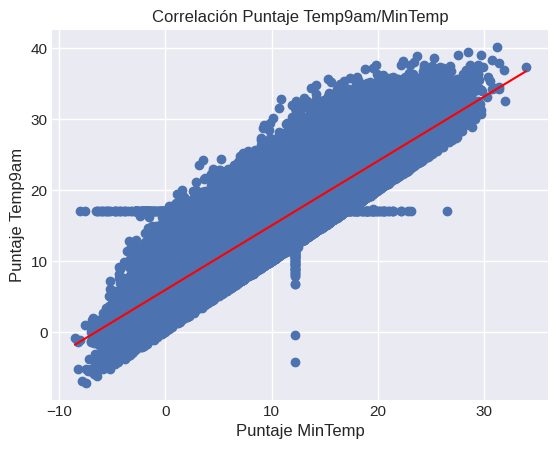

In [ ]:
#Diagrama de dispersion
plt.title('Correlación Puntaje Temp9am/MinTemp')
plt.scatter(x, y)

plt.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')

plt.ylabel("Puntaje Temp9am")
plt.xlabel("Puntaje MinTemp")

La correlacion entre estas es realmente buena y muy util para los modelos de las siguientes etapas del proyecto y tiene aun mas relevancia debido a que son variables objetivos para los modelos.

In [ ]:
#Correlacion
y = df['Rainfall']
x = df['Humidity3pm']
correlation = y.corr(x)
correlation

0.24960852977410977

Text(0.5, 0, 'Puntaje Humidity3pm')

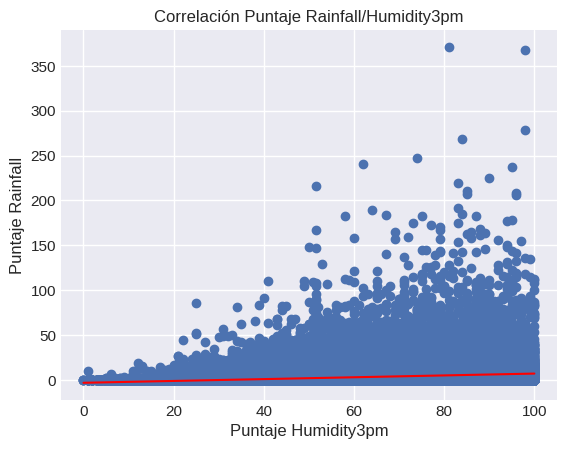

In [ ]:
#Diagrama de dispersion
plt.title('Correlación Puntaje Rainfall/Humidity3pm')
plt.scatter(x, y)

plt.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')

plt.ylabel("Puntaje Rainfall")
plt.xlabel("Puntaje Humidity3pm")

In [ ]:
y = df['RainTomorrow']
x = df['Humidity3pm']
correlation = y.corr(x)
correlation

0.4396783574771206

La correlacion no es tan directa per la importancia de estas variables es grande y aun asi sirven para los modelos predictivos.

Text(0.5, 0, 'Puntaje RainTomorrow')

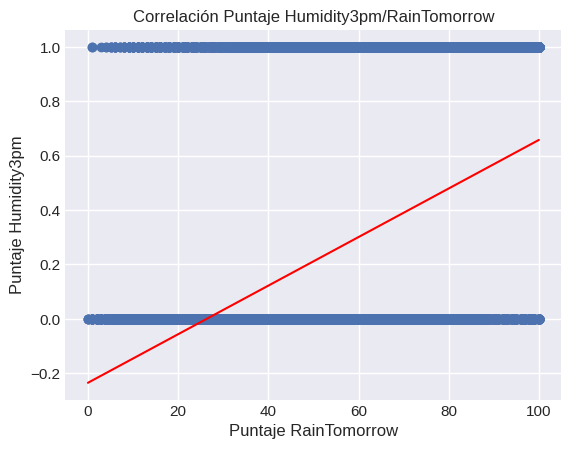

In [ ]:
#Diagrama de dispersion
plt.title('Correlación Puntaje Humidity3pm/RainTomorrow')
plt.scatter(x, y)

plt.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')

plt.ylabel("Puntaje Humidity3pm")
plt.xlabel("Puntaje RainTomorrow")

quiza esta correlacion no sea la mejor para graficar, pero aun asi es necesario revisar a plenitud el estado actual del dataset y mas si son variables objetivo.

Las tres variables tienen una alta correlación positiva.



---



##Conclusion

El tratamiento de las variables logra unos resultados satisfactorios para el desarrollo de los modelos predictivos de futuras entregas, aun asi se mantendra en evaluacion para saber si es necesario hacer mas cambios o no a futuro y la evaluacion con los outliers con los que cuenta el dataset, a manera de refleccion los datos que se entrega son muy ricos en cuanto a la imformacion que estos tienen y es realmente de importancia el correcto uso de estos ya que es muy facil descontextualizar y perder el norte en este tipo de trabajos.

In [ ]:
# Exportar los resultados a un archivo Excel
df.to_csv('WeatherAUSFinal.csv')
# index=False para no incluir el índice en el archivo

#**ETAPA IV: MODELADO**

Se utilizarán algoritmos supervisados para realizar tareas de Regresión y Clasificación.

In [ ]:
#Librerías de Python

import numpy as np #Programación vectorial
import pandas as pd #Estructura y manipulación de datos
import matplotlib.pyplot as plt #Visualización

import seaborn as sb #Gráficos

import warnings #Advertencias
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files #Importar archivo
uploaded = files.upload()

for fn in uploaded.keys():
    name=fn
data = pd.read_csv(name, sep=",")

Saving WeatherAUSFinal.csv to WeatherAUSFinal.csv


In [ ]:
data = data.drop(columns=['Date'])

In [ ]:
data = data.drop(columns=['Unnamed: 0'])

Eliminamos estas columnas debido a que su presencia no es util para la regesion y puede llegar a interferir en la mejora de los modelos.

In [ ]:
#Transformacion a Data Frame
df = pd.DataFrame(data)

#**Modelos Supervisados**

##1. Modelos de regresion

###**1.1 Modelo de Regresión Lineal**

####**1.1.1 Primer Modelo**

✅ Paso 1 - Definición de variables: Definimos la variable objetivo $Y$ y las variables predictoras $X$.

In [ ]:
#Variable dependiente
Y = pd.DataFrame(df['MaxTemp'])
Y.head()

MaxTemp
0     22.9
1     25.1
2     25.7
3     28.0
4     32.3

In [ ]:
#Variables independientes
X = df.drop(columns=['MaxTemp'])
X.head()

Location  MinTemp  Rainfall  Evaporation   Sunshine  WindGustDir  \
0         2     13.4       0.6     5.469824   7.382861           13   
1         2      7.4       0.0     5.469824   9.163396           14   
2         2     12.9       0.0     5.469824  10.586100           15   
3         2      9.2       0.0     5.469824   9.245500            4   
4         2     17.5       1.0     5.469824   6.058206           13   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           44.0          13          14          20.0  ...         22.0   
1           44.0           6          15           4.0  ...         25.0   
2           46.0          13          15          19.0  ...         30.0   
3           24.0           9           0          11.0  ...         16.0   
4           41.0           1           7           7.0  ...         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1  8.000000  4.503167     16.9     21.8          0   
1       1010.6       1007.8  4.437189  4.503167     17.2     24.3          0   
2       1007.6       1008.7  4.437189  2.000000     21.0     23.2          0   
3       1017.6       1012.8  4.437189  4.503167     18.1     26.5          0   
4       1010.8       1006.0  7.000000  8.000000     17.8     29.7          0   

   RISK_MM  RainTomorrow  
0      0.0             0  
1      0.0             0  
2      0.0             0  
3      1.0             0  
4      0.2             0  

[5 rows x 22 columns]

✅ Paso 2 - Modelo: Creación del modelo de Regresión Lineal

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
modelo_1 = LinearRegression()

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con $X$ e $Y$.

In [ ]:
modelo_1.fit(X, Y)

LinearRegression()

✅ Paso 4 - Predicción: Estimación de la variable $Y$ usando como entrada la variable $X$. Como resultado obtenemos $\hat Y$ (Y_hat).

En este caso, como el modelo fue entrenado con todos los datos, se realiza una predicción con datos dentro de la muestra (in-sample)

➡️ `in-sample`: Predicción con datos utilizados durante el entrenamiento del modelo. Esto se hace sólo par experimentar y comparar entre modelos, ya que en la práctica no sirve para generalizar nuevos valores estimados de $Y$, ya que tiende a subajustarse (underfitting) o sobreajustarse (overfitting).

In [ ]:
#Ŷ (Y gorro) = Y_hat
Y_hat = modelo_1.predict(X)

In [ ]:
#Se comparan los valores originales (observacion) de la variable objetivo Y con la
#la prediccion realizada por el modelo (estimacion de Y)
Y = Y.rename(columns={'MaxTemp': 'Observación (Y)'})
Y_hat = pd.DataFrame(Y_hat, columns = ['Estimación (Ŷ)'])
Comparacion = pd.merge(Y, Y_hat, left_index=True, right_index=True)
Comparacion["Diferencia"] = Comparacion["Observación (Y)"]-Comparacion["Estimación (Ŷ)"]
Comparacion.head(10)

Observación (Y)  Estimación (Ŷ)  Diferencia
0             22.9       23.380882   -0.480882
1             25.1       26.000217   -0.900217
2             25.7       25.356669    0.343331
3             28.0       27.411641    0.588359
4             32.3       30.340775    1.959225
5             29.7       30.184340   -0.484340
6             25.0       26.288683   -1.288683
7             26.7       26.496410    0.203590
8             31.9       31.384864    0.515136
9             30.1       28.961092    1.138908

Se pueden observar las diferencias entre el valor real y el valor estimado de Y.

Text(0, 0.5, 'Estimación (Ŷ)')

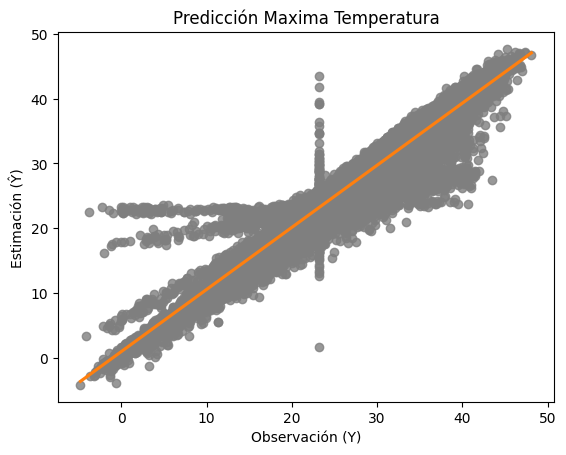

In [ ]:
#Grafico de comparacion entre la observacion y la estimacion de Y
sb.regplot(x=Y,y=Y_hat,ci=None, line_kws={"color": "C1"}, color='C7')
plt.title('Predicción Maxima Temperatura')
plt.xlabel('Observación (Y)')
plt.ylabel('Estimación (Ŷ)')

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas.

➡️ Métricas de error: Indican la diferencia entre el valor observado de la variable objetivo $Y$, y el valor estimado de ésta, $\hat Y$.



> ●   `Error Absoluto Medio (MAE)`: Es la medida del promedio de la diferencia absoluta entre el valor real de $Y$ y su valor estimado, $\hat Y$. Al usar valores absolutos evita la cancelación de errores negativos con positivos. Permite interpretar los resultados en las mismas unidades que la variable $Y$.

> ●   `Error Cuadrático Medio (MSE)`: Mide el cuadrado de la diferencia absoluta entre el valor real de $Y$ y su valor estimado,$\hat Y$, lo cual penaliza los errores mayores. Esta medida es muy susceptible a datos atípicos (outliers), ya que entre mayores sean estos, más grande se hará la medida del error.

> ●   `Raíz del Error Cuadrático Medio (RMSE)`: Es la raíz de la media de los errores elevados al cuadrado. Permite interpretar los resultados en las mismas unidades que la variable $Y$. Es la métrica más utilizada.

➡️ Métricas de desempeño: Miden el grado de precisión con el cual el modelo hace las estimaciones, $\hat Y$.

> `Coeficiente de determinación (r2)`: Examina cómo las diferencias en una variable $Y$ pueden ser explicadas por la diferencia en otra variable $X$. Evalúa la fuerza de la relación lineal entre dos variables. Esta relación, conocida como "bondad de ajuste", se representa como un valor entre 0 y 1. Entre más cercano a 1, mejor es el ajuste del modelo. Un valor de 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para predicciones futuras, mientras que un valor de 0 indicaría que el modelo no tienen ninguna precisión.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tools.eval_measures import rmse

In [ ]:
MAE_1 = mean_absolute_error(Y, Y_hat)
MSE_1 =  mean_squared_error(Y, Y_hat)
RMSE_1 = rmse(Y, Y_hat)
r2_1 = r2_score(Y, Y_hat)

In [ ]:
print("MAE: %.2f" % MAE_1 )
print("MSE: %.2f" % MSE_1)
print("RMSE: %.2f" % RMSE_1)
print('r2: %.2f' % r2_1)


MAE: 0.91
MSE: 2.17
RMSE: 1.47
r2: 0.96


Conclusión:
El modelo parece ser muy bueno considerando las métricas presentadas. Tiene una alta precisión (r2 de 0.96) y bajos errores de predicción (MAE de 0.91 y RMSE de 1.47). Esto sugiere que el modelo puede predecir los valores con gran exactitud y con pequeños errores en promedio.



####**1.1.2 Segundo Modelo**

➡️ `Normalización`: Se mejora el modelo transformando los datos para que sigan una distribución *normal estándar*. La normalización hace que los rangos de valores que puede tomar una serie de datos de una variable sea similar, para que no exista una variable que tenga mayor influencia que otra.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
col_names = df.columns
features = df[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_normalizado = pd.DataFrame(features, columns = col_names)

In [ ]:
df_normalizado.head()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0 -1.527004  0.189954 -0.045964 -0.207757          0.0 -0.014364     1.052556   
1 -1.527004 -0.749174  0.263480 -0.278989          0.0  0.543898     1.265582   
2 -1.527004  0.111694  0.347873 -0.278989          0.0  0.989967     1.478609   
3 -1.527004 -0.467436  0.671383 -0.278989          0.0  0.569640    -0.864683   
4 -1.527004  0.831692  1.276205 -0.160269          0.0 -0.429692     1.052556   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity3pm  Pressure9am  \
0       0.305648    1.328933    1.366277  ...    -1.435935    -1.475456   
1       0.305648   -0.221571    1.586236  ...    -1.289821    -1.045586   
2       0.457874    1.328933    1.586236  ...    -1.046299    -1.490279   
3      -1.216614    0.442931   -1.713146  ...    -1.728162    -0.007969   
4       0.077309   -1.329073   -0.173434  ...    -0.900186    -1.015940   

   Pressure3pm  Cloud9am      Cloud3pm   Temp9am   Temp3pm  RainToday  \
0    -1.220966  1.563959 -4.219974e-16 -0.013521  0.016412  -0.532962   
1    -1.116203  0.000000 -4.219974e-16  0.032832  0.380274  -0.532962   
2    -0.981508  0.000000 -1.189322e+00  0.619963  0.220175  -0.532962   
3    -0.367897  0.000000 -4.219974e-16  0.171889  0.700472  -0.532962   
4    -1.385593  1.124991  1.661439e+00  0.125537  1.166215  -0.532962   

    RISK_MM  RainTomorrow  
0 -0.278450     -0.537551  
1 -0.278450     -0.537551  
2 -0.278450     -0.537551  
3 -0.160497     -0.537551  
4 -0.254859     -0.537551  

[5 rows x 23 columns]



---



✅ Paso 1 - Definición de variables: Definimos la variable objetivo $Y$ y las variables predictoras $X$.

Dejamos la variable $Y$ del dataframe original:

In [ ]:
#Variable dependiente
Y = pd.DataFrame(df['MaxTemp'])
Y.head()

MaxTemp
0     22.9
1     25.1
2     25.7
3     28.0
4     32.3

Usamos las variables explicativas $X$ del dataframe normalizado:

In [ ]:
#Variables independientes
X_sc = df_normalizado.drop(columns=['MaxTemp'])
X_sc.head()

Location   MinTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0 -1.527004  0.189954 -0.207757          0.0 -0.014364     1.052556   
1 -1.527004 -0.749174 -0.278989          0.0  0.543898     1.265582   
2 -1.527004  0.111694 -0.278989          0.0  0.989967     1.478609   
3 -1.527004 -0.467436 -0.278989          0.0  0.569640    -0.864683   
4 -1.527004  0.831692 -0.160269          0.0 -0.429692     1.052556   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0       0.305648    1.328933    1.366277      0.677661  ...    -1.435935   
1       0.305648   -0.221571    1.586236     -1.130034  ...    -1.289821   
2       0.457874    1.328933    1.586236      0.564680  ...    -1.046299   
3      -1.216614    0.442931   -1.713146     -0.339167  ...    -1.728162   
4       0.077309   -1.329073   -0.173434     -0.791091  ...    -0.900186   

   Pressure9am  Pressure3pm  Cloud9am      Cloud3pm   Temp9am   Temp3pm  \
0    -1.475456    -1.220966  1.563959 -4.219974e-16 -0.013521  0.016412   
1    -1.045586    -1.116203  0.000000 -4.219974e-16  0.032832  0.380274   
2    -1.490279    -0.981508  0.000000 -1.189322e+00  0.619963  0.220175   
3    -0.007969    -0.367897  0.000000 -4.219974e-16  0.171889  0.700472   
4    -1.015940    -1.385593  1.124991  1.661439e+00  0.125537  1.166215   

   RainToday   RISK_MM  RainTomorrow  
0  -0.532962 -0.278450     -0.537551  
1  -0.532962 -0.278450     -0.537551  
2  -0.532962 -0.278450     -0.537551  
3  -0.532962 -0.160497     -0.537551  
4  -0.532962 -0.254859     -0.537551  

[5 rows x 22 columns]

✅ Paso 2 - Modelo: Creación del modelo de Regresión Lineal.

In [ ]:
modelo_2 = LinearRegression()

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con $X$ e $Y$.

In [ ]:
modelo_2.fit(X_sc, Y)

LinearRegression()

✅ Paso 4 - Predicción: Estimación de la variable $Y$ usando como entrada la variable $X$. Como resultado obtenemos $\hat Y$ (Y_hat).

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_2.predict(X_sc)

In [ ]:
Y = Y.rename(columns={'MaxTemp': 'Observación (Y)'})
Y_hat = pd.DataFrame(Y_hat, columns = ['Estimación (Ŷ)'])
Comparacion = pd.merge(Y, Y_hat, left_index=True, right_index=True)
Comparacion["Diferencia"] = Comparacion["Observación (Y)"]-Comparacion["Estimación (Ŷ)"]
Comparacion.head(10)

Observación (Y)  Estimación (Ŷ)  Diferencia
0             22.9       23.380882   -0.480882
1             25.1       26.000217   -0.900217
2             25.7       25.356669    0.343331
3             28.0       27.411641    0.588359
4             32.3       30.340775    1.959225
5             29.7       30.184340   -0.484340
6             25.0       26.288683   -1.288683
7             26.7       26.496410    0.203590
8             31.9       31.384864    0.515136
9             30.1       28.961092    1.138908

Text(0, 0.5, 'Estimación (Ŷ)')

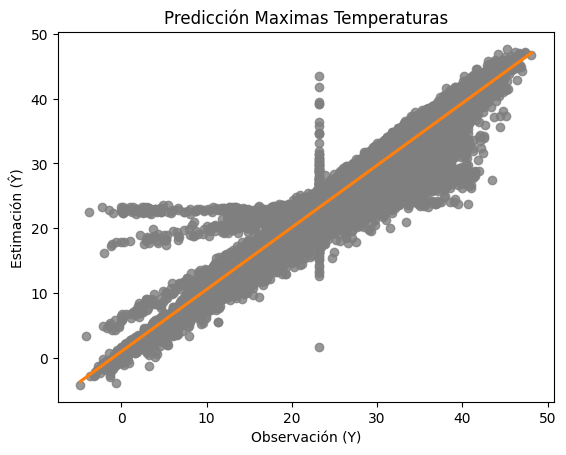

In [ ]:
sb.regplot(x=Y,y=Y_hat,ci=None, line_kws={"color": "C1"}, color='C7')
plt.title('Predicción Maximas Temperaturas')
plt.xlabel('Observación (Y)')
plt.ylabel('Estimación (Ŷ)')

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas.

In [ ]:
MAE_2 = mean_absolute_error(Y, Y_hat)
MSE_2 =  mean_squared_error(Y, Y_hat)
RMSE_2 = rmse(Y, Y_hat)
r2_2 = r2_score(Y, Y_hat)

In [ ]:
print("MAE: %.2f" % mean_absolute_error(Y, Y_hat))
print("MSE: %.2f" % mean_squared_error(Y, Y_hat))
print("RMSE: %.2f" % rmse(Y, Y_hat))
print('r2: %.2f' % r2_score(Y, Y_hat))


MAE: 0.91
MSE: 2.17
RMSE: 1.47
r2: 0.96


El modelo parece ser muy robusto y preciso. Tiene una alta capacidad de explicación de la variabilidad en los datos (r2 de 0.96) y mantiene errores de predicción bajos (MAE de 0.91 y RMSE de 1.47). Esto indica que el modelo es confiable para realizar predicciones con un alto grado de precisión y un bajo nivel de error.

####**1.1.3 Tercer Modelo**

✅ Paso 1 - Definición de variables: Definimos la variable objetivo $Y$ y las variables predictoras $X$.

➡️ `Split`: Se mejora el modelo realizando una separación (split) del set de datos en *conjunto de entrenamiento* y *conjunto de prueba*. Con esta partición el set de datos quedará dividido en 4 secciones: *Xtrain, Xtest, Ytrain, Ytest*.

> *   ● Conjunto de Entrenamiento (train): Porción de los datos que se utilizará para el entrenamiento del modelo. La sección de la variable $X$ de este conjunto queda almacenada en Xtrain y la variable $Y$ en Ytrain.
*   ● Conjunto de Prueba/Validación (test): Porción de los datos que se utilizará en el modelo para realizar predicciones y validar los resultados. La sección de la variable $X$ de este conjunto queda almacenada en Xtest y la variable $Y$ en Ytest.

Realizar esta división del set de datos ayuda a corregir errores de sobreajuste (overfitting) y subajuste (underfitting) que pueda tener el modelo.

In [ ]:
from sklearn.model_selection import train_test_split

La proporción en que se divide el set de datos se define en el argumento `test_size`, donde se indica el tamaño del conjunto de prueba.

In [ ]:
#Se define una proporcion 80/20, es decir un tamaño del conjunto de prueba de 0.2 (20%)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_sc,Y,test_size=0.2, random_state=123)

In [ ]:
#Conjunto de entrenamiento
print(Xtrain.shape)
print(Ytrain.shape)

(113754, 22)
(113754, 1)


In [ ]:
#Conjunto de prueba
print(Xtest.shape)
print(Ytest.shape)

(28439, 22)
(28439, 1)


✅ Paso 2 - Modelo: Creación del modelo de Regresión Lineal.

In [ ]:
modelo_3 = LinearRegression()

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain y Ytrain.

In [ ]:
modelo_3.fit(Xtrain, Ytrain)

LinearRegression()

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest. Como resultado obtenemos $\hat Y$ (Y_hat).

Se pone a prueba el modelo realizando una predicción con datos fuera de la muestra (out-of-sample).

➡️ `out-of-sample`: Predicción con datos que no han sido utilizados durante el entrenamiento del modelo. Esto se hace para evaluar cómo se desempeña el modelo con datos desconocidos, como lo son los datos del conjunto de prueba (Xtest), los cuales utilizamos para validar el modelo.

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_3.predict(Xtest)

In [ ]:
Ytest = Ytest.rename(columns={'MaxTemp': 'Observación (Y)'})
Y_hat = pd.DataFrame(Y_hat, columns = ['Estimación (Ŷ)'])
Comparacion = pd.merge(Ytest, Y_hat, left_index=True, right_index=True)
Comparacion["Diferencia"] = Comparacion["Observación (Y)"]-Comparacion["Estimación (Ŷ)"]
Comparacion.head(10)

Observación (Y)  Estimación (Ŷ)  Diferencia
17608             29.0       28.825600    0.174400
24167             18.8       19.251701   -0.451701
8582              14.6       20.156524   -5.556524
8173              22.5       11.855695   10.644305
17670             18.2       12.374782    5.825218
23780             17.9       29.891136  -11.991136
25518             17.8       22.031737   -4.231737
11654             27.9       22.239041    5.660959
23787             17.9       16.104226    1.795774
13723             24.0       29.494656   -5.494656

Text(0, 0.5, 'Estimación (Ŷ)')

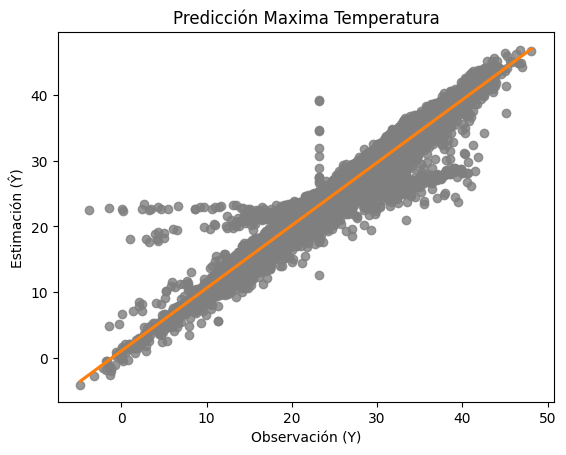

In [ ]:
sb.regplot(x=Ytest,y=Y_hat,ci=None, line_kws={"color": "C1"}, color='C7')
plt.title('Predicción Maxima Temperatura')
plt.xlabel('Observación (Y)')
plt.ylabel('Estimación (Ŷ)')

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas.

In [ ]:
MAE_3 = mean_absolute_error(Ytest, Y_hat)
MSE_3 =  mean_squared_error(Ytest, Y_hat)
RMSE_3 = rmse(Ytest, Y_hat)
r2_3 = r2_score(Ytest, Y_hat)

In [ ]:
print("MAE: %.2f" % MAE_3)
print("MSE: %.2f" % MSE_3)
print("RMSE: %.2f" % RMSE_3)
print('r2: %.2f' % r2_3)


MAE: 0.92
MSE: 2.22
RMSE: 1.49
r2: 0.96


El modelo muestra un excelente rendimiento en términos de precisión y error de predicción. Los valores de las métricas indican que el modelo tiene una alta capacidad de explicación de la variabilidad en los datos (r2 de 0.96) y mantiene errores de predicción bajos (MAE de 0.92 y RMSE de 1.49). Esto sugiere que el modelo es confiable para hacer predicciones con alta precisión y bajo error promedio.

El Mejor modelo sera guardado como pkl para su posterior uso

In [ ]:
import joblib

# Guardar el modelo en un archivo
joblib.dump(modelo_2, 'modelo_regresion.pkl')

['modelo_regresion.pkl']

###**1.2 Modelo de Árbol de Regresión**

####**1.2.1 Cuarto Modelo**

✅ Paso 1 - Definición de Variables: Utilizamos las variables $X$ e $Y$ previamente definidas, estandarizadas y divididas en conjunto de entrenamiento y test.

✅ Paso 2 - Modelo: Creación del modelo de Árbol de Regresión.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
modelo_4 = DecisionTreeRegressor()

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain y Ytrain.

In [ ]:
modelo_4.fit(Xtrain, Ytrain)

DecisionTreeRegressor()

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest. Como resultado obtenemos $\hat Y$ (Y_hat).

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_4.predict(Xtest)

In [ ]:
Ytest = Ytest.rename(columns={'MaxTemp': 'Observación (Y)'})
Y_hat = pd.DataFrame(Y_hat, columns = ['Estimación (Ŷ)'])
Comparacion = pd.merge(Ytest, Y_hat, left_index=True, right_index=True)
Comparacion["Diferencia"] = Comparacion["Observación (Y)"]-Comparacion["Estimación (Ŷ)"]
Comparacion.head(10)

Observación (Y)  Estimación (Ŷ)  Diferencia
17608             29.0            29.8        -0.8
24167             18.8            18.6         0.2
8582              14.6            20.5        -5.9
8173              22.5            11.3        11.2
17670             18.2            13.9         4.3
23780             17.9            30.8       -12.9
25518             17.8            22.1        -4.3
11654             27.9            20.8         7.1
23787             17.9            17.4         0.5
13723             24.0            28.7        -4.7

In [ ]:
from sklearn import tree

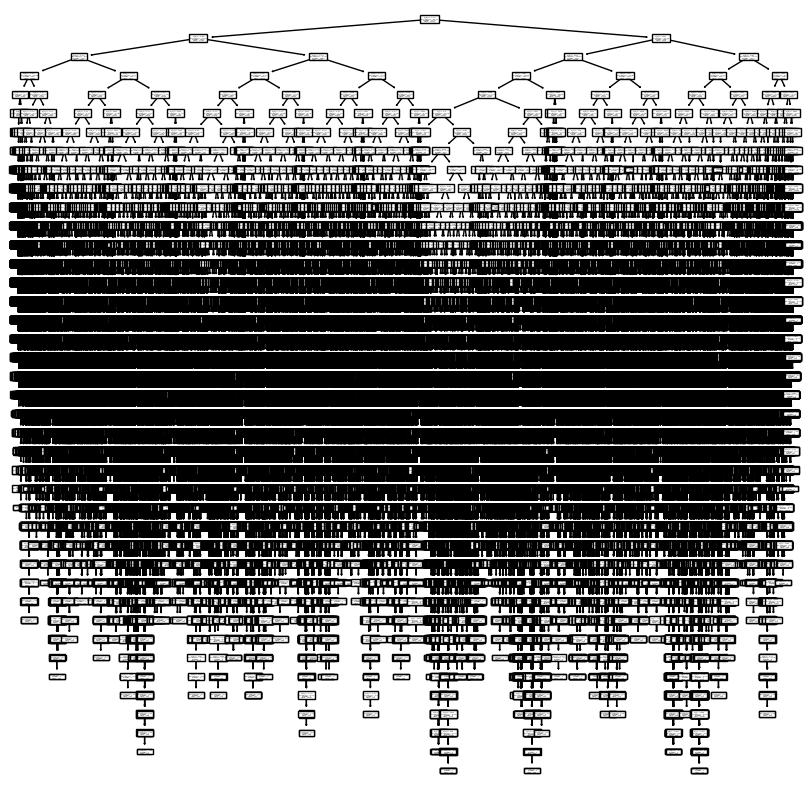

In [ ]:
plt.subplots(1,1,figsize=(10,10))
_= tree.plot_tree(modelo_4)

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas.

In [ ]:
import math

In [ ]:
MAE_4 = mean_absolute_error(Ytest, Y_hat)
MSE_4 =  mean_squared_error(Ytest, Y_hat)
RMSE_4 = math.sqrt(mean_squared_error(Ytest, Y_hat))
r2_4 = r2_score(Ytest, Y_hat)

In [ ]:
print("MAE: %.2f" % MAE_4)
print("MSE: %.2f" % MSE_4)
print("RMSE: %.2f" % RMSE_4)
print('r2: %.2f' % r2_4)


MAE: 0.94
MSE: 1.97
RMSE: 1.40
r2: 0.96


El modelo evaluado muestra un excelente rendimiento en términos de precisión y error de predicción. Los valores de las métricas indican que el modelo tiene una alta capacidad de explicación de la variabilidad en los datos (r2 de 0.96) y mantiene errores de predicción bajos (MAE de 0.94 y RMSE de 1.40). Esto sugiere que el modelo es confiable para hacer predicciones con alta precisión y bajo error promedio.

####**1.2.2 Quinto Modelo**

✅ Paso 1 - Definición de Variables: Utilizamos las variables $X$ e $Y$ previamente definidas, estandarizadas y divididas en conjunto de entrenamiento y test.

✅ Paso 2 - Modelo: Utilizamos el mismo modelo creado en los pasos anteriores para realizarle mejoras.

➡️`Tuning`: Mejoramos el modelo haciendo una sintonizacion (tuning), donde se modifican los hiperparámetros del modelo con el fin de mejorarlo. Los hiperparámetros son configuraciones que se establecen antes de entrenar el modelo y afectan el proceso de aprendizaje, pero no son aprendidos directamente del conjunto de datos durante el entrenamiento, por lo que deben ser introducidas manualmente.

Mejoramos el modelo cambiando el hiperparámetro `max_depth`, el cual indica el nivel máximo de profundidad al que puede llegar el árbol. Entre más niveles tenga, el árbol será más complejo, lo que puede mejorar el ajuste pero con riesgo de sobreajuste (overfitting)

In [ ]:
modelo_5 = DecisionTreeRegressor(max_depth=8)

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain y Ytrain.

In [ ]:
modelo_5.fit(Xtrain, Ytrain)

DecisionTreeRegressor(max_depth=8)

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest. Como resultado obtenemos $\hat Y$ (Y_hat).

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_5.predict(Xtest)

In [ ]:
Ytest = Ytest.rename(columns={'MaxTemp': 'Observación (Y)'})
Y_hat = pd.DataFrame(Y_hat, columns = ['Estimación (Ŷ)'])
Comparacion = pd.merge(Ytest, Y_hat, left_index=True, right_index=True)
Comparacion["Diferencia"] = Comparacion["Observación (Y)"]-Comparacion["Estimación (Ŷ)"]
Comparacion.head(10)

Observación (Y)  Estimación (Ŷ)  Diferencia
17608             29.0       29.641661   -0.641661
24167             18.8       19.143628   -0.343628
8582              14.6       20.467546   -5.867546
8173              22.5       12.061594   10.438406
17670             18.2       12.839734    5.360266
23780             17.9       29.984137  -12.084137
25518             17.8       22.185693   -4.385693
11654             27.9       21.804714    6.095286
23787             17.9       16.463390    1.436610
13723             24.0       29.264459   -5.264459

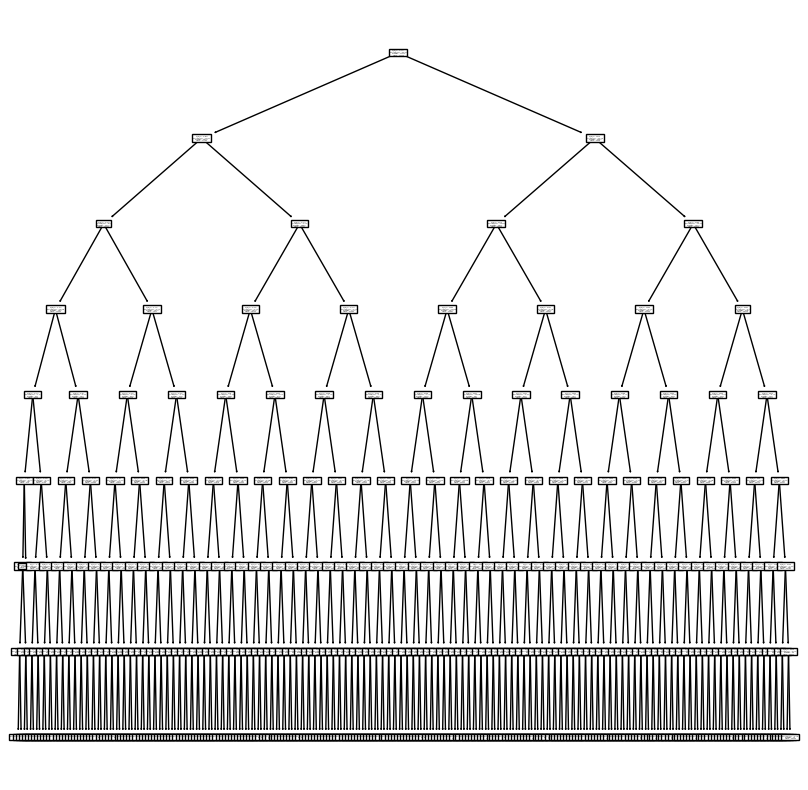

In [ ]:
plt.subplots(1,1,figsize=(10,10))
_= tree.plot_tree(modelo_5)

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas.

In [ ]:
MAE_5 = mean_absolute_error(Ytest, Y_hat)
MSE_5 =  mean_squared_error(Ytest, Y_hat)
RMSE_5 = math.sqrt(mean_squared_error(Ytest, Y_hat))
r2_5 = r2_score(Ytest, Y_hat)

In [ ]:
print("MAE: %.2f" % MAE_5)
print("MSE: %.2f" % MSE_5)
print("RMSE: %.2f" % RMSE_5)
print('r2: %.2f' % r2_5)

MAE: 0.77
MSE: 1.56
RMSE: 1.25
r2: 0.97


El modelo evaluado muestra un rendimiento excelente en términos de precisión y error de predicción. Los valores de las métricas indican que el modelo tiene una alta capacidad de explicación de la variabilidad en los datos (r2 de 0.97) y mantiene errores de predicción bajos (MAE de 0.77 y RMSE de 1.25). Esto sugiere que el modelo es muy confiable para hacer predicciones con alta precisión y bajo error promedio.

Mejor resultado como pkl para su uso posterior

In [ ]:
import joblib

# Guardar el modelo en un archivo
joblib.dump(modelo_5, 'modelo_arbol.pkl')

['modelo_arbol.pkl']

####**1.2.3 Sexto Modelo**

✅ Paso 1 - Definición de Variables: Utilizamos las variables $X$ e $Y$ previamente definidas, estandarizadas y divididas en conjunto de entrenamiento y test.

✅ Paso 2 - Modelo: Utilizamos el mismo modelo creado en los pasos anteriores para realizarle mejoras.

Adicional a `max_depth` (nivel máximo de profundidad del árbol), un árbol de decisión tiene otro hiperparámetro llamado `min_samples_split` (mínimo de muestras para la división del nodo). Este último hiperparámetro indica el número mínimo de muestras requeridas para dividir un nodo interno del árbol en subnodos (hijos) y entre más alto el valor, más simple será el árbol, pero con riesgo de subajuste (underfitting).

Probar manualmente ajustando ambos hiperparámetros hasta encontrar los valores óptimos puede tomar mucho tiempo, por lo que es mejor utilizar un algoritmo que ayude a encontrar la mejor combinación de éstos.

➡️ `GridSearchCV`: Método para realizar una búsqueda de los hiperparámetros del modelo. Es una técnica de validación cruzada que se ejecuta a través de los diferentes hiperparámetros que se introducen en la cuadrícula de hiperparámetros (matriz o grilla) y extrae los mejores valores y combinaciones de éstos.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Definición de hiperparámetros para crear la matriz (grilla):
params = {"max_depth": np.arange(3,6),          # [3,4,5]
          "min_samples_split": np.arange(2,5)}  # [2,3,4]

# Matriz resultante:
# [3,4,5]
# [2,3,4]

In [ ]:
#Búsqueda de los mejores hiperparámetros dentro de la matriz, usando como base el modelo anterior:
modelo_6 = GridSearchCV(estimator=modelo_5, param_grid=params,cv=10)

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain y Ytrain.

In [ ]:
modelo_6.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(max_depth=8),
             param_grid={'max_depth': array([3, 4, 5]),
                         'min_samples_split': array([2, 3, 4])})

Se obtienen los mejores hiperparámetros para el modelo.

In [ ]:
print(modelo_6.best_score_)
print(modelo_6.best_params_)

0.9547898219953564
{'max_depth': 5, 'min_samples_split': 2}


In [ ]:
#pd.DataFrame(grid.cv_results_)

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest. Como resultado obtenemos $\hat Y$ (Y_hat).

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_6.predict(Xtest)

In [ ]:
Ytest = Ytest.rename(columns={'MaxTemp': 'Observación (Y)'})
Y_hat = pd.DataFrame(Y_hat, columns = ['Estimación (Ŷ)'])
Comparacion = pd.merge(Ytest, Y_hat, left_index=True, right_index=True)
Comparacion["Diferencia"] = Comparacion["Observación (Y)"]-Comparacion["Estimación (Ŷ)"]
Comparacion.head(10)

Observación (Y)  Estimación (Ŷ)  Diferencia
17608             29.0       29.173972   -0.173972
24167             18.8       19.422581   -0.622581
8582              14.6       20.832386   -6.232386
8173              22.5       12.085102   10.414898
17670             18.2       13.844225    4.355775
23780             17.9       29.173972  -11.273972
25518             17.8       22.303597   -4.503597
11654             27.9       20.832386    7.067614
23787             17.9       15.948797    1.951203
13723             24.0       29.173972   -5.173972

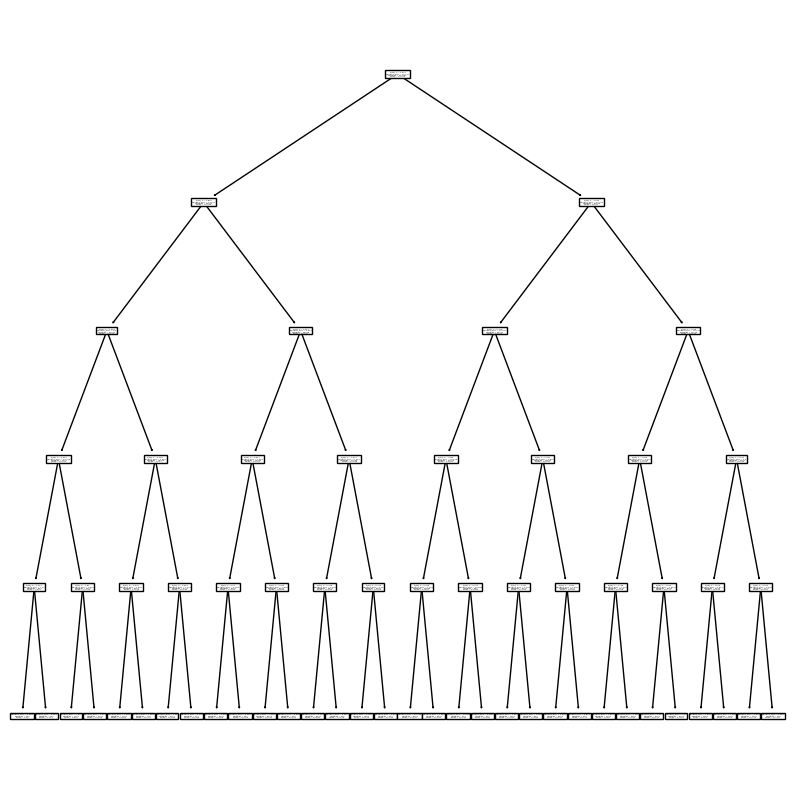

In [ ]:
plt.subplots(1,1,figsize=(10,10))
_= tree.plot_tree(modelo_6.best_estimator_)

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas.

In [ ]:
MAE_6 = mean_absolute_error(Ytest, Y_hat)
MSE_6 =  mean_squared_error(Ytest, Y_hat)
RMSE_6 = math.sqrt(mean_squared_error(Ytest, Y_hat))
r2_6 = r2_score(Ytest, Y_hat)

In [ ]:
print("MAE: %.2f" % MAE_6)
print("MSE: %.2f" % MSE_6)
print("RMSE: %.2f" % RMSE_6)
print('r2: %.2f' % r2_6)

MAE: 0.94
MSE: 2.42
RMSE: 1.56
r2: 0.95


El modelo muestra un buen rendimiento en términos de precisión y capacidad explicativa. Las métricas indican que el modelo tiene una alta capacidad de explicar la variabilidad en los datos (r2 de 0.95) y mantiene errores de predicción relativamente bajos (MAE de 0.94 y RMSE de 1.56).

###**1.3 Modelo Random Forest**

####**1.3.1 Septimo modelo**

✅ Paso 1 - Definición de variables: Definimos la variable objetivo $Y$ y las variables predictoras $X$.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tools.eval_measures import rmse

In [ ]:
from sklearn.model_selection import train_test_split

La proporción en que se divide el set de datos se define en el argumento `test_size`, donde se indica el tamaño del conjunto de prueba.

In [ ]:
#Se define una proporcion 80/20, es decir un tamaño del conjunto de prueba de 0.2 (20%)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2, random_state=123)

In [ ]:
#Conjunto de entrenamiento
print(Xtrain.shape)
print(Ytrain.shape)

(113754, 22)
(113754, 1)


In [ ]:
#Conjunto de prueba
print(Xtest.shape)
print(Ytest.shape)

(28439, 22)
(28439, 1)


✅ Paso 2 - Modelo: Creación del modelo Random Forest.

In [ ]:
modelo_7 = RandomForestRegressor(n_estimators=100, max_depth=10)

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain y Ytrain.

In [ ]:
modelo_7.fit(Xtrain, Ytrain)

RandomForestRegressor(max_depth=10)

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest. Como resultado obtenemos  Y^  (Y_hat).

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_7.predict(Xtest)

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas.

In [ ]:
import math
MAE_7 = mean_absolute_error(Ytest, Y_hat)
MSE_7 =  mean_squared_error(Ytest, Y_hat)
RMSE_7 = math.sqrt(mean_squared_error(Ytest, Y_hat))
r2_7 = r2_score(Ytest, Y_hat)

print("MAE: %.2f" % MAE_7)
print("MSE: %.2f" % MSE_7)
print("RMSE: %.2f" % RMSE_7)
print('r2: %.2f' % r2_7)

MAE: 0.70
MSE: 1.16
RMSE: 1.08
r2: 0.98


el modelo muestra un rendimiento sobresaliente. Tiene un bajo MAE, un bajo MSE, un bajo RMSE y un alto valor de R^2. Estos resultados sugieren que el modelo tiene una excelente capacidad de predicción y se ajusta bien a los datos.

In [ ]:
import joblib

# Guardar el modelo en un archivo
joblib.dump(modelo_7, 'modelo_rf7.pkl')

['modelo_rf7.pkl']

##**2. Modelos de Clasificación**

###**2.1 Regresión Logística**

➡️ `LogisticRegression()`: Se utiliza para realizar regresión logística, que es un algoritmo de clasificación binaria y multinomial. Esta clase implementa un modelo de regresión logística que se utiliza comúnmente para problemas de clasificación.

Parámetros:

> ●   `penalty`: Controla la regularización aplicada al modelo. Puede ser "l1", "l2", "elasticnet" o "none". La regularización ayuda a prevenir el sobreajuste. (predeterminado='l2')

> ●   `C`:  Inverso de la fuerza de regularización. Un valor más bajo de C implica una regularización más fuerte. Este parámetro permite controlar el equilibrio entre ajustar el modelo a los datos de entrenamiento y evitar el sobreajuste. (predeterminado=1.0)

> ●   `fit_intercept`: Si es True, se ajustará una constante (intercepto) al modelo. Si es False, no se ajustará un intercepto. (predeterminado=True)

> ●   `solver`: El algoritmo utilizado para optimizar los parámetros del modelo. Puede ser 'newton-cg', 'lbfgs', 'liblinear', 'sag' o 'saga'. La elección del solucionador puede afectar el rendimiento y la velocidad del modelo. (predeterminado='lbfgs')

> ●   `max_iter`: El número máximo de iteraciones permitidas para que el solucionador converja. (predeterminado=100)

> ●   `multi_class`: Controla cómo se manejan las clases en problemas de clasificación multiclase. Puede ser 'ovr' (One-Versus-Rest) o 'multinomial'. 'auto' ajusta automáticamente el enfoque en función del problema. (predeterminado='auto')

> ●   `tol`: Tolerancia para la convergencia del algoritmo.  (predeterminado=1e-4)

> ●   `class_weight`: Puede ser utilizado para asignar pesos a las clases en el modelo. Es útil cuando las clases están desequilibradas, donde se puede asignar un ratio o la opción automática 'balanced' para balancear los pesos de las clases. (predeterminado=None)

> ●   `random_state`: Semilla aleatoria para reproducibilidad de los resultados. (predeterminado=None)

####**2.1.1 Primer Modelo**

✅ Paso 1 - Definición de variables: Definimos la variable objetivo $Y$ y las variables predictoras $X$.

In [ ]:
#Variable dependiente
Y = pd.DataFrame(data['RainTomorrow'])
Y.sample(5)

RainTomorrow
80525              1
6342               0
71129              0
126716             1
142003             0

In [ ]:
#Variables independientes
X = data.drop(columns=['RainTomorrow'])
X.sample(5)

Location  MinTemp  MaxTemp   Rainfall  Evaporation   Sunshine  \
134669         3  23.6000     39.6   0.000000    18.800000  11.600000   
114430        29   4.1000     17.0   1.000000     5.469824   7.100000   
16544         24  12.1864     29.0   2.349974     5.469824   7.244557   
68152         18   7.7000     14.8   1.400000     1.600000   6.800000   
110538        46   8.1000     17.2  13.000000     5.469824   6.427539   

        WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity9am  \
134669            0      54.000000           2           2  ...     19.00000   
114430           13      31.000000           6          13  ...     68.00000   
16544            13      39.984292           3           9  ...     68.84381   
68152             3      33.000000           7          14  ...     71.00000   
110538           11      57.000000          12          11  ...     78.00000   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm    Temp9am  \
134669    15.000000  1010.600000  1005.800000  1.000000  5.000000  33.800000   
114430    50.000000  1018.100000  1014.200000  8.000000  8.000000  11.800000   
16544     51.482606  1017.653758  1015.258204  4.437189  4.503167  16.987509   
68152     48.000000  1019.500000  1019.200000  2.000000  7.000000   9.300000   
110538    83.000000  1006.200000  1012.200000  4.437189  4.503167  13.900000   

          Temp3pm  RainToday  RISK_MM  
134669  37.800000          0      0.0  
114430  16.000000          0      2.4  
16544   21.687235          0     38.2  
68152   14.700000          1      2.2  
110538  14.600000          1      4.4  

[5 rows x 22 columns]

➡️ `Split`: Se mejora el modelo realizando una separación (split) del set de datos en *conjunto de entrenamiento* y *conjunto de prueba*. Con esta partición el set de datos quedará dividido en 4 secciones: *Xtrain, Xtest, Ytrain, Ytest*.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Se define una proporcion 70/30, es decir un tamaño del conjunto de prueba de 0.3 (30%)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3, random_state=123)

In [ ]:
#Conjunto de entrenamiento
print(Xtrain.shape)
print(Ytrain.shape)

(99535, 22)
(99535, 1)


In [ ]:
#Conjunto de prueba
print(Xtest.shape)
print(Ytest.shape)

(42658, 22)
(42658, 1)


✅ Paso 2 - Modelo: Creación del modelo de Regresión Logística.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
modelo_c1 = LogisticRegression()

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain y Ytrain.

In [ ]:
modelo_c1.fit(Xtrain, Ytrain)

LogisticRegression()

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest. Como resultado obtenemos $\hat Y$ (Y_hat).

Se pone a prueba el modelo realizando una predicción con datos fuera de la muestra (out-of-sample).

➡️ `out-of-sample`: Predicción con datos que no han sido utilizados durante el entrenamiento del modelo. Esto se hace para evaluar cómo se desempeña el modelo con datos desconocidos, como lo son los datos del conjunto de prueba (Xtest), los cuales utilizamos para validar el modelo.

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c1.predict(Xtest)

In [ ]:
Ytest = Ytest.rename(columns={'Estado': 'Observación (Y)'})
Y_hat = pd.DataFrame(Y_hat, columns = ['Estimación (Ŷ)'])
Comparacion = pd.merge(Ytest, Y_hat, left_index=True, right_index=True)
Comparacion.head(10)

RainTomorrow  Estimación (Ŷ)
32292             0               0
17608             0               0
24167             0               0
42393             1               0
8582              1               0
29123             0               0
8173              1               0
33689             0               0
17670             1               1
23780             1               0

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas derivadas de la matriz de confusión.

➡️ Matriz de Confusión: Es una tabla resumida que se utiliza para evaluar el rendimiento de un modelo de clasificación. El número de predicciones correctas e incorrectas se resumen con los valores de conteo y se desglosan por cada clase. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias de la clase real.

Para una variable categórica binaria se tienen 2 clases de $Y$:
*   *Positiva (P)*: La observación es positiva (1).
*   *Negativa (N)*: La observación NO es positiva (0).

De estas clases se derivan 4 resultados posibles que se derivan del cruce entre los resultados reales $Y$ (observación) y los resultados estimados $\hat Y$ (predicción):
> ●   `Verdadero Positivo (VP)`: Resultado donde el modelo predice correctamente la clase positiva.

> ●   `Falso Positivo (FP o error de tipo I)`: Resultado donde el modelo predice incorrectamente la clase positiva cuando en realidad es negativa.

> ●   `Verdadero Negativo (VN)`: Resultado donde el modelo predice correctamente la clase negativa.

> ●   `Falso Negativo (FN o error de tipo II)`: Resultado en el que el modelo predice incorrectamente la clase negativa cuando en realidad es positiva.

Estos resultados 4 resultados se resumen en la matriz de confusión:

In [ ]:
print("    | 0 | VN | FP |")
print(" (Y)| 1 | FN | VP |")
print("    ----|----|----|")
print("        | 0  |  1 |")
print("            (Ŷ)    ")

    | 0 | VN | FP |
 (Y)| 1 | FN | VP |
    ----|----|----|
        | 0  |  1 |
            (Ŷ)    


Cada resultado corresponde a un cuadrante de la matriz:
*   VP = [1][1] -> La clase real es 1 y el modelo estima 1
*   FP = [0][1] -> La clase real es 0 y el modelo estima 1
*   VN = [0][0] -> La clase real es 0 y el modelo estima 0
*   FN = [1][0] -> La clase real es 1 y el modelo estima 0

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#Matriz de confusion
matriz = confusion_matrix(Ytest, Y_hat)
matriz

array([[32914,   203],
       [  260,  9281]])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

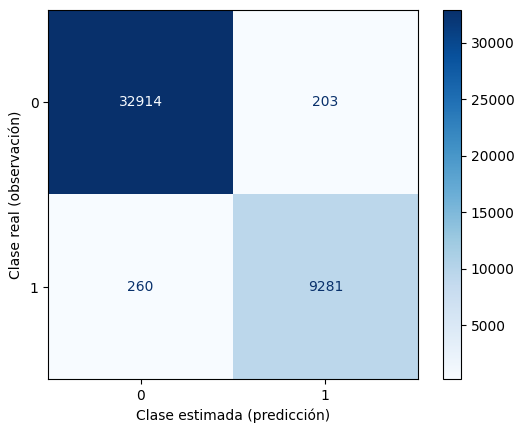

In [ ]:
grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c1.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 9281
Falsos positivos (FP): 203
Verdaderos negativos (VN): 32914
Falsos negativos (FN): 260


Una vez realizada la matriz de confusión, se pueden calcular un conjunto de métricas que relacionan los resultados de la matriz con el desempeño del modelo, donde se mide la diferencia entre la clase real (observación) de la variable objetivo $Y$ y la clase estimada (predicción) de ésta $\hat Y$.
Todas estas métricas son ratios que permiten realizar comparaciones entre varios modelos.

➡️ Métricas de error: El resultado de estas métricas fluctúan entre 0 y 1. Una puntuación más cercana a 0 indica un mejor modelo (con menor error) y viceversa.

> ●   `Tasa de FP`: Es la probabilidad de que se produzca una falsa alarma, es decir, que se dé un resultado positivo cuando el valor verdadero sea negativo. Se le conoce como 'Error de tipo I'.

               FP/(FP+VN)

> ●   `Tasa de FN`: Es la probabilidad de que el algoritmo pase por alto los verdaderos positivos. Se le conoce como 'Error de tipo II'.

               FN/(FN+VP)

In [ ]:
#Tasa de error
Tasa_FP_1 = FP/(FP+VN)
Tasa_FN_1 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_1 )
print("Error tipo II: %.2f" % Tasa_FN_1 )

Error tipo I: 0.01
Error tipo II: 0.03


➡️ Métricas de desempeño: El resultado de estas métricas fluctúan entre 0 y 1. Una puntuación más cercana a 1 indica un mejor modelo  y viceversa.

> ●   `Accuracy`: Exactitud del modelo. Mide la proporción de predicciones que el modelo clasificó correctamente. Es una medida global de desempeño para todas las clases (positivas y negativas).

               (VP+VN)/(VP+FP+FN+VN)

> ●   `Precision`: Indica la dispersión del conjunto de valores obtenidos a partir de mediciones repetidas de una magnitud. Cuanto menor es la dispersión mayor la precisión. Muestra la proporción de clases positivas correctamente detectadas entre todos los resultados positivos estimados, sean verdaderos o falsos (VP y FP). Es útil únicamente cuando se tienen clases balanceadas (la cantidad de casos de la clase 0 y de las clase 1 tienen magnitudes similares)

                    VP/(VP+FP)

Para clasificación binaria, la métrica `Recall` tiene dos lecturas:

> ●   `Sensitivity`: Para la clase positiva indica la tasa de verdaderos positivos (VP). Es la proporción de casos positivos que fueron correctamente identificadas por el algoritmo.

                    VP/(VP+FN)

> ●   `Specificity`: Para la clase negativa indica la tasa de verdaderos negativos (VN). Es la proporción de casos negativos que fueron correctamente identificadas por el algoritmo.

                    VN/(VN+FP)

> ●   `F1-score`: Combina Precision y Recall en una sola métrica, calculando la media armónica entre ambas. Es útil si se  tiene una distribución de clases desigual (desbalanceada).

          2 x Precision x Recall/(Precision x Recall)

Conforme a estas métricas podemos obtener  cuatro casos posibles para cada clase:

1. Alta precisión y alto recall: el modelo de Machine Learning escogido maneja perfectamente esa clase.

2. Alta precisión y bajo recall: el modelo de Machine Learning escogido no detecta la clase muy bien, pero cuando lo hace es altamente confiable.

3. Baja precisión y alto recall: El modelo de Machine Learning escogido detecta bien la clase,  pero también incluye muestras de la otra clase.

4. Baja precisión y bajo recall: El modelo de Machine Learning escogido no logra clasificar la clase correctamente.

Cuando tenemos un conjunto de datos desbalanceado, suele ocurrir que obtenemos un alto valor de precisión en la clase mayoritaria y un bajo recall en la clase minoritaria y por ello tenemos que recurrir al balanceo de clases.

✅ Recomendaciones:

▶ Elija mayor Precisión si quiere estar más seguro de sus verdaderos positivos.

▶ La Sensibilidad le servirá para saber si no está perdiendo positivos.

▶ Utilice una Sensibilidad alta cuando la aparición de falsos negativos le resulta inaceptable pero no le importa tener falsos positivos adicionales (falsas alarmas).

▶ Elija alta Especificidad si desea identificar los verdaderos negativo o cuando no desea falsos positivos.

➡️ Otras métricas: El reporte de clasificación que muestra python contiene las métricas vistas anteriormente y además, otras métricas que sirven de guía:

`Support` es la cantidad total de registros de cada clase, la cual debe coincidir con las proporciones calculadas inicialmente.

`Macro avg` indica el promedio de cada métrica para ambas clases.

`Weighted avg` indica el promedio ponderado de cada métrica para ambas clases, considerando la proporción de las clases. Si la proporción de las clases son equilibradas, *macro avg* y *weighted avg* serán iguales. En cambio, si la proporcion de las clases es muy desigual, las metricas de *macro avg* y *weighted avg* serán distintas.

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
#Tabla resumen
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     33117
           1       0.98      0.97      0.98      9541

    accuracy                           0.99     42658
   macro avg       0.99      0.98      0.98     42658
weighted avg       0.99      0.99      0.99     42658



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#Accuracy
SCORE_1 = accuracy_score(Ytest,Y_hat)
print("ACCURACY: %.2f" % SCORE_1 )

ACCURACY: 0.99


Mejor modelo de los tres a guardar en pkl para su uso posterior

In [ ]:
import joblib

# Guardar el modelo en un archivo
joblib.dump(modelo_c1, 'modelo_rl1.pkl')

['modelo_rl1.pkl']

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
#F1-Score
f1_1 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_1 )

F1-Score: 0.98


####**2.1.2 Segundo Modelo**

✅ Paso 1 - Definición de Variables: Utilizamos las variables $X$ e $Y$ previamente definidas y divididas en conjunto de entrenamiento y test.

➡️ `Normalización`: Se transforman los datos para que sigan una distribución *normal estándar*. La normalización hace que los rangos de valores que puede tomar una serie de datos de una variable sea similar, para que no exista una variable que tenga mayor influencia que otra.

---
⚠️ **NOTA** ⚠️

> ✔️ Se normaliza solamente la variable $X$.

> ⛔ La variable $Y$ no debe ser normalizada ya que perderíamos la información de cada clase.
---

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

scaler.fit(Xtrain)
Xtrain_sc= scaler.transform(Xtrain)

scaler.fit(Xtest)
Xtest_sc= scaler.transform(Xtest)

✅ Paso 2 - Modelo: Creación del modelo de Regresión Logística.

In [ ]:
modelo_c2 = LogisticRegression(class_weight='balanced', random_state=123)

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain normalizada y Ytrain.

In [ ]:
modelo_c2.fit(Xtrain_sc, Ytrain)

LogisticRegression(class_weight='balanced', random_state=123)

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest normalizada. Como resultado obtenemos $\hat Y$ (Y_hat).

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c2.predict(Xtest_sc)

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas derivadas de la matriz de confusión.

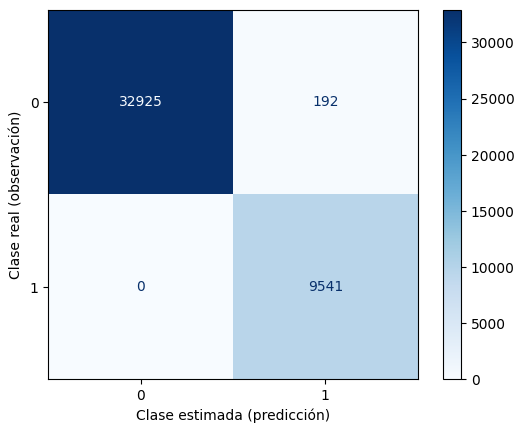

In [ ]:
#Matriz de confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c2.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 9541
Falsos positivos (FP): 192
Verdaderos negativos (VN): 32925
Falsos negativos (FN): 0


In [ ]:
#Tasa de error
Tasa_FP_2 = FP/(FP+VN)
Tasa_FN_2 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_2 )
print("Error tipo II: %.2f" % Tasa_FN_2 )

Error tipo I: 0.01
Error tipo II: 0.00


In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     33117
           1       0.98      1.00      0.99      9541

    accuracy                           1.00     42658
   macro avg       0.99      1.00      0.99     42658
weighted avg       1.00      1.00      1.00     42658



In [ ]:
#Accuracy
SCORE_2 = accuracy_score(Ytest,Y_hat)
print("ACCURACY: %.2f" % SCORE_2 )

#F1-Score
f1_2 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_2 )

ACCURACY: 1.00
F1-Score: 0.99


El modelo cuenta con un accuracy de 1.00 y un F1 Score de 0.99 esto se considera que es perfectamente preciso, aun asi, se considera que el modelo está sobreajustado.

####**2.1.3 Tercer Modelo**

✅ Paso 1 - Definición de Variables: Utilizamos las variables $X$ e $Y$ previamente definidas y divididas en conjunto de entrenamiento y test.

✅ Paso 2 - Modelo: Creación del modelo de Regresión Logística.

In [ ]:
modelo_c3 = LogisticRegression(penalty='l1', C=0.5, solver='liblinear', class_weight={0: 1, 1: 5}, random_state=123)

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain normalizada y Ytrain.

In [ ]:
modelo_c3.fit(Xtrain_sc, Ytrain)

LogisticRegression(C=0.5, class_weight={0: 1, 1: 5}, penalty='l1',
                   random_state=123, solver='liblinear')

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest normalizada. Como resultado obtenemos $\hat Y$ (Y_hat).

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c3.predict(Xtest_sc)

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas derivadas de la matriz de confusión.

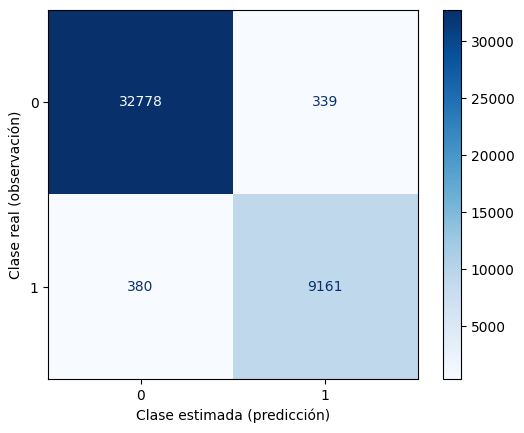

In [ ]:
#Matriz de confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c3.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 9161
Falsos positivos (FP): 339
Verdaderos negativos (VN): 32778
Falsos negativos (FN): 380


In [ ]:
#Tasa de error
Tasa_FP_3 = FP/(FP+VN)
Tasa_FN_3 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_3 )
print("Error tipo II: %.2f" % Tasa_FN_3 )

Error tipo I: 0.01
Error tipo II: 0.04


In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     33117
           1       0.96      0.96      0.96      9541

    accuracy                           0.98     42658
   macro avg       0.98      0.97      0.98     42658
weighted avg       0.98      0.98      0.98     42658



In [ ]:
#Accuracy
SCORE_3 = accuracy_score(Ytest,Y_hat)
print("ACCURACY: %.2f" % SCORE_3 )

#F1-Score
f1_3 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_3 )

ACCURACY: 0.98
F1-Score: 0.96


El mejor de los modelo por su buen desempeño.

In [ ]:
import joblib

# Guardar el modelo en un archivo
joblib.dump(modelo_c3, 'modelo_rl3.pkl')

['modelo_rl3.pkl']

➡️ `SVC()`: Máquinas de Soporte Vectorial de Clasificación se utiliza para clasificar puntos de datos en dos o más clases, encontrando el hiperplano que mejor separa las clases en el espacio de características.

Parámetros:

> ●   `kernel`:  especifica el tipo de kernel a utilizar en el modelo SVR. Algunas opciones comunes son 'linear' (kernel lineal), 'poly' (kernel polinómico), 'rbf' (kernel radial), entre otros. Un kernel es una función matemática que se utiliza para transformar los datos de entrada desde un espacio de características original a un espacio de características de mayor dimensión. (predeterminado='rbf')

> ●   `degree`:  Solo se utiliza cuando kernel='poly'. Controla el grado del polinomio para el núcleo polinómico. (predeterminado=3)

> ●   `C`: Controla el término de regularización en SVR. Determina el equilibrio entre la maximización del margen y la minimización del error de regresión. Valores más grandes de C permiten un margen más pequeño pero pueden reducir el error de entrenamiento, lo que podría llevar a un sobreajuste. (predeterminado=1.0)

> ●   `gamma`: Este parámetro es relevante solo para algunos kernels, como el kernel 'rbf' (radial basis function) y el kernel 'poly' (polinómico). Controla la influencia de los puntos de datos en la función de decisión. Valores más pequeños de gamma dan como resultado una función de decisión más suave, mientras que valores más grandes hacen que la función sea más sensible a los puntos de datos cercanos. (predeterminado= 'scale' (valor que depende de la escala de las características) para 'rbf' y 'auto' (1/n_features) para 'poly' y 'sigmoid'.)

> ●   `coef0`: Solo se utiliza en los núcleos 'poly' y 'sigmoid'. Controla la constante independiente en estas funciones de kernel. (predeterminado=0)

> ●   `class_weight`: Permite asignar pesos a las clases para manejar conjuntos de datos desbalanceados. Se establece en 'balanced' para asignar automáticamente pesos inversamente proporcionales a las frecuencias de clase en los datos de entrenamiento. (predeterminado=None)

In [ ]:
from sklearn.svm import SVC

In [ ]:
modelo_c16 = SVC(C=1, class_weight='balanced')

###**2.2 Random Forest**

####**2.2.1 Primera Modelo**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
md_rf_1 = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2,min_samples_leaf=2,class_weight='balanced')

In [ ]:
md_rf_1.fit(Xtrain_sc, Ytrain)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2)

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = md_rf_1.predict(Xtest_sc)

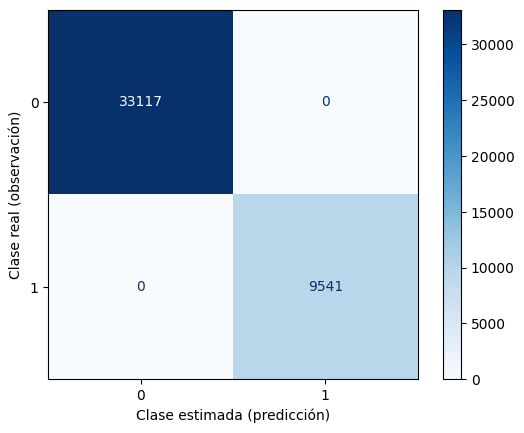

In [ ]:
#Matriz de Confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=md_rf_1.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 9541
Falsos positivos (FP): 0
Verdaderos negativos (VN): 33117
Falsos negativos (FN): 0


In [ ]:
#Tasa de error
Tasa_FP_14 = FP/(FP+VN)
Tasa_FN_14 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_14)
print("Error tipo II: %.2f" % Tasa_FN_14)

Error tipo I: 0.00
Error tipo II: 0.00


In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33117
           1       1.00      1.00      1.00      9541

    accuracy                           1.00     42658
   macro avg       1.00      1.00      1.00     42658
weighted avg       1.00      1.00      1.00     42658



In [ ]:
#Accuracy
SCORE_14 = md_rf_1.score(Xtest_sc,Ytest)
print("ACCURACY: %.2f" % SCORE_14)

#F1-Score
f1_14 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_14)

ACCURACY: 1.00
F1-Score: 1.00


sobre ajustado, no sirve


In [ ]:
joblib.dump(md_rf_1,'Modelo_Clasificacion_Random_Forest_1.pkl')

['Modelo_Clasificacion_Random_Forest_1.pkl']

####**2.2.2 Segundo Modelo**

✅ Paso 1 - Definición de variables: Utilizamos las variables $X$ e $Y$ previamente definidas y divididas en conjunto de entrenamiento y prueba.

✅ Paso 2 - Modelo: Creación del modelo SVM.

In [ ]:
modelo_c17 = SVC(C=5.0,class_weight='balanced')

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain y Ytrain.

In [ ]:
modelo_c17.fit(Xtrain_sc, Ytrain)

SVC(C=5.0, class_weight='balanced')

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest. Como resultado obtenemos $\hat Y$ (Y_hat).

Se pone a prueba el modelo realizando una predicción con datos fuera de la muestra (out-of-sample).

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c17.predict(Xtest_sc)

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas.

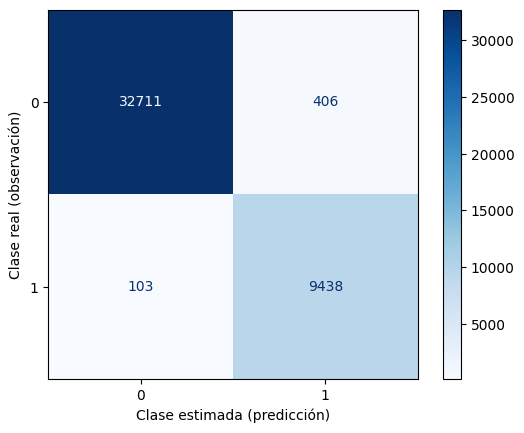

In [ ]:
#Matriz de Confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c17.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 9438
Falsos positivos (FP): 406
Verdaderos negativos (VN): 32711
Falsos negativos (FN): 103


In [ ]:
#Tasa de error
Tasa_FP_17 = FP/(FP+VN)
Tasa_FN_17 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_17)
print("Error tipo II: %.2f" % Tasa_FN_17)

Error tipo I: 0.01
Error tipo II: 0.01


In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     33117
           1       0.96      0.99      0.97      9541

    accuracy                           0.99     42658
   macro avg       0.98      0.99      0.98     42658
weighted avg       0.99      0.99      0.99     42658



In [ ]:
#Accuracy
SCORE_17 = modelo_c17.score(Xtest_sc,Ytest)
print("ACCURACY: %.2f" % SCORE_17)

#F1-Score
f1_17 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_17)

ACCURACY: 0.99
F1-Score: 0.97


El modelo ha logrado una precisión del 100% y un F1-Score de 1.00. Esto sugiere que el modelo es altamente preciso y efectivo en la clasificación de datos en las dos clases

In [ ]:
import joblib

# Guardar el modelo en un archivo
joblib.dump(modelo_c17, 'modelo_rfc3.pkl')

['modelo_rfc3.pkl']

###**2.3 K-Nearest Neighbors (KNN)**

####**2.3.1 Primer Modelo**

✅ Paso 1 - Definición de variables: Utilizamos las variables $X$ e $Y$ previamente definidas y divididas en conjunto de entrenamiento y prueba.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

scaler.fit(Xtrain)
Xtrain_sc= scaler.transform(Xtrain)

scaler.fit(Xtest)
Xtest_sc= scaler.transform(Xtest)

✅ Paso 2 - Modelo: Creación del modelo KNN.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

modelo_c10 = KNeighborsClassifier(n_neighbors=10, p=1, weights='distance')

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain y Ytrain.

In [ ]:
modelo_c10.fit(Xtrain_sc, Ytrain)

KNeighborsClassifier(n_neighbors=10, p=1, weights='distance')

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest. Como resultado obtenemos $\hat Y$ (Y_hat).

Se pone a prueba el modelo realizando una predicción con datos fuera de la muestra (out-of-sample).

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c10.predict(Xtest_sc)

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas.

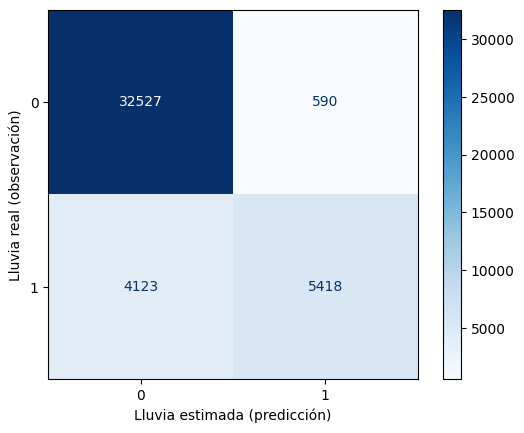

In [ ]:
#Matriz de Confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c10.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Lluvia estimada (predicción)')
plt.ylabel('Lluvia real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 5418
Falsos positivos (FP): 590
Verdaderos negativos (VN): 32527
Falsos negativos (FN): 4123


In [ ]:
#Tasa de error
Tasa_FP_10 = FP/(FP+VN)
Tasa_FN_10 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_10)
print("Error tipo II: %.2f" % Tasa_FN_10)

Error tipo I: 0.02
Error tipo II: 0.43




> El modelo cometió un error de tipo I (falso positivo) en el 1% de las predicciones. O sea que tiene 1% de probabilidad de que el modelo dé un resultado positivo cuando el valor verdadero sea negativo.


> El modelo cometió un error de tipo II (falso negativo) en el 4% de las predicciones. Por lo qué, el modelo tiene la probabilidad del 4% de pasar por alto valores verdaderos.



In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     33117
           1       0.90      0.57      0.70      9541

    accuracy                           0.89     42658
   macro avg       0.89      0.78      0.81     42658
weighted avg       0.89      0.89      0.88     42658





> El modelo tiene una alta precisión tanto para la clase 0 (etiqueta negativa) como para la clase 1 (etiqueta positiva).

> La precisión para la clase 0 es del 97%, lo que significa que el 97% de las predicciones de la clase 0 son correctas.

> La precisión para la clase 1 es del 99%, lo que significa que el 99% de las predicciones de la clase 1 son correctas.

> El recall para la clase 0 es del 99%, lo que significa que el 99% de los ejemplos positivos se detectan correctamente, y el recall para la clase 1 es del 96%.











In [ ]:
#Accuracy
SCORE_10 = modelo_c10.score(Xtest_sc,Ytest)
print("ACCURACY: %.2f" % SCORE_10)

#F1-Score
f1_10 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_10)

ACCURACY: 0.89
F1-Score: 0.70


####**2.3.2 Segundo Modelo**

✅ Paso 1 - Definición de variables: Utilizamos las variables $X$ e $Y$ previamente definidas y divididas en conjunto de entrenamiento y prueba.

✅ Paso 2 - Modelo: Creación del modelo KNN.

In [ ]:
modelo_c11 = KNeighborsClassifier(n_neighbors=10, p=3, weights='distance', algorithm='brute')

'''
'brute' calcula la distancia entre todos los puntos en el conjunto de entrenamiento,
lo que puede ser extremadamente lento en conjuntos de datos grandes o de alta dimensionalidad.
El rendimiento se vuelve ineficiente a medida que el tamaño del conjunto de entrenamiento crece.
'''

"\n'brute' calcula la distancia entre todos los puntos en el conjunto de entrenamiento,\nlo que puede ser extremadamente lento en conjuntos de datos grandes o de alta dimensionalidad.\nEl rendimiento se vuelve ineficiente a medida que el tamaño del conjunto de entrenamiento crece.\n"

✅ Paso 3 - Entrenamiento: Entrenamiento del modelo ajustándolo con Xtrain y Ytrain.

In [ ]:
modelo_c11.fit(Xtrain_sc, Ytrain)

KNeighborsClassifier(algorithm='brute', n_neighbors=10, p=3, weights='distance')

✅ Paso 4 - Predicción: Estimación de la variable Ytest usando como entrada la variable Xtest. Como resultado obtenemos $\hat Y$ (Y_hat).

Se pone a prueba el modelo realizando una predicción con datos fuera de la muestra (out-of-sample).

In [ ]:
#Estimacion de Y (Y "gorro")
Y_hat = modelo_c11.predict(Xtest_sc)

✅ Paso 5 - Métricas: Evaluamos el desempeño del modelo a través del cálculo de métricas.

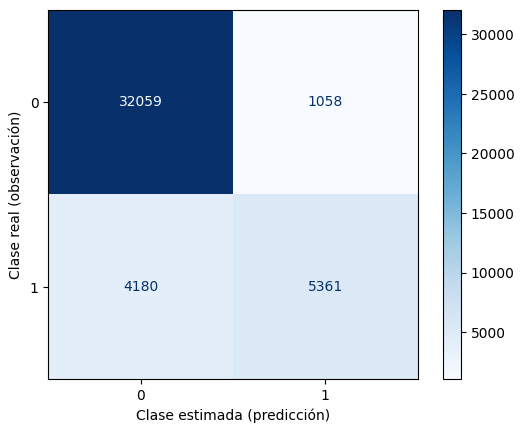

In [ ]:
#Matriz de Confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c11.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Clase estimada (predicción)')
plt.ylabel('Clase real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 5361
Falsos positivos (FP): 1058
Verdaderos negativos (VN): 32059
Falsos negativos (FN): 4180


In [ ]:
#Tasa de error
Tasa_FP_11 = FP/(FP+VN)
Tasa_FN_11 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_11)
print("Error tipo II: %.2f" % Tasa_FN_11)

Error tipo I: 0.03
Error tipo II: 0.44




> El modelo clasificó incorrectamente el 3% de los casos como positivos cuando en realidad eran negativos.
> El modelo clasificó incorrectamente el 13% de los casos como negativos cuando en realidad eran positivos.





In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     33117
           1       0.84      0.56      0.67      9541

    accuracy                           0.88     42658
   macro avg       0.86      0.76      0.80     42658
weighted avg       0.87      0.88      0.87     42658





> Para la clase "0", la precisión es del 91%, lo que significa que el 91% de los casos clasificados como "0" eran verdaderos "0". Para la clase "1", la precisión es del 95%, lo que indica que el 95% de los casos clasificados como "1" eran verdaderos "1".

> Para la clase "0", el "recall" es del 97%, lo que significa que el modelo identificó correctamente el 97% de los verdaderos "0". Para la clase "1", el "recall" es del 87%, lo que indica que el modelo identificó correctamente el 87% de los verdaderos "1".

> Para la clase "0", el F1-Score es 0.94, y para la clase "1", es 0.91. Estos valores reflejan un buen equilibrio entre precisión y "recall".









In [ ]:
#Accuracy
SCORE_11 = modelo_c11.score(Xtest_sc,Ytest)
print("ACCURACY: %.2f" % SCORE_11)

#F1-Score
f1_11 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_11)

ACCURACY: 0.88
F1-Score: 0.67


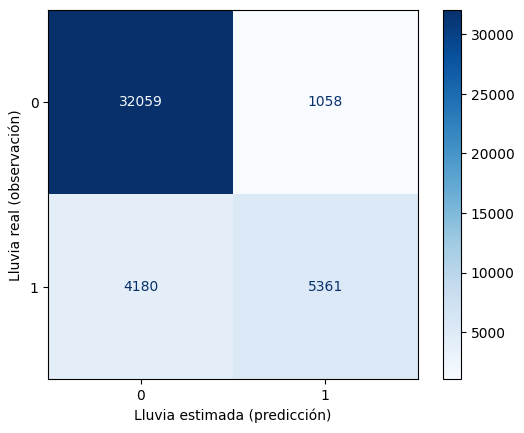

In [ ]:
#Matriz de Confusion
matriz = confusion_matrix(Ytest, Y_hat)

grafico = ConfusionMatrixDisplay(confusion_matrix=matriz,display_labels=modelo_c10.classes_)
grafico.plot(cmap=plt.cm.Blues,values_format='g')
plt.xlabel('Lluvia estimada (predicción)')
plt.ylabel('Lluvia real (observación)')
plt.show()

In [ ]:
VN, FP, FN, VP = matriz.ravel()
print(f'Verdaderos positivos (VP): {VP}')
print(f'Falsos positivos (FP): {FP}')
print(f'Verdaderos negativos (VN): {VN}')
print(f'Falsos negativos (FN): {FN}')

Verdaderos positivos (VP): 5361
Falsos positivos (FP): 1058
Verdaderos negativos (VN): 32059
Falsos negativos (FN): 4180


In [ ]:
#Tasa de error
Tasa_FP_10 = FP/(FP+VN)
Tasa_FN_10 = FN/(FN+VP)

print("Error tipo I: %.2f" % Tasa_FP_10)
print("Error tipo II: %.2f" % Tasa_FN_10)

Error tipo I: 0.03
Error tipo II: 0.44




> El modelo cometió un error de tipo I (falso positivo) en el 1% de las predicciones. O sea que tiene 1% de probabilidad de que el modelo dé un resultado positivo cuando el valor verdadero sea negativo.


> El modelo cometió un error de tipo II (falso negativo) en el 4% de las predicciones. Por lo qué, el modelo tiene la probabilidad del 4% de pasar por alto valores verdaderos.



In [ ]:
#Metricas
print(classification_report(Ytest, Y_hat))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     33117
           1       0.84      0.56      0.67      9541

    accuracy                           0.88     42658
   macro avg       0.86      0.76      0.80     42658
weighted avg       0.87      0.88      0.87     42658





> El modelo tiene una alta precisión tanto para la clase 0 (etiqueta negativa) como para la clase 1 (etiqueta positiva).

> La precisión para la clase 0 es del 97%, lo que significa que el 97% de las predicciones de la clase 0 son correctas.

> La precisión para la clase 1 es del 99%, lo que significa que el 99% de las predicciones de la clase 1 son correctas.

> El recall para la clase 0 es del 99%, lo que significa que el 99% de los ejemplos positivos se detectan correctamente, y el recall para la clase 1 es del 96%.











In [ ]:
#Accuracy
SCORE_10 = modelo_c10.score(Xtest_sc,Ytest)
print("ACCURACY: %.2f" % SCORE_10)

#F1-Score
f1_10 = f1_score(Ytest, Y_hat)
print("F1-Score: %.2f" % f1_10)

ACCURACY: 0.89
F1-Score: 0.67



> La exactitud (Accuracy) general del modelo es del 98%, lo que significa que el 98% de las predicciones son correctas.

> El puntaje F1 general del modelo es del 0.97, lo que indica un buen equilibrio entre precisión y recall.



In [ ]:
import joblib

# Guardar el modelo en un archivo
joblib.dump(modelo_c10, 'modelo_KNNc1.pkl')

['modelo_KNNc1.pkl']

#**ETAPA V: EVALUACIÓN**

✅ Una vez realizados todos los experimentos, se comparan los modelos para definir el modelo ganador con el que se trabajará.

##**1. Evaluación Regresión**

In [ ]:
import pandas as pd
import joblib

# Cargar los modelos ganadores
modelo1 = joblib.load('modelo_regresion.pkl')
modelo2 = joblib.load('modelo_arbolregresionganador.pkl')
modelo3 = joblib.load('modelo_rf7.pkl')


In [ ]:
tabla = pd.DataFrame({'Métrica':['MAE:','MSE:','RMSE:','r2:'],
                      'Regresión lineal':[MAE_2,MSE_2,RMSE_2,r2_2],
                      'Árbol de Regresion':[MAE_5,MSE_5,RMSE_5,r2_5],
                      'Random Forest':[MAE_7,MSE_7,RMSE_7,r2_7]})

# Obtener la fila 'RMSE:' y convertirla a números flotantes
fila_rmse = tabla.loc[2, tabla.columns != 'Métrica']
fila_rmse = fila_rmse.astype(float)

# Aplicar el formato a dos decimales a la fila 'RMSE:'
tabla.loc[2, tabla.columns != 'Métrica'] = fila_rmse.apply("{:.2f}".format)

# Tabla resultante
tabla

Métrica Regresión lineal Árbol de Regresion Random Forest
0    MAE:         0.909593           0.775614      0.703765
1    MSE:         2.170379           1.576444      1.159364
2   RMSE:             1.47               1.26          1.08
3     r2:         0.957061            0.96833      0.976709

- Random Forest es el mejor modelo porque tiene los valores más bajos de error (MAE, MSE, RMSE) y el valor más alto de R2.
- Árbol de Regresión es el segundo mejor modelo porque tiene mejores valores de error y R2 que la regresión lineal, pero peores que Random Forest.
- Regresión Lineal es el peor modelo porque tiene los valores más altos de error y el valor más bajo de R2.

##**2. Evaluación Clasificación**

In [ ]:
import pandas as pd
import joblib

# Cargar los modelos ganadores
modelo4 = joblib.load('modelo_rl3.pkl')
modelo5 = joblib.load('modelo_rfc3.pkl')
modelo6 = joblib.load('modelo_KNNc1.pkl')


In [ ]:
tabla = pd.DataFrame({'Métrica':['Error Tipo I:','Error Tipo II:','Accuracy:','F1-Score'],
                      'Regresión Logística':[Tasa_FP_3,Tasa_FN_3,SCORE_3,f1_3],
                      'Random Forest':[Tasa_FP_17,Tasa_FN_17,SCORE_17,f1_17],
                      'K-Neightbors':[Tasa_FP_10,Tasa_FN_10,SCORE_10,f1_10]})

# Obtener la fila 'RMSE:' y convertirla a números flotantes
fila_rmse = tabla.loc[2, tabla.columns != 'Métrica']
fila_rmse = fila_rmse.astype(float)

# Aplicar el formato a dos decimales a la fila 'RMSE:'
tabla.loc[2, tabla.columns != 'Métrica'] = fila_rmse.apply("{:.2f}".format)

# Tabla resultante
tabla

Métrica Regresión Logística Random Forest K-Neightbors
0   Error Tipo I:            0.010236       0.01226     0.031947
1  Error Tipo II:            0.039828      0.010796     0.438109
2       Accuracy:                0.98          0.99         0.89
3        F1-Score            0.962239      0.973743     0.671805

en un orden de mejor a peor: arbol, regresion , random forest, para este caso utilizaremos la regresion logistica a pesar de no ser el que tiene mejor resultado, principalmente por la sospecha de que un accuracy de 99 tiende a ser mas overfitting que un fiting adecuado.

#**ETAPA VI: DESPLIEGUE**

✅ Se ponen a prueba los modelos ganadores de las tareas de regresión y clasificación realizando una predicción con datos nuevos fuera de la muestra que no forman parte del conjunto de datos de entrenamiento ni de validación, es decir, con datos en tiempo real (generalización). Este es un aspecto fundamental a considerar al evaluar y aplicar un modelo predictivo en entornos reales.

➡️ `Generalización`: Predicción con datos que no han sido utilizados durante el entrenamiento ni la validación del modelo. Cuando se utilizan datos nuevos en tiempo real para hacer predicciones out-of-sample, se pone a prueba la capacidad de generalización del modelo en situaciones completamente nuevas y desconocidas.

##**1. Pronóstico Regresión**

---



Para probar el poder de generallización del modelo ganador, se usan datos nuevos de las variables $X$ con las características de otras casas para predecir el valor de $Y$, para comprobar si se acerca al valor real del Precio en UF de casas a la venta en la RM.

✅ Pronóstico con datos simulados: Si no se tienen datos reales, se pueden generar valores aleatorios sintéticos de $X$ para realizar un pronóstico. Para esto se define una función para generar numeros aleatorios dentro del rango de las variables explicativas $X$, utilizando el minimo y el maximo del dataset original:

In [ ]:
import numpy as np # Programación vectorial
import pandas as pd # Estructura y manipulación de datos
import random # Generación de números aleatorios

In [ ]:
# Importación del dataset original
data = pd.read_csv("WeatherAUSFinal.csv")
Y = df.drop(columns=['MaxTemp'])
Y.sample(5)

Location  MinTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
115052        32     21.1       0.0          8.6      13.2            0   
135956        13     18.0       0.0          6.2      10.2            2   
67262         18     14.6       0.2          3.0       1.0            8   
115777        32     21.8       0.0          7.6      12.2           15   
98758         22     17.0       0.0          3.4       1.0            4   

        WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
115052           44.0           9          15          11.0  ...         37.0   
135956           44.0           3           7           0.0  ...         62.0   
67262            30.0           7           9          11.0  ...         79.0   
115777           41.0           5          15          13.0  ...         54.0   
98758            31.0           0           4           9.0  ...         35.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
115052       1009.8       1006.2       1.0       2.0     26.6     32.8   
135956       1015.2       1011.3       3.0       1.0     25.2     28.3   
67262        1024.6       1024.3       7.0       8.0     16.7     16.5   
115777       1009.0       1006.8       1.0       1.0     28.8     30.0   
98758        1006.4       1001.8       8.0       8.0     19.8     29.7   

        RainToday  RISK_MM  RainTomorrow  
115052          0      0.0             0  
135956          0      0.0             0  
67262           0      1.2             1  
115777          0      0.0             0  
98758           0      0.0             0  

[5 rows x 22 columns]

In [ ]:
import pandas as pd
import numpy as np
# Función para generar variables X dentro de los rangos mínimos y máximos
def generate_random_data(num_rows):
    np.random.seed(123)  # Puedes quitar la semilla para probar con distintos resultados aleatorios
    random_data = {
        key: np.random.uniform(low, high, num_rows) if data[key].dtype in [np.float64, np.int64] else np.random.choice(data[key].unique(), num_rows)
        for key, low, high in [
            ('Location', data['Location'].min(), data['Location'].max()),
            ('MinTemp', data['MinTemp'].min(), data['MinTemp'].max()),
            ('Rainfall', data['Rainfall'].min(), data['Rainfall'].max()),
            ('Evaporation', data['Evaporation'].min(), data['Evaporation'].max()),
            ('Sunshine', data['Sunshine'].min(), data['Sunshine'].max()),
            ('WindGustDir', data['WindGustDir'].min(), data['WindGustDir'].max()),
            ('WindGustSpeed', data['WindGustSpeed'].min(), data['WindGustSpeed'].max()),
            ('WindDir9am', data['WindDir9am'].min(), data['WindDir9am'].max()),
            ('WindDir3pm', data['WindDir3pm'].min(), data['WindDir3pm'].max()),
            ('WindSpeed9am', data['WindSpeed9am'].min(), data['WindSpeed9am'].max()),
            ('WindSpeed3pm', data['WindSpeed3pm'].min(), data['WindSpeed3pm'].max()),
            ('Humidity9am', data['Humidity9am'].min(), data['Humidity9am'].max()),
            ('Humidity3pm', data['Humidity3pm'].min(), data['Humidity3pm'].max()),
            ('Pressure9am', data['Pressure9am'].min(), data['Pressure9am'].max()),
            ('Pressure3pm', data['Pressure3pm'].min(), data['Pressure3pm'].max()),
            ('Cloud9am', data['Cloud9am'].min(), data['Cloud9am'].max()),
            ('Cloud3pm', data['Cloud3pm'].min(), data['Cloud3pm'].max()),
            ('Temp9am', data['Temp9am'].min(), data['Temp9am'].max()),
            ('Temp3pm', data['Temp3pm'].min(), data['Temp3pm'].max()),
            ('RainToday', 0, 1),  # Suponiendo que 'RainToday' es binaria (0 o 1)
            ('RISK_MM', data['RISK_MM'].min(), data['RISK_MM'].max()),
            ('RainTomorrow', 0, 1),  # Suponiendo que 'RainTomorrow' es binaria (0 o 1)
        ]
    }

    X_rand = pd.DataFrame(random_data)

    return X_rand

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Se define una proporcion 70/30, es decir un tamaño del conjunto de prueba de 0.3 (30%)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3, random_state=123)

In [ ]:
#Conjunto de entrenamiento
print(Xtrain.shape)
print(Ytrain.shape)

(99535, 22)
(99535, 22)


In [ ]:
#Conjunto de prueba
print(Xtest.shape)
print(Ytest.shape)

(42658, 22)
(42658, 22)


In [ ]:
# Uso de la función para generar un DataFrame con X filas
X_rand = generate_random_data(10)  # Asegúrate de pasar el DataFrame X como segundo argumento
X_rand.head(10)

Location    MinTemp    Rainfall  Evaporation   Sunshine  WindGustDir  \
0  33.430521   6.050748  235.362756    13.355216   8.400293     1.809430   
1  13.734688  22.411708  315.139196    62.886670  -3.145921    12.395112   
2  10.888870  10.095463  268.772926    62.475101   1.434706     9.045902   
3  26.463109  -5.969657  226.689722    71.584339   3.650228     8.176020   
4  34.534511   8.377076  268.026495    61.745392  13.905125     5.141458   
5  20.309110  22.791005  119.817757    45.277877  -0.083260     4.561812   
6  47.076682  -0.762351  134.223591    61.820940   5.199493     6.255333   
7  32.871827  -1.060846   84.685659   129.541429  16.613761    10.219511   
8  23.084731  14.037778  108.967911   136.903203   6.027430    13.131853   
9  18.821641  14.049490  234.092142    72.766318   8.149114     7.656335   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0      92.341478    1.435688    4.781496     91.644648  ...    90.534158   
1      81.585815   13.279902   10.379554    129.396603  ...    20.763586   
2      86.612552    9.408735    8.315749     46.268933  ...    29.248941   
3      93.034888   10.851245    5.834259     99.131216  ...    52.001015   
4     114.662174    0.241938   13.876987     77.112999  ...    90.191137   
5      16.732153    8.916478   12.625050     89.921234  ...    98.363088   
6     104.515087    8.351778    5.360964     19.646569  ...    25.754206   
7      37.432962    2.384395    0.653872     51.853918  ...    56.435904   
8      31.054762    2.296058    4.571521     31.311267  ...    80.696868   
9      79.846948   10.432943    5.972785     44.649282  ...    39.437005   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm    Temp9am    Temp3pm  \
0  1024.729919   982.932919  1.493441  3.943929  28.427925  23.891578   
1   990.244675   995.653798  7.028981  6.885865  -3.448339   0.968889   
2  1016.842263  1035.074015  2.578830  5.090778  33.535042   5.092914   
3  1032.884800  1012.662733  2.758228  0.764137  31.739295  36.886671   
4  1040.003057  1005.688250  5.987353  5.244040  35.927917  18.982153   
5   985.301630  1024.195374  1.002530  7.333593  -1.102881  36.693581   
6  1006.415010  1023.466384  5.983852  3.033597  -3.323624  -5.013086   
7   992.874843   980.136190  7.990711  8.348189  -0.639102  23.337981   
8  1007.763508  1021.393587  6.266801  6.756453  11.730551  43.153665   
9  1013.639696  1029.552709  3.962951  5.166574  12.912145  24.931341   

   RainToday     RISK_MM  RainTomorrow  
0   0.206096  201.317928      0.792299  
1   0.717758   24.773318      0.518717  
2   0.378986  242.398367      0.425868  
3   0.668384  369.548027      0.788187  
4   0.029320  285.446412      0.411569  
5   0.635900  212.870196      0.481026  
6   0.032198   38.077681      0.181629  
7   0.744781  259.638442      0.321319  
8   0.472913  245.293279      0.845533  
9   0.121754   18.215035      0.186904  

[10 rows x 22 columns]

✅ Predicción de la variable objetivo $Y$ usando el modelo ganador:

In [ ]:
import joblib

In [ ]:
# Cargar el modelo desde el archivo
regresion = joblib.load('modelo_rf7.pkl')

In [ ]:
# Pronóstico de la variable objetivo usando el modelo ganador
Y_hat = regresion.predict(X_rand)

In [ ]:
# Crear un DataFrame a partir de las predicciones Y_hat
resultados = pd.DataFrame(X_rand)
resultados['Pronostico'] = Y_hat
resultados

Location    MinTemp    Rainfall  Evaporation   Sunshine  WindGustDir  \
0  33.430521   6.050748  235.362756    13.355216   8.400293     1.809430   
1  13.734688  22.411708  315.139196    62.886670  -3.145921    12.395112   
2  10.888870  10.095463  268.772926    62.475101   1.434706     9.045902   
3  26.463109  -5.969657  226.689722    71.584339   3.650228     8.176020   
4  34.534511   8.377076  268.026495    61.745392  13.905125     5.141458   
5  20.309110  22.791005  119.817757    45.277877  -0.083260     4.561812   
6  47.076682  -0.762351  134.223591    61.820940   5.199493     6.255333   
7  32.871827  -1.060846   84.685659   129.541429  16.613761    10.219511   
8  23.084731  14.037778  108.967911   136.903203   6.027430    13.131853   
9  18.821641  14.049490  234.092142    72.766318   8.149114     7.656335   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Pressure9am  \
0      92.341478    1.435688    4.781496     91.644648  ...  1024.729919   
1      81.585815   13.279902   10.379554    129.396603  ...   990.244675   
2      86.612552    9.408735    8.315749     46.268933  ...  1016.842263   
3      93.034888   10.851245    5.834259     99.131216  ...  1032.884800   
4     114.662174    0.241938   13.876987     77.112999  ...  1040.003057   
5      16.732153    8.916478   12.625050     89.921234  ...   985.301630   
6     104.515087    8.351778    5.360964     19.646569  ...  1006.415010   
7      37.432962    2.384395    0.653872     51.853918  ...   992.874843   
8      31.054762    2.296058    4.571521     31.311267  ...  1007.763508   
9      79.846948   10.432943    5.972785     44.649282  ...  1013.639696   

   Pressure3pm  Cloud9am  Cloud3pm    Temp9am    Temp3pm  RainToday  \
0   982.932919  1.493441  3.943929  28.427925  23.891578   0.206096   
1   995.653798  7.028981  6.885865  -3.448339   0.968889   0.717758   
2  1035.074015  2.578830  5.090778  33.535042   5.092914   0.378986   
3  1012.662733  2.758228  0.764137  31.739295  36.886671   0.668384   
4  1005.688250  5.987353  5.244040  35.927917  18.982153   0.029320   
5  1024.195374  1.002530  7.333593  -1.102881  36.693581   0.635900   
6  1023.466384  5.983852  3.033597  -3.323624  -5.013086   0.032198   
7   980.136190  7.990711  8.348189  -0.639102  23.337981   0.744781   
8  1021.393587  6.266801  6.756453  11.730551  43.153665   0.472913   
9  1029.552709  3.962951  5.166574  12.912145  24.931341   0.121754   

      RISK_MM  RainTomorrow  Pronostico  
0  201.317928      0.792299   35.032612  
1   24.773318      0.518717    5.859747  
2  242.398367      0.425868    9.664421  
3  369.548027      0.788187   38.574427  
4  285.446412      0.411569   28.441091  
5  212.870196      0.481026   38.420764  
6   38.077681      0.181629   -0.805284  
7  259.638442      0.321319   25.218154  
8  245.293279      0.845533   44.607995  
9   18.215035      0.186904   26.223761  

[10 rows x 23 columns]

In [ ]:
# Exportar los resultados a un archivo Excel
resultados.to_excel('resultadosregresion.xlsx', index=False)
# index=False para no incluir el índice en el archivo

Ejemplo

In [ ]:

Weather1 = {
    'Location': 42,
    'MinTemp': 10.6,
    'Rainfall': 0.0,
    'Evaporation': 10.6,
    'Sunshine': 13.1,
    'WindGustDir': 12,
    'WindGustSpeed': 41.0,
    'WindDir9am': 0	,
    'WindDir3pm': 0,
    'WindSpeed9am': 20.0,
    'WindSpeed3pm': 24.0,
    'Humidity9am': 12,
    'Humidity3pm': 11,
    'Pressure9am': 1013.1,
    'Pressure3pm': 1010.4,
    'Cloud9am': 1,
    'Cloud3pm': 6,
    'Temp9am': 22.8,
    'Temp3pm': 33.5,
    'RainToday': 0,
    'RISK_MM': 0.0,
    'RainTomorrow': 0,

}


Weather1 = pd.DataFrame(Weather1, index=[0])

In [ ]:
# Pronóstico de la variable objetivo usando el modelo ganador
Y_hat = regresion.predict(Weather1)
print(f"El pronostico de los modelos de regresion es de : {round(float(Y_hat),2)}")

El pronostico de los modelos de regresion es de : 34.99


Se toma un dia que cumpla con estas caracteristicas en australia y se toma el maximo de temperatura.

In [ ]:
print(f"Valores reales de las temperaturas en Australia 35.20, por lo que el error es de	: {abs(round(float(Y_hat) - 35.20	, 2))}")

Valores reales de las temperaturas en Australia 35.20, por lo que el error es de	: 0.21


##**2. Pronóstico Clasificación**

Si no se tienen datos reales, se pueden generar valores aleatorios sintéticos de $X$ para realizar un pronóstico. Para esto se define una función para generar numeros aleatorios dentro del rango de las variables explicativas $X$, utilizando el minimo y el maximo del dataset original:

In [ ]:
import numpy as np # Programación vectorial
import pandas as pd # Estructura y manipulación de datos
import random # Generación de números aleatorios

In [ ]:
# Importación del dataset original
data = pd.read_csv("WeatherAUSFinal.csv")
X = df.drop(columns=['RainTomorrow'])
X.sample(5)

Location  MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  \
82846          7     15.9     26.3       5.4     2.400000   8.400000   
139967        16     13.9     31.2       0.0     7.200000   9.637271   
53301         23      1.1      5.2       2.8     5.469824   2.510771   
56289          5     13.0     16.1       7.6     5.469824   1.089504   
137391        13     18.4     32.2       0.0     7.400000  11.100000   

        WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity9am  \
82846            13           20.0          12           3  ...         68.0   
139967            9           46.0           0           0  ...         55.0   
53301             7           57.0           7          14  ...         98.0   
56289             5           81.0           5           3  ...        100.0   
137391            0           35.0           0           3  ...         66.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
82846          51.0  1014.000000  1009.300000  4.000000  3.000000     21.3   
139967         32.0  1015.500000  1011.700000  5.000000  4.000000     22.5   
53301          98.0  1017.653758  1015.258204  4.437189  4.503167      4.3   
56289          98.0   996.300000   994.400000  8.000000  8.000000     16.1   
137391         42.0  1017.400000  1012.500000  0.000000  1.000000     24.2   

        Temp3pm  RainToday  RISK_MM  
82846      25.6          1     14.6  
139967     31.0          0      0.0  
53301       4.7          1     12.4  
56289      12.9          1     20.2  
137391     29.4          0      0.0  

[5 rows x 22 columns]

In [ ]:
import pandas as pd
import numpy as np
# Función para generar variables X dentro de los rangos mínimos y máximos
def generate_random_data(num_rows):
    np.random.seed(123)  # Puedes quitar la semilla para probar con distintos resultados aleatorios
    random_data = {
        key: np.random.uniform(low, high, num_rows) if data[key].dtype in [np.float64, np.int64] else np.random.choice(data[key].unique(), num_rows)
        for key, low, high in [
            ('Date' , data['Date'].min(), data['Date'].max()),
            ('Location', data['Location'].min(), data['Location'].max()),
            ('MinTemp', data['MinTemp'].min(), data['MinTemp'].max()),
            ('MaxTemp' , data['MaxTemp'].min(), data['MaxTemp'].max()),
            ('Rainfall', data['Rainfall'].min(), data['Rainfall'].max()),
            ('Evaporation', data['Evaporation'].min(), data['Evaporation'].max()),
            ('Sunshine', data['Sunshine'].min(), data['Sunshine'].max()),
            ('WindGustDir', data['WindGustDir'].min(), data['WindGustDir'].max()),
            ('WindGustSpeed', data['WindGustSpeed'].min(), data['WindGustSpeed'].max()),
            ('WindDir9am', data['WindDir9am'].min(), data['WindDir9am'].max()),
            ('WindDir3pm', data['WindDir3pm'].min(), data['WindDir3pm'].max()),
            ('WindSpeed9am', data['WindSpeed9am'].min(), data['WindSpeed9am'].max()),
            ('WindSpeed3pm', data['WindSpeed3pm'].min(), data['WindSpeed3pm'].max()),
            ('Humidity9am', data['Humidity9am'].min(), data['Humidity9am'].max()),
            ('Humidity3pm', data['Humidity3pm'].min(), data['Humidity3pm'].max()),
            ('Pressure9am', data['Pressure9am'].min(), data['Pressure9am'].max()),
            ('Pressure3pm', data['Pressure3pm'].min(), data['Pressure3pm'].max()),
            ('Cloud9am', data['Cloud9am'].min(), data['Cloud9am'].max()),
            ('Cloud3pm', data['Cloud3pm'].min(), data['Cloud3pm'].max()),
            ('Temp9am', data['Temp9am'].min(), data['Temp9am'].max()),
            ('Temp3pm', data['Temp3pm'].min(), data['Temp3pm'].max()),
            ('RainToday', 0, 1),  # Suponiendo que 'RainToday' es binaria (0 o 1)
            ('RISK_MM', data['RISK_MM'].min(), data['RISK_MM'].max()),
        ]
    }

    X_rand = pd.DataFrame(random_data)

    return X_rand

In [ ]:
# Uso de la función para generar un DataFrame con X filas
X_rand = generate_random_data(10) #Puedes cambiar el numero para probar con más registros
pd.set_option('display.max_columns', None)
X_rand.head(10)

Date   Location    MinTemp    MaxTemp    Rainfall  Evaporation  \
0  2392.371653  16.472545  18.398601   0.072351  231.486545    17.491157   
1   982.888616  34.994386  27.515908  18.142792   42.894425   119.819416   
2   779.234743  21.051468  22.216906  17.992640  117.712914    87.443719   
3  1893.766232   2.864539  17.407397  21.315942  153.900525    79.034861   
4  2471.375911  19.106124  22.131599  17.726422  321.400698    49.700756   
5  1453.370691  35.423779   5.193458  11.718619   92.918941    44.097514   
6  3368.925021   8.759603   6.839839  17.753984  179.205712    60.468221   
7  2352.390152   8.421684   1.178361  42.460287  365.642680    98.788611   
8  1652.001082  25.514466   3.953476  45.146065  192.728979   126.941242   
9  1346.923675  25.527724  18.253388  21.747160  227.383869    74.011239   

    Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  \
0   9.430610     1.435688      47.120869   10.574382    7.696922   
1   7.536795    13.279902      95.264168   14.930377    9.999368   
2   8.421883     9.408735      77.515439    5.338723    1.588627   
3   9.552703    10.851245      56.174624   11.438217    1.963424   
4  13.360749     0.241938     125.342091    8.897654    4.829709   
5  -3.882380     8.916478     114.575430   10.375527    9.923465   
6  11.574090     8.351778      52.104286    2.266912   12.697593   
7  -0.237464     2.384395      11.623299    5.983144    8.298860   
8  -1.360512     2.296058      45.315081    3.612838   12.816787   
9   7.230622    10.432943      57.365953    5.151840    5.772567   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0     41.182427     78.764717    73.107304     9.332671   990.539242   
1     46.054408     18.064320    16.106901    29.686078  1027.750375   
2     22.240638     25.446579    60.069857    92.758424   997.835465   
3    107.784642     45.240883    86.586446    56.900373   999.041420   
4     44.027210     78.466289    98.352161    45.741200  1020.748319   
5     71.808110     85.575887     7.936579    75.352599   987.239226   
6     75.211691     22.406160    42.834727    74.186215  1020.724783   
7     67.799298     49.099237    20.454286     4.857903  1034.215336   
8      0.349448     70.206276    45.063649    70.869740  1022.626832   
9    128.484905     34.310195    54.776357    83.924335  1007.139837   

   Pressure3pm  Cloud9am  Cloud3pm    Temp9am    Temp3pm  RainToday  \
0  1004.488399  6.764796  5.059965   2.568937  22.871332   0.792299   
1  1024.918506  0.712341  1.100192  26.821708  -1.921052   0.518717   
2  1012.452625  7.734502  1.812596  10.763929  28.640310   0.425868   
3   982.406510  7.393537  7.304799  24.481399  46.496098   0.788187   
4  1013.516943  8.188845  4.211888  -5.810245  34.685601   0.411569   
5  1028.027731  1.157681  7.271444  22.941677  24.493631   0.481026   
6   998.166649  0.736021  0.066837  -5.673818  -0.052703   0.181629   
7  1035.073536  1.245740  4.964335  28.102603  31.061355   0.321319   
8  1024.019813  3.594408  8.387389  15.216076  29.046846   0.845533   
9  1012.978989  3.818762  5.239579  -1.428844  -2.842039   0.186904   

      RISK_MM  
0  154.814984  
1  366.931802  
2   87.778530  
3  340.144796  
4  340.725461  
5   33.870943  
6  172.015161  
7  186.322260  
8  116.371180  
9   17.562968

✅ Predicción de la variable objetivo $Y$ usando el modelo ganador:

In [ ]:
# Cargar el modelo desde el archivo
clasificacion = joblib.load('modelo_rl3.pkl')

In [ ]:
# Pronóstico de la variable objetivo usando el modelo ganador
Y_hat = clasificacion.predict(X_rand)

In [ ]:
# Crear un DataFrame a partir de las predicciones Y_hat
resultados = pd.DataFrame(X_rand)
resultados['Pronostico'] = Y_hat
resultados

Date   Location    MinTemp    MaxTemp    Rainfall  Evaporation  \
0  2392.371653  16.472545  18.398601   0.072351  231.486545    17.491157   
1   982.888616  34.994386  27.515908  18.142792   42.894425   119.819416   
2   779.234743  21.051468  22.216906  17.992640  117.712914    87.443719   
3  1893.766232   2.864539  17.407397  21.315942  153.900525    79.034861   
4  2471.375911  19.106124  22.131599  17.726422  321.400698    49.700756   
5  1453.370691  35.423779   5.193458  11.718619   92.918941    44.097514   
6  3368.925021   8.759603   6.839839  17.753984  179.205712    60.468221   
7  2352.390152   8.421684   1.178361  42.460287  365.642680    98.788611   
8  1652.001082  25.514466   3.953476  45.146065  192.728979   126.941242   
9  1346.923675  25.527724  18.253388  21.747160  227.383869    74.011239   

    Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  \
0   9.430610     1.435688      47.120869   10.574382    7.696922   
1   7.536795    13.279902      95.264168   14.930377    9.999368   
2   8.421883     9.408735      77.515439    5.338723    1.588627   
3   9.552703    10.851245      56.174624   11.438217    1.963424   
4  13.360749     0.241938     125.342091    8.897654    4.829709   
5  -3.882380     8.916478     114.575430   10.375527    9.923465   
6  11.574090     8.351778      52.104286    2.266912   12.697593   
7  -0.237464     2.384395      11.623299    5.983144    8.298860   
8  -1.360512     2.296058      45.315081    3.612838   12.816787   
9   7.230622    10.432943      57.365953    5.151840    5.772567   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0     41.182427     78.764717    73.107304     9.332671   990.539242   
1     46.054408     18.064320    16.106901    29.686078  1027.750375   
2     22.240638     25.446579    60.069857    92.758424   997.835465   
3    107.784642     45.240883    86.586446    56.900373   999.041420   
4     44.027210     78.466289    98.352161    45.741200  1020.748319   
5     71.808110     85.575887     7.936579    75.352599   987.239226   
6     75.211691     22.406160    42.834727    74.186215  1020.724783   
7     67.799298     49.099237    20.454286     4.857903  1034.215336   
8      0.349448     70.206276    45.063649    70.869740  1022.626832   
9    128.484905     34.310195    54.776357    83.924335  1007.139837   

   Pressure3pm  Cloud9am  Cloud3pm    Temp9am    Temp3pm  RainToday  \
0  1004.488399  6.764796  5.059965   2.568937  22.871332   0.792299   
1  1024.918506  0.712341  1.100192  26.821708  -1.921052   0.518717   
2  1012.452625  7.734502  1.812596  10.763929  28.640310   0.425868   
3   982.406510  7.393537  7.304799  24.481399  46.496098   0.788187   
4  1013.516943  8.188845  4.211888  -5.810245  34.685601   0.411569   
5  1028.027731  1.157681  7.271444  22.941677  24.493631   0.481026   
6   998.166649  0.736021  0.066837  -5.673818  -0.052703   0.181629   
7  1035.073536  1.245740  4.964335  28.102603  31.061355   0.321319   
8  1024.019813  3.594408  8.387389  15.216076  29.046846   0.845533   
9  1012.978989  3.818762  5.239579  -1.428844  -2.842039   0.186904   

      RISK_MM  Pronostico  
0  154.814984           1  
1  366.931802           1  
2   87.778530           1  
3  340.144796           1  
4  340.725461           1  
5   33.870943           1  
6  172.015161           1  
7  186.322260           1  
8  116.371180           1  
9   17.562968           1

El modelo predice que todos los futuros clientes tendrán dualidad de tarjetas, por lo que tendrán mas de una tarjeta

In [ ]:
# Exportar los resultados a un archivo Excel
resultados.to_excel('resultados_clasificacion.xlsx', index=False)
# index=False para no incluir el índice en el archivo



---




---


#**Modelos No Supervisados**

---



## **3. CLUSTERING**

El análisis de conglomerados (normalmente llamado simplemente "clustering") es un ejemplo de una tarea en la que deseamos encontrar características comunes entre conjuntos grandes de muestras.

Un algoritmo de clustering se basa en la suposición implícita de que las muestras pueden agruparse según sus similitudes.

### **3.1. K-Means**

K-Means es un método de agrupamiento que tiene como objetivo dividir un conjunto de datos en grupos (clusters) basados en la similitud entre los elementos.

➡️ `KMeans()`: El objetivo de K-Means es dividir un conjunto de datos en grupos o clusters, de modo que los puntos de datos dentro de un mismo cluster sean más similares entre sí que con los puntos de otros clusters. Es un algoritmo iterativo que asigna los datos a clusters de manera que la suma de las distancias al cuadrado entre los puntos y el centroide del cluster sea mínima.

Parámetros:

> ●   `n_clusters`: Especifica el número de clústeres (K) que se deben encontrar en el conjunto de datos. Es uno de los parámetros más importantes y generalmente se establece según el conocimiento del dominio o se determina utilizando técnicas de selección de K, como el método del codo o la silueta.

> ●   `init`: Este parámetro determina cómo se inicializan los centroides de los clústeres. Puede tomar valores como "k-means++" (inicialización inteligente predeterminada), "random" (inicialización aleatoria), o se puede proporcionar una matriz de centroides iniciales.

> ●   `n_init`: Especifica cuántas veces se ejecutará el algoritmo K-Means con diferentes centroides iniciales. Los resultados de estas ejecuciones se comparan y se selecciona el mejor clúster. El valor predeterminado es 10.

> ●   `max_iter`: Este parámetro establece el número máximo de iteraciones permitidas para converger. Si el algoritmo no converge antes de alcanzar este número de iteraciones, se detiene. El valor predeterminado es 300.

> ●   `tol`: La tolerancia para la convergencia del algoritmo. Si la diferencia entre los centroides en iteraciones sucesivas es menor que esta tolerancia, se considera que el algoritmo ha convergido. El valor predeterminado es 1e-4 (0.0001).

> ●   `precompute_distances`: Determina si se deben precalcular las distancias entre los puntos de datos y los centroides. Puede ser "auto," "True" o "False."

> ●   `random_state`: La semilla aleatoria utilizada para la inicialización de centroides. Puedes especificar un valor entero para reproducibilidad o usar "None" para una inicialización aleatoria.

---

⚠️ **CONSIDERACIONES PARA EL USO DE K-MEANS** ⚠️

•	Requiere que se indique de antemano el número de clusters que se van a crear.

•	Dificultad para detectar clusters alargados o con formas irregulares.

•	Las agrupaciones resultantes pueden variar dependiendo de la asignación aleatoria inicial de los centroides.

•	Presenta problemas de robustez frente a outliers.

---

🟠 **CÁLCULO DEL NÚMERO DE CLUSTERS (k)** 🟠

➡️ `Inertia`:  La forma más sencilla de evaluar el rendimiento de K-means y elegir un número apropiado de clusters se basa en la comparación de diferentes inercias finales. La "inercia" se refiere a una métrica que se utiliza para evaluar la calidad del agrupamiento o la dispersión de los puntos de datos en un cluster. En otras palabras, la inercia mide cuánto están dispersos los puntos de datos dentro de un cluster.

Fórmula:

```
Inertia = ∑ (Distancia Media al Centroide en cada Cluster)
```
Donde:

*   Para cada cluster en el conjunto de datos, se calcula la distancia media entre todas las muestras dentro del cluster y el centroide de ese cluster. La distancia media se calcula utilizando la distancia euclidiana, que es una medida común en el contexto de K-means. La distancia euclidiana entre dos puntos (vectores) se calcula como la raíz cuadrada de la suma de las diferencias cuadradas entre sus coordenadas.
*   Se suman todas estas distancias medias de cada cluster.
*   El resultado es el valor de la inercia.

En un buen agrupamiento, los puntos de datos dentro de un cluster deben estar cerca de su centroide, lo que da como resultado una inercia baja. Por otro lado, en un mal agrupamiento, los puntos de datos pueden estar dispersos lejos de su centroide, lo que da como resultado una inercia alta.

En resumen, la inercia es una medida que evalúa cuán compactos y cercanos están los puntos de datos dentro de un clúster, y se utiliza para ayudar a determinar el número adecuado de clústeres en un algoritmo de agrupamiento como K-Means.

➡️ `Método del codo (elbow)`: Cuando se trabaja con K-Means para determinar el número óptimo de clusters, se calcula la inercia para diferentes valores de K (número de clusters) y se busca un punto de inflexión en la curva de la inercia en función de K. El número de clusters en el que la disminución en la inercia se vuelve menos significativa puede considerarse un buen candidato para el número óptimo de clusters.

Finalmente, se escoge visualmente aquel valor para el cual la caída en la suma total de la inercia es marginal.

In [ ]:
pip install kneed

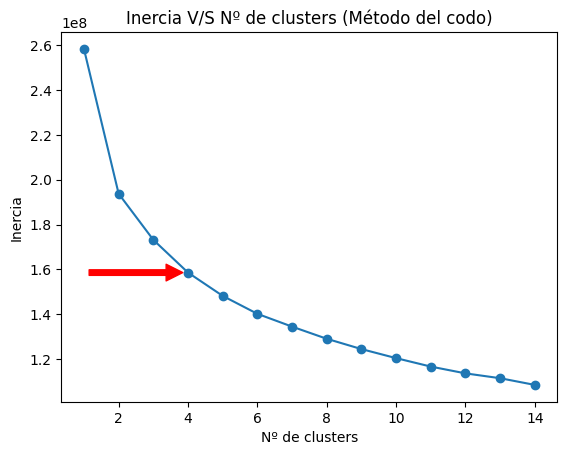

In [ ]:
from kneed import KneeLocator
from sklearn.cluster import KMeans

# Calcular la inercia para diferentes números de clusters
inercia = []
for i in range(1, 15):  # Rango de clusters
    modelo = KMeans(n_clusters=i, random_state=0)
    modelo.fit(df)
    inercia.append(modelo.inertia_)

# Utilizar la biblioteca kneed para encontrar el "codo" de forma automática
kl = KneeLocator(range(1, 15), inercia, curve='convex', direction='decreasing')
codo_idx = kl.elbow

# Graficar la inercia
plt.plot(range(1, 15), inercia, marker='o')
plt.title('Inercia V/S Nº de clusters (Método del codo)')
plt.xlabel('Nº de clusters')
plt.ylabel('Inercia')

# Añadir ubicacion del codo
plt.annotate('', xy=(codo_idx, inercia[codo_idx-1]),
             xytext=(codo_idx - 3, inercia[codo_idx-1] + 500),
             arrowprops=dict(facecolor='red', edgecolor='red', shrink=0.05))

plt.show()

En este caso, el número de clusters óptimo es ***k=5***.

#### **Modelo 1**

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Mostrar información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  int64  
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   Evaporation    142193 non-null  float64
 5   Sunshine       142193 non-null  float64
 6   WindGustDir    142193 non-null  int64  
 7   WindGustSpeed  142193 non-null  float64
 8   WindDir9am     142193 non-null  int64  
 9   WindDir3pm     142193 non-null  int64  
 10  WindSpeed9am   142193 non-null  float64
 11  WindSpeed3pm   142193 non-null  float64
 12  Humidity9am    142193 non-null  float64
 13  Humidity3pm    142193 non-null  float64
 14  Pressure9am    142193 non-null  float64
 15  Pressure3pm    142193 non-null  float64
 16  Cloud9am       142193 non-null  float64
 17  Cloud3pm       142193 non-nul

✅ Paso 1 - Selección de características (variables)

In [ ]:
#'Maxtemp' y 'Humidity3pm'
X = df.iloc[:, [3,14]].values

✅ Paso 2 - Modelamiento

In [ ]:
from sklearn.cluster import KMeans

modelo_1 = KMeans(n_clusters= 5, random_state=0)

✅ Paso 3 - Predicción

In [ ]:
Y_hat = modelo_1.fit_predict(X)

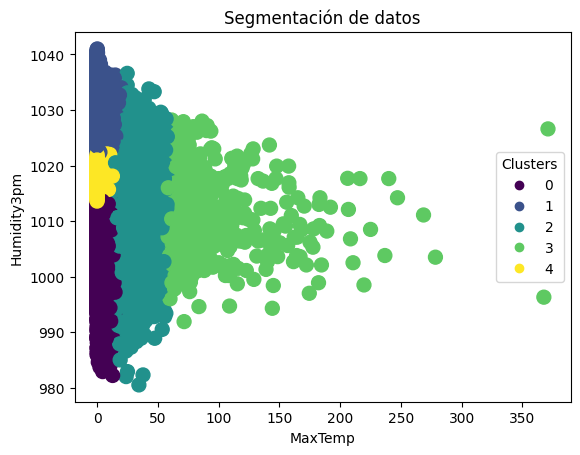

In [ ]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='viridis', s=100)
plt.xlabel('MaxTemp')
plt.ylabel('Humidity3pm')
plt.title('Segmentación de datos')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

✅ Paso 4 - Evaluación

Comprender el rendimiento de los métodos de aprendizaje no supervisado es inherentemente mucho más difícil que los métodos de aprendizaje supervisado porque, a menudo, no hay una solución "mejor" clara y definitiva. Para el aprendizaje supervisado, existen muchas métricas de rendimiento robustas, siendo la más directa de estas la precisión, que implica comparar las etiquetas predichas por el modelo con las etiquetas reales y ver cuántas el modelo acertó. Desafortunadamente, para el agrupamiento (clustering), no tenemos etiquetas en las que confiar y debemos desarrollar una comprensión de cuán "diferentes" son nuestros conglomerados.

➡️ `Silhouette Score()`: Medida de cuán similar es un dato a los datos de su cluster en comparación a los datos del cluster más cercano. La métrica de Silueta funciona analizando qué tan bien se ajusta un punto dentro de su conglomerado.

Fórmula:
```
S(i)= b(i)−a(i)/(max(a(i),b(i))
```
Donde:

*   S(i) es el puntaje Silhouette para el punto i.
*   a(i) es la distancia promedio de i a todos los demás puntos en el mismo clúster.
*   b(i) es la distancia promedio de i a todos los puntos en el clúster más cercano distinto del que i pertenece.

El puntaje Silhouette se calcula para cada punto en el conjunto de datos, y el puntaje Silhouette promedio se utiliza para evaluar la calidad general del agrupamiento. El puntaje Silhouette está en el rango de -1 a 1, donde un puntaje más alto indica que los puntos están bien agrupados y tienen una distancia significativamente mayor entre clusters en comparación con la distancia dentro del cluster.

• S(i) cercano a 1 = Clusters densos y bien separados. Indica que cada punto está bien emparejado con su propio clúster y alejado de los clusters vecinos.

• S(i) cercano a 0 = Los clusters pueden solaparse entre sí. Indica que el punto está en o muy cerca del límite entre dos clusters.

• S(i) es negativo = Los puntos podrían haber sido asignados al clúster incorrecto.  Indica que el punto está mal emparejado con su propio clúster y más emparejado con el cluster vecino.

También podemos utilizar puntaje Silhouette para encontrar el número óptimo de "K" conglomerados para nuestros métodos de aprendizaje no supervisado.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
SS_1 = silhouette_score(X, Y_hat)

print("Silhouette Score:",SS_1)

Silhouette Score: 0.4743426653958135


#### **Modelo 2**

✅ Paso 1 - Selección de características (variables)

In [ ]:
#'MaxTemp' y 'Rainfall'
X = df.iloc[:, [3,4]].values

✅ Paso 2 - Modelamiento

In [ ]:
modelo_2 = KMeans(n_clusters= 5, random_state=0)

✅ Paso 3 - Predicción

In [ ]:
Y_hat = modelo_2.fit_predict(X)

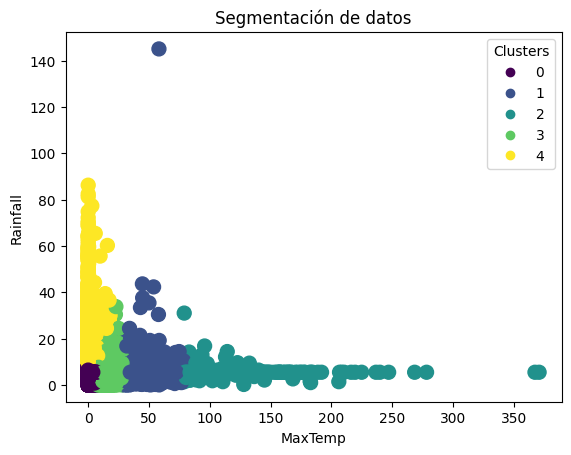

In [ ]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='viridis', s=100)
plt.xlabel('MaxTemp')
plt.ylabel('Rainfall')
plt.title('Segmentación de datos')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

✅ Paso 4 - Evaluación

In [ ]:
SS_2 = silhouette_score(X, Y_hat)

print("Silhouette Score:",SS_2)

Silhouette Score: 0.6259330902972229


#### **Modelo 3**

✅ Paso 1 - Selección de características (variables)

In [ ]:
#'WindGustSpeed' y 'Rainfall'
X = df.iloc[:, [8,4]].values

✅ Paso 2 - Modelamiento

In [ ]:
modelo_3 = KMeans(n_clusters= 5, random_state=0)

✅ Paso 3 - Predicción

In [ ]:
Y_hat = modelo_3.fit_predict(X)

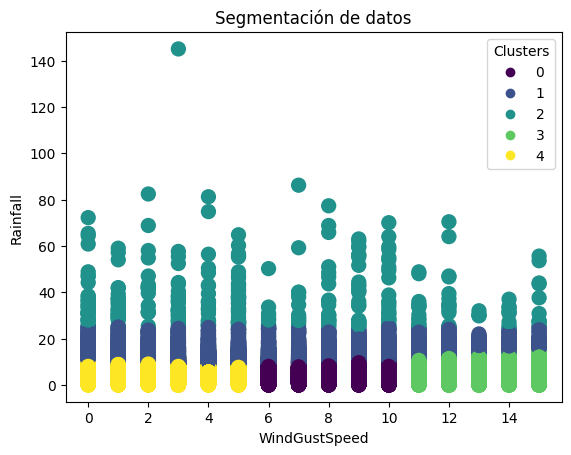

In [ ]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='viridis', s=100)
plt.xlabel('WindGustSpeed')
plt.ylabel('Rainfall')
plt.title('Segmentación de datos')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

✅ Paso 4 - Evaluación

In [ ]:
SS_3 = silhouette_score(X, Y_hat)

print("Silhouette Score:",SS_3)

Silhouette Score: 0.433035891385135


#### **Modelo 4**

✅ Paso 1 - Selección de características (variables)

Se utilizan las mismas variables que en el modelo anterior

✅ Paso 2 - Modelamiento

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define el espacio de búsqueda de hiperparámetros, incluyendo otros hiperparámetros además de n_clusters e init
param_grid = {
    'n_clusters': [3, 4, 5, 6, 7,9,10,11,12],
    'init': ['k-means++', 'random'],
    'max_iter': [100, 200, 300],
    'tol': [1e-4, 1e-3, 1e-2]
}

# Crea un modelo K-Means
modelo = KMeans()

# Realiza una búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(modelo, param_grid, cv=5, scoring=silhouette_score, n_jobs=2)
grid_search.fit(X)

# Obtiene los mejores hiperparámetros
best_params = grid_search.best_params_

best_n_clusters = grid_search.best_params_['n_clusters']
best_init = grid_search.best_params_['init']
best_max_iter = grid_search.best_params_['max_iter']
best_tol = grid_search.best_params_['tol']

# Imprime los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(f"Número de clústeres (n_clusters): {best_n_clusters}")
print(f"Método de inicialización (init): {best_init}")
print(f'Maximum number of iterations for each run (max_iter): {best_max_iter}')
print(f'Tolerance (tol): {best_tol}')

Mejores hiperparámetros encontrados:
Número de clústeres (n_clusters): 3
Método de inicialización (init): k-means++
Maximum number of iterations for each run (max_iter): 100
Tolerance (tol): 0.0001


In [ ]:
# Crea un modelo con los mejores hiperparámetros
modelo_4 = KMeans(**best_params, random_state=0)

✅ Paso 3 - Predicción

In [ ]:
Y_hat = modelo_4.fit_predict(X)

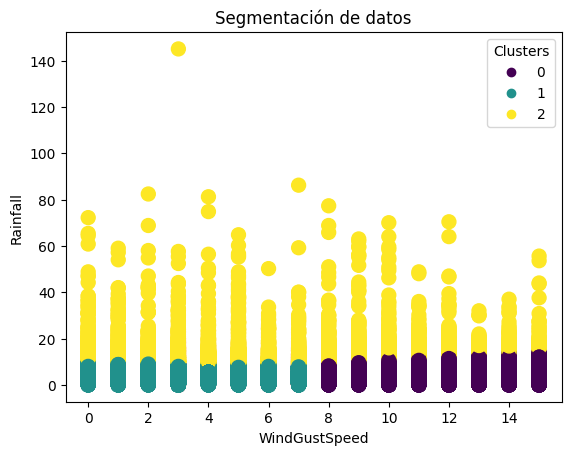

In [ ]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='viridis', s=100)
plt.xlabel('WindGustSpeed')
plt.ylabel('Rainfall')
plt.title('Segmentación de datos')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

✅ Paso 4 - Evaluación

In [ ]:
SS_4 = silhouette_score(X, Y_hat)

print("Silhouette Score:", SS_4)

Silhouette Score: 0.5072942986273868


In [ ]:
import joblib

# Guardar el modelo en un archivo
joblib.dump(modelo_4, 'modelo_KMEANSm4.pkl')

['modelo_KMEANSm4.pkl']

####Modelo 5

✅ Paso 1 - Selección de características (variables)

🟠 **ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)** 🟠

PCA es una técnica de reducción de la dimensionalidad en estadísticas y análisis de datos. Su objetivo principal es simplificar la complejidad en los datos, mientras se mantiene la estructura esencial y la variabilidad de los datos. PCA logra esto al transformar los datos originales en un nuevo sistema de coordenadas, donde las nuevas variables (llamadas componentes principales) son ortogonales entre sí y están ordenadas en función de la cantidad de varianza que explican.

En términos más simples, PCA te permite reducir la cantidad de variables en un conjunto de datos mientras conserva la mayor parte de la información. Esto es especialmente útil cuando trabajas con datos de alta dimensionalidad o cuando deseas visualizar datos en un espacio de dimensiones reducidas.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalización de los datos
scaler = StandardScaler()
df_sc = scaler.fit_transform(df)

In [ ]:
from sklearn.decomposition import PCA

# Aplica PCA para reducir la dimensionalidad
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(df_sc)

Las contribuciones de las características en las componentes principales te indican cómo cada característica original contribuye a la variación capturada por las nuevas dimensiones (componentes principales) después de la reducción de dimensionalidad con PCA.

• `Magnitud de los Coeficientes`: indica la importancia de cada característica en la componente principal correspondiente. Cuanto mayor sea el valor absoluto del coeficiente, mayor será la contribución de esa característica a la componente principal.

• `Signo de los Coeficientes`: indica la dirección de la relación entre la característica y la componente principal. Un coeficiente positivo sugiere que a medida que la característica aumenta, la componente principal también aumenta, y viceversa para coeficientes negativos.

• `Conjunto de Coeficientes`: Al observar todos los coeficientes para una componente principal, puedes identificar qué características tienen una influencia similar en esa dimensión. Características con coeficientes de magnitud similar y signo similar pueden considerarse como contribuyentes conjuntos a esa componente principal.

In [ ]:
# Obtener las contribuciones de características a las componentes principales
componentes = pca.components_

# Crear un DataFrame para visualizar las contribuciones
contribuciones = pd.DataFrame(componentes, columns=df.columns, index=['Componente 1', 'Componente 2'])
contribuciones

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
Componente 1 -0.002374  0.260813  0.382355 -0.086049     0.233360  0.305658   
Componente 2  0.003405  0.264220  0.072540  0.224958     0.061797 -0.208040   

              WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  \
Componente 1    -0.096250       0.066972   -0.095026   -0.079055   
Componente 2     0.068644       0.299069    0.076564    0.060424   

              WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
Componente 1      0.062765      0.066284    -0.301205    -0.281338   
Componente 2      0.208466      0.229213     0.052110     0.201865   

              Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am  \
Componente 1    -0.136060    -0.171807 -0.183468 -0.180458  0.341502   
Componente 2    -0.366627    -0.337107  0.218282  0.223016  0.186894   

               Temp3pm  RainToday   RISK_MM  RainTomorrow  
Componente 1  0.381525  -0.153057 -0.078479     -0.131242  
Componente 2  0.045831   0.241414  0.243915      0.289542

El Componente 1 esta mayormente influido por Age y Spending Score, en cambio, el Componente 2 esta compuesto principalmente por Gender y Annual Income (k$).

✅ Paso 2 - Modelamiento

In [ ]:
modelo_5 = KMeans(n_clusters=5, random_state=0)

✅ Paso 3 - Predicción

In [ ]:
Y_hat = modelo_5.fit_predict(X_PCA)

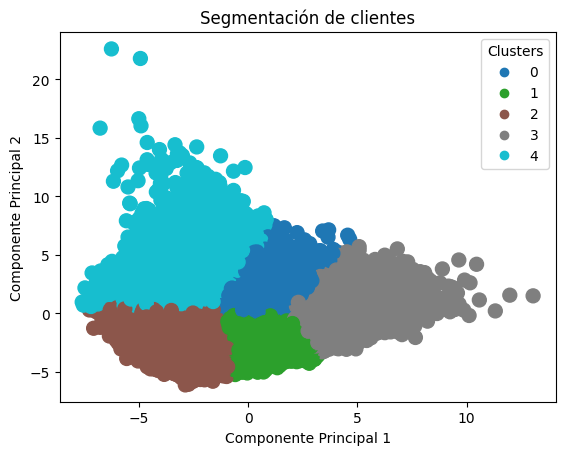

In [ ]:
# Visualiza los clusters
scatter = plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=Y_hat, cmap='tab10', s=100)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Segmentación de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

✅ Paso 4 - Evaluación

In [ ]:
SS_5 = silhouette_score(X_PCA, Y_hat)

print("Silhouette Score:", SS_5)

Silhouette Score: 0.3318978456327895


✅ Paso 4 - Evaluación

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de clustering que se utiliza para agrupar puntos de datos en clústeres en función de su densidad en el espacio. A diferencia de los algoritmos de clustering como K-Means, DBSCAN no requiere que especifiques previamente el número de clústeres, y es capaz de detectar clústeres de diferentes formas y tamaños de manera automática.

➡️ `DBSCAN`: Es un algoritmo de clustering que identifica clústeres en función de la densidad de los puntos de datos en el espacio.

Parámetros:

> ●   `eps (epsilon)`: es la distancia máxima entre dos muestras para que se consideren en el mismo vecindario. El valor predeterminado es 0.5.

> ●   `min_samples`: es el número mínimo de muestras en un vecindario para que un punto sea considerado un núcleo. El valor predeterminado es 5.

> ●   `metric`: es la métrica utilizada para medir la distancia entre las muestras. El valor predeterminado es 'euclidean', que se refiere a la distancia euclidiana.

> ●   `algorithm`:es el algoritmo utilizado para calcular las vecindades. El valor predeterminado es 'auto', que determina automáticamente el algoritmo más adecuado. Puede tomar los valores 'ball_tree', 'kd_tree' o 'brute'.

> ●   `leaf_size`: es el tamaño de la hoja para los algoritmos "ball_tree" y "kd_tree". El valor predeterminado es 30.

> ●   `p`: es el parámetro de la métrica de Minkowski. El valor predeterminado es 2, que se refiere a la distancia euclidiana.

#### **Modelo 6**

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Mostrar información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  int64  
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   Evaporation    142193 non-null  float64
 5   Sunshine       142193 non-null  float64
 6   WindGustDir    142193 non-null  int64  
 7   WindGustSpeed  142193 non-null  float64
 8   WindDir9am     142193 non-null  int64  
 9   WindDir3pm     142193 non-null  int64  
 10  WindSpeed9am   142193 non-null  float64
 11  WindSpeed3pm   142193 non-null  float64
 12  Humidity9am    142193 non-null  float64
 13  Humidity3pm    142193 non-null  float64
 14  Pressure9am    142193 non-null  float64
 15  Pressure3pm    142193 non-null  float64
 16  Cloud9am       142193 non-null  float64
 17  Cloud3pm       142193 non-nul

✅ Paso 1 - Selección de características (variables)

In [ ]:
#'WindGustSpeed' y 'Humidity3pm'
X = df.iloc[:, [8,14]].values

✅ Paso 2 - Modelamiento

In [ ]:
from sklearn.cluster import KMeans

modelo_6 = KMeans(n_clusters= 3, random_state=0)

✅ Paso 3 - Predicción

In [ ]:
Y_hat = modelo_6.fit_predict(X)

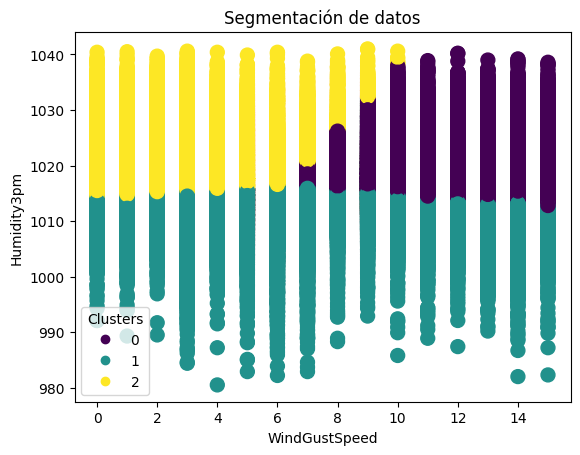

In [ ]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='viridis', s=100)
plt.xlabel('WindGustSpeed')
plt.ylabel('Humidity3pm')
plt.title('Segmentación de datos')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

✅ Paso 4 - Evaluación

In [ ]:
SS_6 = silhouette_score(X, Y_hat)

print("Silhouette Score:",SS_6)

Silhouette Score: 0.35161820042699776


#### **Modelo 7**

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Mostrar información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  int64  
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   Evaporation    142193 non-null  float64
 5   Sunshine       142193 non-null  float64
 6   WindGustDir    142193 non-null  int64  
 7   WindGustSpeed  142193 non-null  float64
 8   WindDir9am     142193 non-null  int64  
 9   WindDir3pm     142193 non-null  int64  
 10  WindSpeed9am   142193 non-null  float64
 11  WindSpeed3pm   142193 non-null  float64
 12  Humidity9am    142193 non-null  float64
 13  Humidity3pm    142193 non-null  float64
 14  Pressure9am    142193 non-null  float64
 15  Pressure3pm    142193 non-null  float64
 16  Cloud9am       142193 non-null  float64
 17  Cloud3pm       142193 non-nul

✅ Paso 1 - Selección de características (variables)

In [ ]:
# 'Humidity3pm' y 'Pressure9am'
X = df.iloc[:, [14,15]].values

✅ Paso 2 - Modelamiento

In [ ]:
from sklearn.cluster import KMeans

modelo_7 = KMeans(n_clusters= 3, random_state=0)

✅ Paso 3 - Predicción

In [ ]:
Y_hat = modelo_7.fit_predict(X)

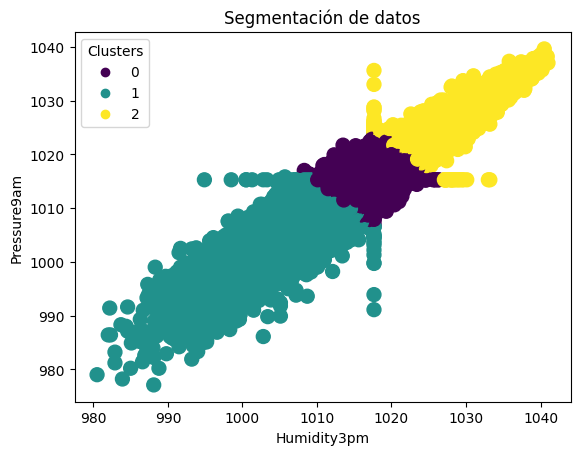

In [ ]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='viridis', s=100)
plt.xlabel('Humidity3pm')
plt.ylabel('Pressure9am')
plt.title('Segmentación de datos')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

✅ Paso 4 - Evaluación

In [ ]:
SS_7 = silhouette_score(X, Y_hat)

print("Silhouette Score:",SS_7)

Silhouette Score: 0.5252219343049847


#### **Modelo 8**

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Mostrar información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  int64  
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   Evaporation    142193 non-null  float64
 5   Sunshine       142193 non-null  float64
 6   WindGustDir    142193 non-null  int64  
 7   WindGustSpeed  142193 non-null  float64
 8   WindDir9am     142193 non-null  int64  
 9   WindDir3pm     142193 non-null  int64  
 10  WindSpeed9am   142193 non-null  float64
 11  WindSpeed3pm   142193 non-null  float64
 12  Humidity9am    142193 non-null  float64
 13  Humidity3pm    142193 non-null  float64
 14  Pressure9am    142193 non-null  float64
 15  Pressure3pm    142193 non-null  float64
 16  Cloud9am       142193 non-null  float64
 17  Cloud3pm       142193 non-nul

✅ Paso 1 - Selección de características (variables)

In [ ]:
#'Rainfall' y 'Pressure9am'
X = df.iloc[:, [4,15]].values

✅ Paso 2 - Modelamiento

In [ ]:
from sklearn.cluster import KMeans

modelo_8 = KMeans(n_clusters= 4, random_state=0)

✅ Paso 3 - Predicción

In [ ]:
Y_hat = modelo_8.fit_predict(X)

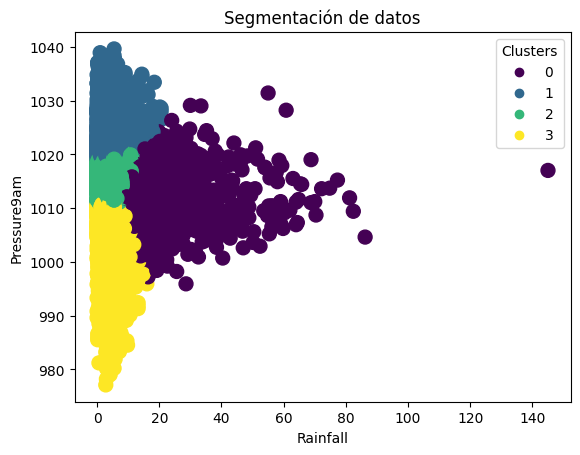

In [ ]:
# Visualiza los clusters
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y_hat, cmap='viridis', s=100)
plt.xlabel('Rainfall')
plt.ylabel('Pressure9am')
plt.title('Segmentación de datos')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

✅ Paso 4 - Evaluación

In [ ]:
SS_8 = silhouette_score(X, Y_hat)

print("Silhouette Score:",SS_8)

Silhouette Score: 0.45589708338443685


#**5. EVALUACIÓN**

✅ Una vez realizados todos los experimentos, se comparan los modelos para definir el modelo ganador con el que se trabajará.

In [ ]:
# Crear una lista de modelos y Silhouette Score
modelos = ['K-Means (Maxtemp+Humidity3pm)', 'K-Means (MaxTemp+Rainfall)', 'K-Means (WindGustSpeed+Rainfall)', 'K-Means (GridSearch)', 'K-Means (PCA)','K-Means (WindGustSpeed+Humidity3pm)', 'K-Means (Humidity3pm+Pressure9am)', 'K-Means (Rainfall+Pressure9am)']
silhouette_scores = [SS_1, SS_2, SS_3, SS_4, SS_5, SS_6, SS_7, SS_8]

# Asegurarse de que ambas listas tengan la misma longitud
min_length = min(len(modelos), len(silhouette_scores))
modelos = modelos[:min_length]
silhouette_scores = silhouette_scores[:min_length]

# Crear el DataFrame
tabla_resultados = pd.DataFrame({'Modelo': modelos, 'Silhouette Score': silhouette_scores})

# Mostrar la tabla de resultados
print(tabla_resultados)

                                Modelo  Silhouette Score
0        K-Means (Maxtemp+Humidity3pm)          0.474343
1           K-Means (MaxTemp+Rainfall)          0.625933
2     K-Means (WindGustSpeed+Rainfall)          0.433036
3                 K-Means (GridSearch)          0.507294
4                        K-Means (PCA)          0.331898
5  K-Means (WindGustSpeed+Humidity3pm)          0.351618
6    K-Means (Humidity3pm+Pressure9am)          0.525222
7       K-Means (Rainfall+Pressure9am)          0.455897


El modelo ganador es el modelo 4 de Clustering K-Means con 4 segmentos.

In [ ]:
import joblib

# Guardar el modelo ganador en un archivo
joblib.dump(modelo_4, 'modelo_cluster_K-Means_GridSearch.pkl')

['modelo_cluster_K-Means_GridSearch.pkl']

#**6. RESULTADOS**

✅ Variable de salida: Se realiza la estimación de los segmentos de clientes encontrados utilizando el modelo ganador para obtener la variable de salida $\hat Y$ (Y_hat).

In [ ]:
import joblib

In [ ]:
# Realiza la predicción de los clusters con el modelo ganador
df = pd.DataFrame(pd.read_csv('WeatherAUSFinal.csv')) #Colocar archivo preprocesado, el limpio
X = pd.DataFrame(df[["WindGustSpeed","Rainfall"]])
modelo = joblib.load('modelo_cluster_K-Means_GridSearch.pkl')
Y_hat = modelo.fit_predict(X)
Y_hat = pd.DataFrame(Y_hat)
Y_hat.head(10)

0
0  1
1  1
2  2
3  1
4  1
5  2
6  2
7  1
8  2
9  1

✅ Etiquetado: Se encuentran 3 segmentos de clientes agrupados por la velocidad del vielto a las 9pm y la caida de lluvia. Se nombra cada cluster según sus características para generar las etiquetas de cada segmento.

> *   Tormentoso = Altos registros principalmente de lluvia y viento
> *   Dia de bajo riesgo = Vientos moderados y baja presipitacion
> *   Ventoso = Vientos mayormente intensos con poca o nula presencia de lluvia


✅ Nuevo dataset: Se adjunta la columna resultante al dataset original para así asignarle a cada cliente la etiqueta del segmento que le corresponde

In [ ]:
# Cambiar valores numéricos de los clusters a nombres personalizados para etiquetarlos
segmentacion = {0: 'Tormentoso', 1: 'Dia de bajo riesgo', 2: 'Ventoso'}
Y_hat = Y_hat.replace(segmentacion)

# Agrega la predicción de clusters como una nueva columna en el DataFrame original
df['Segmento'] = Y_hat


In [ ]:
# Guarda el DataFrame con la nueva columna 'Cluster' como archivo
df.to_csv("clustering_WeatherAUSFinal.csv", index=False)

In [ ]:
df.head(10)

Unnamed: 0  Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0           0   396         2     13.4     22.9       0.6     5.469824   
1           1   397         2      7.4     25.1       0.0     5.469824   
2           2   398         2     12.9     25.7       0.0     5.469824   
3           3   399         2      9.2     28.0       0.0     5.469824   
4           4   400         2     17.5     32.3       1.0     5.469824   
5           5   401         2     14.6     29.7       0.2     5.469824   
6           6   402         2     14.3     25.0       0.0     5.469824   
7           7   403         2      7.7     26.7       0.0     5.469824   
8           8   404         2      9.7     31.9       0.0     5.469824   
9           9   405         2     13.1     30.1       1.4     5.469824   

    Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  \
0   7.382861           13           44.0          13          14   
1   9.163396           14           44.0           6          15   
2  10.586100           15           46.0          13          15   
3   9.245500            4           24.0           9           0   
4   6.058206           13           41.0           1           7   
5   9.141793           14           56.0          13          13   
6   9.908107           13           50.0          12          13   
7   9.402628           13           35.0          10          13   
8   9.841479            6           80.0           9           7   
9   9.417878           13           28.0           8          10   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   
5          19.0          24.0         55.0         23.0       1009.2   
6          20.0          24.0         49.0         19.0       1009.6   
7           6.0          17.0         48.0         19.0       1013.4   
8           7.0          28.0         42.0          9.0       1008.9   
9          15.0          11.0         58.0         27.0       1007.0   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1  8.000000  4.503167     16.9     21.8          0      0.0   
1       1007.8  4.437189  4.503167     17.2     24.3          0      0.0   
2       1008.7  4.437189  2.000000     21.0     23.2          0      0.0   
3       1012.8  4.437189  4.503167     18.1     26.5          0      1.0   
4       1006.0  7.000000  8.000000     17.8     29.7          0      0.2   
5       1005.4  4.437189  4.503167     20.6     28.9          0      0.0   
6       1008.2  1.000000  4.503167     18.1     24.6          0      0.0   
7       1010.1  4.437189  4.503167     16.3     25.5          0      0.0   
8       1003.6  4.437189  4.503167     18.3     30.2          0      1.4   
9       1005.7  4.437189  4.503167     20.1     28.2          1      0.0   

   RainTomorrow            Segmento  
0             0  Dia de bajo riesgo  
1             0  Dia de bajo riesgo  
2             0             Ventoso  
3             0  Dia de bajo riesgo  
4             0  Dia de bajo riesgo  
5             0             Ventoso  
6             0             Ventoso  
7             0  Dia de bajo riesgo  
8             1             Ventoso  
9             0  Dia de bajo riesgo